In [15]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\NB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

dataset

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
0                  0.0        1              2                   113.750000   
1                  0.0        1              4                   154.733333   
2                  0.0        2              4                    71.666667   
3                  0.0        3              4                   191.000000   
4                  0.0        4              2                   174.333333   
...                ...      ...            ...                          ...   
2372             199.0        4              3                    87.000000   
2373             200.0        1              3                    70.800000   
2374             200.0        2              3                    90.000000   
2375             200.0        3              1                    71.500000   
2376             200.0        4              3                    99.000000   

      LightingCostAveragePerDwelling  HeatingCostAv

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling,HeatingCostAveragePerDwelling,HotWaterCostAveragePerDwelling
0,0.0,1,2,113.750000,59.500000,204.750000,118.500000
1,0.0,1,4,154.733333,70.266667,292.000000,115.533333
2,0.0,2,4,71.666667,54.666667,229.666667,57.333333
3,0.0,3,4,191.000000,56.000000,200.000000,140.000000
4,0.0,4,2,174.333333,55.000000,226.333333,76.000000
...,...,...,...,...,...,...,...
2372,199.0,4,3,87.000000,99.666667,563.000000,123.333333
2373,200.0,1,3,70.800000,93.600000,455.400000,113.800000
2374,200.0,2,3,90.000000,99.000000,424.000000,137.000000
2375,200.0,3,1,71.500000,103.000000,487.000000,126.500000


In [16]:
del dataset['HeatingCostAveragePerDwelling']
del dataset['HotWaterCostAveragePerDwelling']

In [17]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['LightingCostAveragePerDwelling'] = dataset['LightingCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling,LightingCostAveragePerDwelling
0,0,1,2,113,59
1,0,1,4,154,70
2,0,2,4,71,54
3,0,3,4,191,56
4,0,4,2,174,55
...,...,...,...,...,...
2372,199,4,3,87,99
2373,200,1,3,70,93
2374,200,2,3,90,99
2375,200,3,1,71,103


In [18]:
from sklearn.model_selection import train_test_split
X=dataset.drop('LightingCostAveragePerDwelling',axis=1)
Y=dataset['LightingCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X


,AverageFloorArea,Quarter,Property Type,EnergyUseAveragePerDwelling
0,0,1,2,113
1,0,1,4,154
2,0,2,4,71
3,0,3,4,191
4,0,4,2,174
...,...,...,...,...
2372,199,4,3,87
2373,200,1,3,70
2374,200,2,3,90
2375,200,3,1,71


## Random forest with keras tuner dense

In [19]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [20]:
prediction = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

Prediction: 60.395


In [21]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

      Actual  predict  differences
898       57   58.975       -1.975
182       25   25.920       -0.920
565       44   43.400        0.600
457       39   44.855       -5.855
1852      83   90.380       -7.380
...      ...      ...          ...
1812      83   83.700       -0.700
913       71   68.895        2.105
1036      65   61.000        4.000
629       42   43.610       -1.610
61        41   59.460      -18.460

[714 rows x 3 columns]


In [22]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

23.715000000000003
-26.739999999999995
24.42
-21.810000000000002
29.685000000000002
22.4
50.715
25.994999999999997
-28.055
22.71
22.314999999999998
-22.209999999999994
lower bound: -20.660353667644983
upper bound: 21.384569353919495


In [9]:
A.drop(A[(A['differences'] >21)].index, inplace=True)
A.drop(A[(A['differences'] <-20)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual  predict  
1         70   60.315  
6  

In [10]:
from sklearn.model_selection import train_test_split
X1=B.drop('Actual',axis=1)
Y1=B['Actual']
X_train1, X_test1, Y_train1, Y_test1 =train_test_split(X1,Y1, test_size=0.3, random_state = 0)

In [11]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_13416\3496013807.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner


In [12]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train1,Y_train1 ,epochs=100,validation_data=(X_test1,Y_test1))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model1 = tuner.hypermodel.build(best_hps)
model1.fit(X_train1, Y_train1, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 3s 90ms/step - loss: 123.6381 - mean_absolute_error: 123.6381 - val_loss: 12.4234 - val_mean_absolute_error: 12.4234
Epoch 2/2000
11/11 [==============================] - 0s 15ms/step - loss: 27.3822 - mean_absolute_error: 27.3822 - val_loss: 7.9418 - val_mean_absolute_error: 7.9418
Epoch 3/2000
11/11 [==============================] - 0s 14ms/step - loss: 13.5077 - mean_absolute_error: 13.5077 - val_loss: 10.6222 - val_mean_absolute_error: 10.6222
Epoch 4/2000
11/11 [==============================] - 0s 16ms/step - loss: 8.0490 - mean_absolute_error: 8.0490 - val_loss: 6.4799 - val_mean_absolute_error: 6.4799
Epoch 5/2000
11/11 [==============================] - 0s 20ms/step - loss: 7.0981 - mean_absolute_error: 7.0981 - val_loss: 5.6148 - val_mean_absolute

11/11 [==============================] - 0s 11ms/step - loss: 7.1635 - mean_absolute_error: 7.1635 - val_loss: 8.7307 - val_mean_absolute_error: 8.7307
Epoch 99/2000
11/11 [==============================] - 0s 16ms/step - loss: 6.1775 - mean_absolute_error: 6.1775 - val_loss: 5.9072 - val_mean_absolute_error: 5.9072
Epoch 100/2000
11/11 [==============================] - 0s 19ms/step - loss: 4.8593 - mean_absolute_error: 4.8593 - val_loss: 3.7054 - val_mean_absolute_error: 3.7054
Epoch 101/2000
11/11 [==============================] - 0s 13ms/step - loss: 4.2350 - mean_absolute_error: 4.2350 - val_loss: 3.7584 - val_mean_absolute_error: 3.7584
Epoch 102/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.7071 - mean_absolute_error: 4.7071 - val_loss: 4.0065 - val_mean_absolute_error: 4.0065
Epoch 103/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.7668 - mean_absolute_error: 4.7668 - val_loss: 4.3189 - val_mean_absolute_error: 4.3189
Epoch 104/2000

11/11 [==============================] - 0s 7ms/step - loss: 4.6037 - mean_absolute_error: 4.6037 - val_loss: 4.4473 - val_mean_absolute_error: 4.4473
Epoch 197/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.4936 - mean_absolute_error: 4.4936 - val_loss: 3.8595 - val_mean_absolute_error: 3.8595
Epoch 198/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.2672 - mean_absolute_error: 4.2672 - val_loss: 4.6692 - val_mean_absolute_error: 4.6692
Epoch 199/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.0356 - mean_absolute_error: 5.0356 - val_loss: 5.9746 - val_mean_absolute_error: 5.9746
Epoch 200/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.5159 - mean_absolute_error: 5.5159 - val_loss: 8.5003 - val_mean_absolute_error: 8.5003
Epoch 201/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.5297 - mean_absolute_error: 5.5297 - val_loss: 4.8141 - val_mean_absolute_error: 4.8141
Epoch 202/2000
11/1

11/11 [==============================] - 0s 8ms/step - loss: 4.7625 - mean_absolute_error: 4.7625 - val_loss: 4.0259 - val_mean_absolute_error: 4.0259
Epoch 295/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.6181 - mean_absolute_error: 5.6181 - val_loss: 4.9729 - val_mean_absolute_error: 4.9729
Epoch 296/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.9240 - mean_absolute_error: 4.9240 - val_loss: 4.2698 - val_mean_absolute_error: 4.2698
Epoch 297/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.9083 - mean_absolute_error: 4.9083 - val_loss: 3.9421 - val_mean_absolute_error: 3.9421
Epoch 298/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1123 - mean_absolute_error: 4.1123 - val_loss: 3.9556 - val_mean_absolute_error: 3.9556
Epoch 299/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.1168 - mean_absolute_error: 4.1168 - val_loss: 3.7375 - val_mean_absolute_error: 3.7375
Epoch 300/2000
11/

11/11 [==============================] - 0s 9ms/step - loss: 4.4016 - mean_absolute_error: 4.4016 - val_loss: 5.1742 - val_mean_absolute_error: 5.1742
Epoch 393/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6837 - mean_absolute_error: 4.6837 - val_loss: 4.3295 - val_mean_absolute_error: 4.3295
Epoch 394/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.2036 - mean_absolute_error: 4.2036 - val_loss: 4.4454 - val_mean_absolute_error: 4.4454
Epoch 395/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.4672 - mean_absolute_error: 4.4672 - val_loss: 3.7441 - val_mean_absolute_error: 3.7441
Epoch 396/2000
11/11 [==============================] - 0s 13ms/step - loss: 4.3138 - mean_absolute_error: 4.3138 - val_loss: 5.6779 - val_mean_absolute_error: 5.6779
Epoch 397/2000
11/11 [==============================] - 0s 12ms/step - loss: 5.6440 - mean_absolute_error: 5.6440 - val_loss: 3.8446 - val_mean_absolute_error: 3.8446
Epoch 398/2000
11

11/11 [==============================] - 0s 18ms/step - loss: 4.2228 - mean_absolute_error: 4.2228 - val_loss: 3.7859 - val_mean_absolute_error: 3.7859
Epoch 491/2000
11/11 [==============================] - 0s 25ms/step - loss: 4.5509 - mean_absolute_error: 4.5509 - val_loss: 4.7598 - val_mean_absolute_error: 4.7598
Epoch 492/2000
11/11 [==============================] - 0s 13ms/step - loss: 4.4265 - mean_absolute_error: 4.4265 - val_loss: 4.4350 - val_mean_absolute_error: 4.4350
Epoch 493/2000
11/11 [==============================] - 0s 19ms/step - loss: 4.7695 - mean_absolute_error: 4.7695 - val_loss: 3.7729 - val_mean_absolute_error: 3.7729
Epoch 494/2000
11/11 [==============================] - 0s 12ms/step - loss: 5.3809 - mean_absolute_error: 5.3809 - val_loss: 3.7366 - val_mean_absolute_error: 3.7366
Epoch 495/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.6109 - mean_absolute_error: 4.6109 - val_loss: 3.7404 - val_mean_absolute_error: 3.7404
Epoch 496/200

11/11 [==============================] - 0s 23ms/step - loss: 4.5126 - mean_absolute_error: 4.5126 - val_loss: 4.0163 - val_mean_absolute_error: 4.0163
Epoch 589/2000
11/11 [==============================] - 0s 24ms/step - loss: 4.1543 - mean_absolute_error: 4.1543 - val_loss: 5.0639 - val_mean_absolute_error: 5.0639
Epoch 590/2000
11/11 [==============================] - 0s 13ms/step - loss: 4.3538 - mean_absolute_error: 4.3538 - val_loss: 4.3819 - val_mean_absolute_error: 4.3819
Epoch 591/2000
11/11 [==============================] - 0s 22ms/step - loss: 5.1361 - mean_absolute_error: 5.1361 - val_loss: 7.3152 - val_mean_absolute_error: 7.3152
Epoch 592/2000
11/11 [==============================] - 0s 11ms/step - loss: 5.4379 - mean_absolute_error: 5.4379 - val_loss: 4.8068 - val_mean_absolute_error: 4.8068
Epoch 593/2000
11/11 [==============================] - 0s 21ms/step - loss: 4.4546 - mean_absolute_error: 4.4546 - val_loss: 4.2966 - val_mean_absolute_error: 4.2966
Epoch 594/200

11/11 [==============================] - 0s 37ms/step - loss: 4.1934 - mean_absolute_error: 4.1934 - val_loss: 4.2004 - val_mean_absolute_error: 4.2004
Epoch 916/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.3952 - mean_absolute_error: 4.3952 - val_loss: 3.8310 - val_mean_absolute_error: 3.8310
Epoch 917/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1261 - mean_absolute_error: 4.1261 - val_loss: 3.7441 - val_mean_absolute_error: 3.7441
Epoch 918/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.0437 - mean_absolute_error: 4.0437 - val_loss: 3.8079 - val_mean_absolute_error: 3.8079
Epoch 919/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.2464 - mean_absolute_error: 4.2464 - val_loss: 4.5019 - val_mean_absolute_error: 4.5019
Epoch 920/2000
11/11 [==============================] - 0s 19ms/step - loss: 4.1698 - mean_absolute_error: 4.1698 - val_loss: 3.8518 - val_mean_absolute_error: 3.8518
Epoch 921/200

11/11 [==============================] - 0s 26ms/step - loss: 4.5261 - mean_absolute_error: 4.5261 - val_loss: 3.8368 - val_mean_absolute_error: 3.8368
Epoch 1014/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.1498 - mean_absolute_error: 4.1498 - val_loss: 4.1511 - val_mean_absolute_error: 4.1511
Epoch 1015/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.0908 - mean_absolute_error: 4.0908 - val_loss: 4.3660 - val_mean_absolute_error: 4.3660
Epoch 1016/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.4076 - mean_absolute_error: 4.4076 - val_loss: 4.6117 - val_mean_absolute_error: 4.6117
Epoch 1017/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2304 - mean_absolute_error: 4.2304 - val_loss: 4.3392 - val_mean_absolute_error: 4.3392
Epoch 1018/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.5329 - mean_absolute_error: 4.5329 - val_loss: 5.1548 - val_mean_absolute_error: 5.1548
Epoch 10

Epoch 1062/2000
11/11 [==============================] - 0s 25ms/step - loss: 4.0698 - mean_absolute_error: 4.0698 - val_loss: 3.7835 - val_mean_absolute_error: 3.7835
Epoch 1063/2000
11/11 [==============================] - 0s 20ms/step - loss: 4.6533 - mean_absolute_error: 4.6533 - val_loss: 3.7710 - val_mean_absolute_error: 3.7710
Epoch 1064/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.5606 - mean_absolute_error: 4.5606 - val_loss: 3.8118 - val_mean_absolute_error: 3.8118
Epoch 1065/2000
11/11 [==============================] - 0s 22ms/step - loss: 4.5571 - mean_absolute_error: 4.5571 - val_loss: 4.6853 - val_mean_absolute_error: 4.6853
Epoch 1066/2000
11/11 [==============================] - 0s 24ms/step - loss: 4.6464 - mean_absolute_error: 4.6464 - val_loss: 7.3839 - val_mean_absolute_error: 7.3839
Epoch 1067/2000
11/11 [==============================] - 0s 16ms/step - loss: 5.5587 - mean_absolute_error: 5.5587 - val_loss: 5.0383 - val_mean_absolute_error:

Epoch 1111/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.6137 - mean_absolute_error: 4.6137 - val_loss: 4.0357 - val_mean_absolute_error: 4.0357
Epoch 1112/2000
11/11 [==============================] - 1s 58ms/step - loss: 4.1710 - mean_absolute_error: 4.1710 - val_loss: 4.0280 - val_mean_absolute_error: 4.0280
Epoch 1113/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.4520 - mean_absolute_error: 4.4520 - val_loss: 3.8578 - val_mean_absolute_error: 3.8578
Epoch 1114/2000
11/11 [==============================] - 1s 58ms/step - loss: 4.1585 - mean_absolute_error: 4.1585 - val_loss: 5.1072 - val_mean_absolute_error: 5.1072
Epoch 1115/2000
11/11 [==============================] - 0s 27ms/step - loss: 5.0936 - mean_absolute_error: 5.0936 - val_loss: 3.9869 - val_mean_absolute_error: 3.9869
Epoch 1116/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.5897 - mean_absolute_error: 4.5897 - val_loss: 3.9243 - val_mean_absolute_error:

Epoch 1160/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.3300 - mean_absolute_error: 4.3300 - val_loss: 3.7507 - val_mean_absolute_error: 3.7507
Epoch 1161/2000
11/11 [==============================] - 1s 61ms/step - loss: 4.1082 - mean_absolute_error: 4.1082 - val_loss: 4.9949 - val_mean_absolute_error: 4.9949
Epoch 1162/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.4276 - mean_absolute_error: 4.4276 - val_loss: 3.9371 - val_mean_absolute_error: 3.9371
Epoch 1163/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.4889 - mean_absolute_error: 4.4889 - val_loss: 3.9834 - val_mean_absolute_error: 3.9834
Epoch 1164/2000
11/11 [==============================] - 1s 54ms/step - loss: 4.5818 - mean_absolute_error: 4.5818 - val_loss: 3.7885 - val_mean_absolute_error: 3.7885
Epoch 1165/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.2062 - mean_absolute_error: 4.2062 - val_loss: 3.8222 - val_mean_absolute_error:

Epoch 1209/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.2354 - mean_absolute_error: 4.2354 - val_loss: 4.5969 - val_mean_absolute_error: 4.5969
Epoch 1210/2000
11/11 [==============================] - 1s 54ms/step - loss: 4.5784 - mean_absolute_error: 4.5784 - val_loss: 4.9296 - val_mean_absolute_error: 4.9296
Epoch 1211/2000
11/11 [==============================] - 1s 66ms/step - loss: 5.2934 - mean_absolute_error: 5.2934 - val_loss: 3.8397 - val_mean_absolute_error: 3.8397
Epoch 1212/2000
11/11 [==============================] - 0s 26ms/step - loss: 5.3547 - mean_absolute_error: 5.3547 - val_loss: 4.3095 - val_mean_absolute_error: 4.3095
Epoch 1213/2000
11/11 [==============================] - 1s 67ms/step - loss: 5.1674 - mean_absolute_error: 5.1674 - val_loss: 3.8227 - val_mean_absolute_error: 3.8227
Epoch 1214/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.7554 - mean_absolute_error: 4.7554 - val_loss: 3.8272 - val_mean_absolute_error:

Epoch 1258/2000
11/11 [==============================] - 1s 54ms/step - loss: 4.1863 - mean_absolute_error: 4.1863 - val_loss: 3.7393 - val_mean_absolute_error: 3.7393
Epoch 1259/2000
11/11 [==============================] - 1s 51ms/step - loss: 4.3555 - mean_absolute_error: 4.3555 - val_loss: 4.1197 - val_mean_absolute_error: 4.1197
Epoch 1260/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1385 - mean_absolute_error: 4.1385 - val_loss: 3.9520 - val_mean_absolute_error: 3.9520
Epoch 1261/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.4191 - mean_absolute_error: 4.4191 - val_loss: 5.2602 - val_mean_absolute_error: 5.2602
Epoch 1262/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.7742 - mean_absolute_error: 4.7742 - val_loss: 6.3857 - val_mean_absolute_error: 6.3857
Epoch 1263/2000
11/11 [==============================] - 1s 51ms/step - loss: 5.6117 - mean_absolute_error: 5.6117 - val_loss: 5.1592 - val_mean_absolute_error:

Epoch 1307/2000
11/11 [==============================] - 0s 32ms/step - loss: 5.4676 - mean_absolute_error: 5.4676 - val_loss: 5.2001 - val_mean_absolute_error: 5.2001
Epoch 1308/2000
11/11 [==============================] - 0s 33ms/step - loss: 5.4336 - mean_absolute_error: 5.4336 - val_loss: 4.2286 - val_mean_absolute_error: 4.2286
Epoch 1309/2000
11/11 [==============================] - 1s 52ms/step - loss: 4.9181 - mean_absolute_error: 4.9181 - val_loss: 5.6342 - val_mean_absolute_error: 5.6342
Epoch 1310/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.7527 - mean_absolute_error: 4.7527 - val_loss: 4.8860 - val_mean_absolute_error: 4.8860
Epoch 1311/2000
11/11 [==============================] - 0s 34ms/step - loss: 5.0094 - mean_absolute_error: 5.0094 - val_loss: 4.0551 - val_mean_absolute_error: 4.0551
Epoch 1312/2000
11/11 [==============================] - 1s 53ms/step - loss: 4.3075 - mean_absolute_error: 4.3075 - val_loss: 4.2911 - val_mean_absolute_error:

Epoch 1356/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.4369 - mean_absolute_error: 4.4369 - val_loss: 4.7796 - val_mean_absolute_error: 4.7796
Epoch 1357/2000
11/11 [==============================] - 1s 58ms/step - loss: 4.2349 - mean_absolute_error: 4.2349 - val_loss: 4.2304 - val_mean_absolute_error: 4.2304
Epoch 1358/2000
11/11 [==============================] - 0s 49ms/step - loss: 4.1197 - mean_absolute_error: 4.1197 - val_loss: 4.0294 - val_mean_absolute_error: 4.0294
Epoch 1359/2000
11/11 [==============================] - 1s 57ms/step - loss: 4.3571 - mean_absolute_error: 4.3571 - val_loss: 4.1890 - val_mean_absolute_error: 4.1890
Epoch 1360/2000
11/11 [==============================] - 1s 56ms/step - loss: 4.7919 - mean_absolute_error: 4.7919 - val_loss: 4.1424 - val_mean_absolute_error: 4.1424
Epoch 1361/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.7186 - mean_absolute_error: 4.7186 - val_loss: 6.7180 - val_mean_absolute_error:

Epoch 1405/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.6769 - mean_absolute_error: 4.6769 - val_loss: 4.6245 - val_mean_absolute_error: 4.6245
Epoch 1406/2000
11/11 [==============================] - 1s 53ms/step - loss: 4.8691 - mean_absolute_error: 4.8691 - val_loss: 4.5038 - val_mean_absolute_error: 4.5038
Epoch 1407/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.0244 - mean_absolute_error: 4.0244 - val_loss: 3.7687 - val_mean_absolute_error: 3.7687
Epoch 1408/2000
11/11 [==============================] - 0s 49ms/step - loss: 4.4277 - mean_absolute_error: 4.4277 - val_loss: 3.8030 - val_mean_absolute_error: 3.8030
Epoch 1409/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.2782 - mean_absolute_error: 4.2782 - val_loss: 3.7864 - val_mean_absolute_error: 3.7864
Epoch 1410/2000
11/11 [==============================] - 0s 23ms/step - loss: 4.1599 - mean_absolute_error: 4.1599 - val_loss: 4.0015 - val_mean_absolute_error:

Epoch 1454/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.6238 - mean_absolute_error: 4.6238 - val_loss: 3.8101 - val_mean_absolute_error: 3.8101
Epoch 1455/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.4972 - mean_absolute_error: 4.4972 - val_loss: 6.2902 - val_mean_absolute_error: 6.2902
Epoch 1456/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.7623 - mean_absolute_error: 4.7623 - val_loss: 3.9933 - val_mean_absolute_error: 3.9933
Epoch 1457/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.8302 - mean_absolute_error: 4.8302 - val_loss: 6.3549 - val_mean_absolute_error: 6.3549
Epoch 1458/2000
11/11 [==============================] - 1s 52ms/step - loss: 6.0515 - mean_absolute_error: 6.0515 - val_loss: 6.1719 - val_mean_absolute_error: 6.1719
Epoch 1459/2000
11/11 [==============================] - 1s 52ms/step - loss: 5.6419 - mean_absolute_error: 5.6419 - val_loss: 4.8556 - val_mean_absolute_error:

Epoch 1503/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.3239 - mean_absolute_error: 4.3239 - val_loss: 3.8409 - val_mean_absolute_error: 3.8409
Epoch 1504/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1756 - mean_absolute_error: 4.1756 - val_loss: 3.8364 - val_mean_absolute_error: 3.8364
Epoch 1505/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.2330 - mean_absolute_error: 4.2330 - val_loss: 4.1987 - val_mean_absolute_error: 4.1987
Epoch 1506/2000
11/11 [==============================] - 0s 23ms/step - loss: 4.1308 - mean_absolute_error: 4.1308 - val_loss: 3.7761 - val_mean_absolute_error: 3.7761
Epoch 1507/2000
11/11 [==============================] - 1s 54ms/step - loss: 4.1534 - mean_absolute_error: 4.1534 - val_loss: 3.7714 - val_mean_absolute_error: 3.7714
Epoch 1508/2000
11/11 [==============================] - 1s 51ms/step - loss: 4.3619 - mean_absolute_error: 4.3619 - val_loss: 4.9114 - val_mean_absolute_error:

Epoch 1552/2000
11/11 [==============================] - 1s 77ms/step - loss: 4.0734 - mean_absolute_error: 4.0734 - val_loss: 4.9695 - val_mean_absolute_error: 4.9695
Epoch 1553/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.2497 - mean_absolute_error: 4.2497 - val_loss: 3.8162 - val_mean_absolute_error: 3.8162
Epoch 1554/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2149 - mean_absolute_error: 4.2149 - val_loss: 3.8677 - val_mean_absolute_error: 3.8677
Epoch 1555/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1644 - mean_absolute_error: 4.1644 - val_loss: 3.7715 - val_mean_absolute_error: 3.7715
Epoch 1556/2000
11/11 [==============================] - 1s 53ms/step - loss: 4.3537 - mean_absolute_error: 4.3537 - val_loss: 6.1313 - val_mean_absolute_error: 6.1313
Epoch 1557/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.7938 - mean_absolute_error: 4.7938 - val_loss: 4.1229 - val_mean_absolute_error:

Epoch 1601/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.5454 - mean_absolute_error: 4.5454 - val_loss: 4.8346 - val_mean_absolute_error: 4.8346
Epoch 1602/2000
11/11 [==============================] - 1s 60ms/step - loss: 4.5546 - mean_absolute_error: 4.5546 - val_loss: 5.8516 - val_mean_absolute_error: 5.8516
Epoch 1603/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.5720 - mean_absolute_error: 4.5720 - val_loss: 3.8169 - val_mean_absolute_error: 3.8169
Epoch 1604/2000
11/11 [==============================] - 1s 55ms/step - loss: 4.2466 - mean_absolute_error: 4.2466 - val_loss: 5.2029 - val_mean_absolute_error: 5.2029
Epoch 1605/2000
11/11 [==============================] - 1s 50ms/step - loss: 4.3673 - mean_absolute_error: 4.3673 - val_loss: 4.9250 - val_mean_absolute_error: 4.9250
Epoch 1606/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.5878 - mean_absolute_error: 4.5878 - val_loss: 4.7606 - val_mean_absolute_error:

Epoch 1650/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.2276 - mean_absolute_error: 4.2276 - val_loss: 3.7628 - val_mean_absolute_error: 3.7628
Epoch 1651/2000
11/11 [==============================] - 1s 62ms/step - loss: 3.9789 - mean_absolute_error: 3.9789 - val_loss: 3.7891 - val_mean_absolute_error: 3.7891
Epoch 1652/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.2996 - mean_absolute_error: 4.2996 - val_loss: 3.7814 - val_mean_absolute_error: 3.7814
Epoch 1653/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.0572 - mean_absolute_error: 4.0572 - val_loss: 3.8418 - val_mean_absolute_error: 3.8418
Epoch 1654/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2246 - mean_absolute_error: 4.2246 - val_loss: 4.1010 - val_mean_absolute_error: 4.1010
Epoch 1655/2000
11/11 [==============================] - 0s 30ms/step - loss: 5.2575 - mean_absolute_error: 5.2575 - val_loss: 6.4111 - val_mean_absolute_error:

Epoch 1699/2000
11/11 [==============================] - 1s 61ms/step - loss: 4.8439 - mean_absolute_error: 4.8439 - val_loss: 4.6313 - val_mean_absolute_error: 4.6313
Epoch 1700/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.5463 - mean_absolute_error: 4.5463 - val_loss: 4.4677 - val_mean_absolute_error: 4.4677
Epoch 1701/2000
11/11 [==============================] - 1s 66ms/step - loss: 5.0169 - mean_absolute_error: 5.0169 - val_loss: 4.8535 - val_mean_absolute_error: 4.8535
Epoch 1702/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.6988 - mean_absolute_error: 4.6988 - val_loss: 3.9378 - val_mean_absolute_error: 3.9378
Epoch 1703/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.3063 - mean_absolute_error: 4.3063 - val_loss: 3.8826 - val_mean_absolute_error: 3.8826
Epoch 1704/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.2154 - mean_absolute_error: 4.2154 - val_loss: 4.3239 - val_mean_absolute_error:

Epoch 1748/2000
11/11 [==============================] - 1s 67ms/step - loss: 5.4562 - mean_absolute_error: 5.4562 - val_loss: 4.8178 - val_mean_absolute_error: 4.8178
Epoch 1749/2000
11/11 [==============================] - 1s 54ms/step - loss: 4.2984 - mean_absolute_error: 4.2984 - val_loss: 4.0008 - val_mean_absolute_error: 4.0008
Epoch 1750/2000
11/11 [==============================] - 1s 64ms/step - loss: 4.5127 - mean_absolute_error: 4.5127 - val_loss: 3.7672 - val_mean_absolute_error: 3.7672
Epoch 1751/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.5991 - mean_absolute_error: 4.5991 - val_loss: 5.8082 - val_mean_absolute_error: 5.8082
Epoch 1752/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.3082 - mean_absolute_error: 4.3082 - val_loss: 3.8504 - val_mean_absolute_error: 3.8504
Epoch 1753/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.4841 - mean_absolute_error: 4.4841 - val_loss: 4.5873 - val_mean_absolute_error:

Epoch 1797/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1389 - mean_absolute_error: 4.1389 - val_loss: 3.7989 - val_mean_absolute_error: 3.7989
Epoch 1798/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1911 - mean_absolute_error: 4.1911 - val_loss: 3.9112 - val_mean_absolute_error: 3.9112
Epoch 1799/2000
11/11 [==============================] - 0s 49ms/step - loss: 4.5723 - mean_absolute_error: 4.5723 - val_loss: 5.0012 - val_mean_absolute_error: 5.0012
Epoch 1800/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.4476 - mean_absolute_error: 4.4476 - val_loss: 3.9854 - val_mean_absolute_error: 3.9854
Epoch 1801/2000
11/11 [==============================] - 0s 23ms/step - loss: 4.5032 - mean_absolute_error: 4.5032 - val_loss: 3.7540 - val_mean_absolute_error: 3.7540
Epoch 1802/2000
11/11 [==============================] - 1s 57ms/step - loss: 5.4063 - mean_absolute_error: 5.4063 - val_loss: 4.9027 - val_mean_absolute_error:

Epoch 1846/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.3571 - mean_absolute_error: 4.3571 - val_loss: 4.3787 - val_mean_absolute_error: 4.3787
Epoch 1847/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.5796 - mean_absolute_error: 4.5796 - val_loss: 5.3120 - val_mean_absolute_error: 5.3120
Epoch 1848/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.7272 - mean_absolute_error: 4.7272 - val_loss: 3.9279 - val_mean_absolute_error: 3.9279
Epoch 1849/2000
11/11 [==============================] - 1s 52ms/step - loss: 4.4564 - mean_absolute_error: 4.4564 - val_loss: 5.3915 - val_mean_absolute_error: 5.3915
Epoch 1850/2000
11/11 [==============================] - 1s 53ms/step - loss: 5.4397 - mean_absolute_error: 5.4397 - val_loss: 3.8242 - val_mean_absolute_error: 3.8242
Epoch 1851/2000
11/11 [==============================] - 0s 48ms/step - loss: 4.1741 - mean_absolute_error: 4.1741 - val_loss: 3.8506 - val_mean_absolute_error:

Epoch 1895/2000
11/11 [==============================] - 1s 55ms/step - loss: 5.7318 - mean_absolute_error: 5.7318 - val_loss: 6.7809 - val_mean_absolute_error: 6.7809
Epoch 1896/2000
11/11 [==============================] - 1s 56ms/step - loss: 5.2632 - mean_absolute_error: 5.2632 - val_loss: 3.7691 - val_mean_absolute_error: 3.7691
Epoch 1897/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.4030 - mean_absolute_error: 4.4030 - val_loss: 4.0005 - val_mean_absolute_error: 4.0005
Epoch 1898/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.9184 - mean_absolute_error: 4.9184 - val_loss: 7.4060 - val_mean_absolute_error: 7.4060
Epoch 1899/2000
11/11 [==============================] - 0s 23ms/step - loss: 5.3561 - mean_absolute_error: 5.3561 - val_loss: 5.7480 - val_mean_absolute_error: 5.7480
Epoch 1900/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.7429 - mean_absolute_error: 4.7429 - val_loss: 3.8130 - val_mean_absolute_error:

Epoch 1944/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.4761 - mean_absolute_error: 4.4761 - val_loss: 5.7549 - val_mean_absolute_error: 5.7549
Epoch 1945/2000
11/11 [==============================] - 1s 50ms/step - loss: 4.7980 - mean_absolute_error: 4.7980 - val_loss: 4.1518 - val_mean_absolute_error: 4.1518
Epoch 1946/2000
11/11 [==============================] - 0s 22ms/step - loss: 4.5449 - mean_absolute_error: 4.5449 - val_loss: 5.0298 - val_mean_absolute_error: 5.0298
Epoch 1947/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.3850 - mean_absolute_error: 4.3850 - val_loss: 3.9950 - val_mean_absolute_error: 3.9950
Epoch 1948/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1816 - mean_absolute_error: 4.1816 - val_loss: 3.7655 - val_mean_absolute_error: 3.7655
Epoch 1949/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.6109 - mean_absolute_error: 4.6109 - val_loss: 4.0698 - val_mean_absolute_error:

Epoch 1993/2000
11/11 [==============================] - 1s 58ms/step - loss: 4.4242 - mean_absolute_error: 4.4242 - val_loss: 3.7511 - val_mean_absolute_error: 3.7511
Epoch 1994/2000
11/11 [==============================] - 1s 50ms/step - loss: 4.0391 - mean_absolute_error: 4.0391 - val_loss: 4.4058 - val_mean_absolute_error: 4.4058
Epoch 1995/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.4841 - mean_absolute_error: 4.4841 - val_loss: 4.0820 - val_mean_absolute_error: 4.0820
Epoch 1996/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.2899 - mean_absolute_error: 4.2899 - val_loss: 3.7329 - val_mean_absolute_error: 3.7329
Epoch 1997/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1507 - mean_absolute_error: 4.1507 - val_loss: 3.9136 - val_mean_absolute_error: 3.9136
Epoch 1998/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.5833 - mean_absolute_error: 4.5833 - val_loss: 6.4598 - val_mean_absolute_error:

7/7 [==============================] - 1s 3ms/step
r2_score: 0.8898329074139156
7/7 [==============================] - 0s 2ms/step
mean squired error: 41.25416623967044
mean absolute error: 4.805239668346586
7/7 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

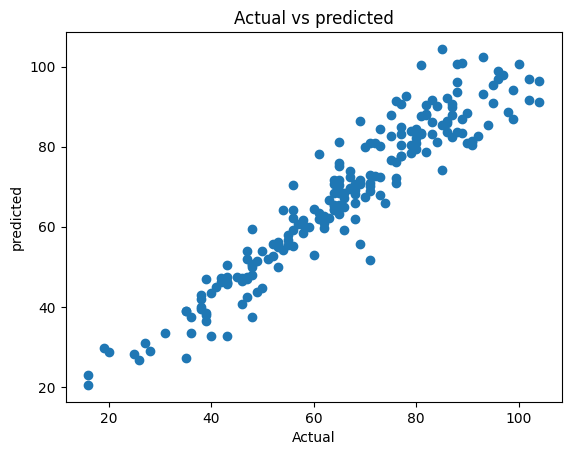

In [13]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
mae= mean_absolute_error(Y_test1, np.squeeze(model1.predict(X_test1)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test1, np.squeeze(model1.predict(X_test1)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [14]:
prediction1 =np.squeeze(model1.predict([[80,2,2,129,prediction]]))
print("Prediction: {}".format(prediction1))

y_prd=np.squeeze(np.squeeze(model1.predict(X_test1)) )
predic_dif=pd.DataFrame({'Actual':Y_test1,'predict':y_prd,"differences":Y_test1-y_prd})
predic_dif[0:15]

1/1 [==============================] - 1s 1s/step
Prediction: 62.08116912841797
7/7 [==============================] - 0s 3ms/step


,Actual,predict,differences
2055,82,88.203789,-6.203789
2127,82,90.539207,-8.539207
1544,77,84.804550,-7.804550
309,27,30.831734,-3.831734
1432,71,72.851120,-1.851120
1906,69,86.354401,-17.354401
33,53,55.525261,-2.525261
2227,90,88.546219,1.453781
2291,97,97.858437,-0.858437
1981,95,90.885406,4.114594


## RNN with Keras tuner dense

In [23]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model2=Sequential()
model2.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model2.add(Dropout(0.2))
model2.add(LSTM(units=64, activation='relu', return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(units=32, activation='relu', return_sequences=True))
model2.add(Dropout(0.4))
model2.add(LSTM(units=64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(units=1))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_1 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_2 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [24]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 31s 114ms/step - loss: 2517.4336 - mae: 44.3549 - val_loss: 352.5176 - val_mae: 15.3644
Epoch 2/2000
37/37 [==============================] - 1s 26ms/step - loss: 732.7791 - mae: 21.3446 - val_loss: 333.2072 - val_mae: 15.4848
Epoch 3/2000
37/37 [==============================] - 1s 27ms/step - loss: 560.5779 - mae: 18.5137 - val_loss: 731.0259 - val_mae: 24.3599
Epoch 4/2000
37/37 [==============================] - 1s 26ms/step - loss: 443.2374 - mae: 16.4490 - val_loss: 483.6892 - val_mae: 19.5995
Epoch 5/2000
37/37 [==============================] - 1s 29ms/step - loss: 366.8654 - mae: 14.8237 - val_loss: 548.0233 - val_mae: 20.8733
Epoch 6/2000
37/37 [==============================] - 1s 26ms/step - loss: 386.2987 - mae: 15.5854 - val_loss: 322.8403 - val_mae: 15.5959
Epoch 7/2000
37/37 [==============================] - 1s 28ms/step - loss: 326.2461 - mae: 14.0230 - val_loss: 733.0201 - val_mae: 24.5497
Epoch 8/2000
37/37 [====

Epoch 60/2000
37/37 [==============================] - 1s 30ms/step - loss: 163.3656 - mae: 10.0007 - val_loss: 150.4281 - val_mae: 9.7402
Epoch 61/2000
37/37 [==============================] - 1s 28ms/step - loss: 168.0216 - mae: 9.9224 - val_loss: 117.1804 - val_mae: 8.3185
Epoch 62/2000
37/37 [==============================] - 1s 29ms/step - loss: 169.2720 - mae: 10.1117 - val_loss: 125.8696 - val_mae: 8.7732
Epoch 63/2000
37/37 [==============================] - 1s 30ms/step - loss: 164.0689 - mae: 9.9136 - val_loss: 208.3654 - val_mae: 12.0698
Epoch 64/2000
37/37 [==============================] - 1s 29ms/step - loss: 182.2449 - mae: 10.3703 - val_loss: 120.3571 - val_mae: 8.4103
Epoch 65/2000
37/37 [==============================] - 1s 32ms/step - loss: 166.7485 - mae: 9.9816 - val_loss: 95.9748 - val_mae: 7.1977
Epoch 66/2000
37/37 [==============================] - 1s 27ms/step - loss: 167.8920 - mae: 9.9972 - val_loss: 113.1927 - val_mae: 8.0271
Epoch 67/2000
37/37 [==========

37/37 [==============================] - 1s 29ms/step - loss: 141.8902 - mae: 9.2963 - val_loss: 53.9968 - val_mae: 4.9753
Epoch 120/2000
37/37 [==============================] - 1s 29ms/step - loss: 142.6147 - mae: 9.2763 - val_loss: 74.7041 - val_mae: 6.4110
Epoch 121/2000
37/37 [==============================] - 1s 28ms/step - loss: 138.2999 - mae: 9.1355 - val_loss: 58.1700 - val_mae: 5.1093
Epoch 122/2000
37/37 [==============================] - 1s 27ms/step - loss: 146.5573 - mae: 9.3351 - val_loss: 100.7600 - val_mae: 7.9184
Epoch 123/2000
37/37 [==============================] - 1s 27ms/step - loss: 149.1287 - mae: 9.3648 - val_loss: 120.6464 - val_mae: 8.8333
Epoch 124/2000
37/37 [==============================] - 1s 27ms/step - loss: 133.5428 - mae: 8.8103 - val_loss: 78.5144 - val_mae: 6.5260
Epoch 125/2000
37/37 [==============================] - 1s 31ms/step - loss: 141.5693 - mae: 9.0611 - val_loss: 57.9913 - val_mae: 5.1031
Epoch 126/2000
37/37 [=========================

37/37 [==============================] - 1s 29ms/step - loss: 134.2272 - mae: 8.9942 - val_loss: 66.1219 - val_mae: 5.8719
Epoch 179/2000
37/37 [==============================] - 1s 28ms/step - loss: 130.7732 - mae: 8.8124 - val_loss: 50.9428 - val_mae: 4.6748
Epoch 180/2000
37/37 [==============================] - 1s 27ms/step - loss: 125.7448 - mae: 8.7135 - val_loss: 68.8885 - val_mae: 6.0176
Epoch 181/2000
37/37 [==============================] - 1s 27ms/step - loss: 129.1407 - mae: 8.6718 - val_loss: 83.0821 - val_mae: 7.0147
Epoch 182/2000
37/37 [==============================] - 1s 26ms/step - loss: 132.8593 - mae: 8.8347 - val_loss: 67.6551 - val_mae: 6.1230
Epoch 183/2000
37/37 [==============================] - 1s 25ms/step - loss: 134.7203 - mae: 8.7416 - val_loss: 58.0773 - val_mae: 5.3664
Epoch 184/2000
37/37 [==============================] - 1s 29ms/step - loss: 128.2666 - mae: 8.6586 - val_loss: 94.7872 - val_mae: 7.3102
Epoch 185/2000
37/37 [===========================

37/37 [==============================] - 1s 28ms/step - loss: 124.7636 - mae: 8.7181 - val_loss: 52.5110 - val_mae: 4.8475
Epoch 238/2000
37/37 [==============================] - 1s 28ms/step - loss: 113.6933 - mae: 8.2931 - val_loss: 86.0747 - val_mae: 7.3524
Epoch 239/2000
37/37 [==============================] - 1s 26ms/step - loss: 128.0166 - mae: 8.6698 - val_loss: 80.9703 - val_mae: 7.0622
Epoch 240/2000
37/37 [==============================] - 1s 28ms/step - loss: 122.6674 - mae: 8.5242 - val_loss: 66.6446 - val_mae: 6.2576
Epoch 241/2000
37/37 [==============================] - 1s 26ms/step - loss: 123.8605 - mae: 8.5690 - val_loss: 54.1369 - val_mae: 5.1476
Epoch 242/2000
37/37 [==============================] - 1s 26ms/step - loss: 120.7319 - mae: 8.4114 - val_loss: 61.7397 - val_mae: 5.7586
Epoch 243/2000
37/37 [==============================] - 1s 27ms/step - loss: 127.8158 - mae: 8.6405 - val_loss: 89.5590 - val_mae: 7.4960
Epoch 244/2000
37/37 [===========================

37/37 [==============================] - 1s 26ms/step - loss: 106.1542 - mae: 7.8900 - val_loss: 99.2459 - val_mae: 8.3887
Epoch 297/2000
37/37 [==============================] - 1s 26ms/step - loss: 115.2568 - mae: 8.4069 - val_loss: 50.3686 - val_mae: 4.6480
Epoch 298/2000
37/37 [==============================] - 1s 26ms/step - loss: 112.5444 - mae: 8.2457 - val_loss: 67.2424 - val_mae: 6.2604
Epoch 299/2000
37/37 [==============================] - 1s 27ms/step - loss: 121.6708 - mae: 8.4624 - val_loss: 66.0722 - val_mae: 6.0644
Epoch 300/2000
37/37 [==============================] - 1s 25ms/step - loss: 116.8822 - mae: 8.1607 - val_loss: 63.9659 - val_mae: 5.8401
Epoch 301/2000
37/37 [==============================] - 1s 25ms/step - loss: 116.5929 - mae: 8.3532 - val_loss: 51.4588 - val_mae: 4.7027
Epoch 302/2000
37/37 [==============================] - 1s 26ms/step - loss: 116.2794 - mae: 8.2453 - val_loss: 88.9295 - val_mae: 7.1913
Epoch 303/2000
37/37 [===========================

37/37 [==============================] - 1s 14ms/step - loss: 102.6494 - mae: 7.8115 - val_loss: 67.0495 - val_mae: 6.0383
Epoch 356/2000
37/37 [==============================] - 1s 14ms/step - loss: 127.2096 - mae: 8.6703 - val_loss: 50.2572 - val_mae: 4.7663
Epoch 357/2000
37/37 [==============================] - 1s 14ms/step - loss: 108.3464 - mae: 7.9456 - val_loss: 83.8290 - val_mae: 7.4226
Epoch 358/2000
37/37 [==============================] - 1s 15ms/step - loss: 107.6190 - mae: 7.9403 - val_loss: 50.6949 - val_mae: 4.7309
Epoch 359/2000
37/37 [==============================] - 1s 14ms/step - loss: 103.6640 - mae: 7.8862 - val_loss: 67.7356 - val_mae: 6.1505
Epoch 360/2000
37/37 [==============================] - 1s 14ms/step - loss: 105.2818 - mae: 7.9486 - val_loss: 49.2717 - val_mae: 4.6242
Epoch 361/2000
37/37 [==============================] - 1s 14ms/step - loss: 112.8351 - mae: 8.1323 - val_loss: 103.6545 - val_mae: 8.3983
Epoch 362/2000
37/37 [==========================

37/37 [==============================] - 1s 16ms/step - loss: 110.5439 - mae: 8.0700 - val_loss: 62.7637 - val_mae: 5.5413
Epoch 415/2000
37/37 [==============================] - 1s 15ms/step - loss: 109.7519 - mae: 8.0284 - val_loss: 61.5727 - val_mae: 5.6677
Epoch 416/2000
37/37 [==============================] - 1s 16ms/step - loss: 105.7674 - mae: 7.8920 - val_loss: 68.3090 - val_mae: 6.3001
Epoch 417/2000
37/37 [==============================] - 1s 15ms/step - loss: 101.6531 - mae: 7.8056 - val_loss: 71.9855 - val_mae: 6.6457
Epoch 418/2000
37/37 [==============================] - 1s 16ms/step - loss: 107.7511 - mae: 7.9526 - val_loss: 91.6476 - val_mae: 7.5462
Epoch 419/2000
37/37 [==============================] - 1s 16ms/step - loss: 101.4910 - mae: 7.7500 - val_loss: 56.4282 - val_mae: 5.3488
Epoch 420/2000
37/37 [==============================] - 1s 16ms/step - loss: 103.3771 - mae: 7.8262 - val_loss: 76.5237 - val_mae: 6.8215
Epoch 421/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 98.4756 - mae: 7.5885 - val_loss: 56.4857 - val_mae: 5.2685
Epoch 474/2000
37/37 [==============================] - 1s 15ms/step - loss: 109.3310 - mae: 7.9743 - val_loss: 64.8949 - val_mae: 5.9382
Epoch 475/2000
37/37 [==============================] - 1s 15ms/step - loss: 101.8631 - mae: 7.8152 - val_loss: 62.9030 - val_mae: 5.8386
Epoch 476/2000
37/37 [==============================] - 1s 15ms/step - loss: 103.4025 - mae: 7.9280 - val_loss: 65.4802 - val_mae: 6.0749
Epoch 477/2000
37/37 [==============================] - 1s 15ms/step - loss: 102.8531 - mae: 7.8505 - val_loss: 62.1183 - val_mae: 5.8895
Epoch 478/2000
37/37 [==============================] - 1s 15ms/step - loss: 104.2117 - mae: 7.8527 - val_loss: 57.5453 - val_mae: 5.1903
Epoch 479/2000
37/37 [==============================] - 1s 15ms/step - loss: 106.7980 - mae: 8.0039 - val_loss: 66.8823 - val_mae: 5.8593
Epoch 480/2000
37/37 [============================

37/37 [==============================] - 1s 15ms/step - loss: 105.4687 - mae: 7.8062 - val_loss: 60.0197 - val_mae: 5.1882
Epoch 533/2000
37/37 [==============================] - 1s 15ms/step - loss: 95.8079 - mae: 7.5137 - val_loss: 49.1344 - val_mae: 4.5074
Epoch 534/2000
37/37 [==============================] - 1s 15ms/step - loss: 103.3460 - mae: 7.8299 - val_loss: 51.3576 - val_mae: 4.6062
Epoch 535/2000
37/37 [==============================] - 1s 15ms/step - loss: 94.8099 - mae: 7.5103 - val_loss: 67.3151 - val_mae: 6.0638
Epoch 536/2000
37/37 [==============================] - 1s 15ms/step - loss: 107.6318 - mae: 7.8622 - val_loss: 60.0149 - val_mae: 5.5628
Epoch 537/2000
37/37 [==============================] - 1s 15ms/step - loss: 104.0799 - mae: 7.7695 - val_loss: 78.2145 - val_mae: 6.6633
Epoch 538/2000
37/37 [==============================] - 1s 15ms/step - loss: 105.8377 - mae: 7.8605 - val_loss: 60.8767 - val_mae: 5.6736
Epoch 539/2000
37/37 [=============================

Epoch 592/2000
37/37 [==============================] - 1s 15ms/step - loss: 92.6477 - mae: 7.3816 - val_loss: 66.5808 - val_mae: 6.1338
Epoch 593/2000
37/37 [==============================] - 1s 15ms/step - loss: 90.6707 - mae: 7.3360 - val_loss: 74.4874 - val_mae: 6.7092
Epoch 594/2000
37/37 [==============================] - 1s 15ms/step - loss: 100.7359 - mae: 7.7042 - val_loss: 66.3117 - val_mae: 6.0389
Epoch 595/2000
37/37 [==============================] - 1s 15ms/step - loss: 99.0761 - mae: 7.5547 - val_loss: 53.4459 - val_mae: 4.9631
Epoch 596/2000
37/37 [==============================] - 1s 15ms/step - loss: 99.4235 - mae: 7.6406 - val_loss: 53.2442 - val_mae: 4.9483
Epoch 597/2000
37/37 [==============================] - 1s 15ms/step - loss: 99.7791 - mae: 7.5975 - val_loss: 86.0669 - val_mae: 7.3559
Epoch 598/2000
37/37 [==============================] - 1s 15ms/step - loss: 96.0147 - mae: 7.4701 - val_loss: 55.5939 - val_mae: 5.4842
Epoch 599/2000
37/37 [==================

Epoch 652/2000
37/37 [==============================] - 1s 15ms/step - loss: 99.1665 - mae: 7.6049 - val_loss: 70.5138 - val_mae: 6.2401
Epoch 653/2000
37/37 [==============================] - 1s 15ms/step - loss: 96.3184 - mae: 7.4673 - val_loss: 57.3783 - val_mae: 4.9737
Epoch 654/2000
37/37 [==============================] - 1s 16ms/step - loss: 100.9262 - mae: 7.7326 - val_loss: 53.7804 - val_mae: 4.9388
Epoch 655/2000
37/37 [==============================] - 1s 15ms/step - loss: 94.4482 - mae: 7.3616 - val_loss: 58.7363 - val_mae: 5.5514
Epoch 656/2000
37/37 [==============================] - 1s 16ms/step - loss: 95.6341 - mae: 7.2748 - val_loss: 56.3216 - val_mae: 5.1353
Epoch 657/2000
37/37 [==============================] - 1s 15ms/step - loss: 87.0582 - mae: 7.1514 - val_loss: 76.2084 - val_mae: 6.6706
Epoch 658/2000
37/37 [==============================] - 1s 16ms/step - loss: 82.5816 - mae: 7.1123 - val_loss: 72.2234 - val_mae: 6.6319
Epoch 659/2000
37/37 [==================

Epoch 712/2000
37/37 [==============================] - 1s 15ms/step - loss: 90.3232 - mae: 7.3483 - val_loss: 67.0534 - val_mae: 6.0395
Epoch 713/2000
37/37 [==============================] - 1s 15ms/step - loss: 81.7510 - mae: 7.0696 - val_loss: 54.1139 - val_mae: 4.9604
Epoch 714/2000
37/37 [==============================] - 1s 15ms/step - loss: 96.4364 - mae: 7.6256 - val_loss: 54.5680 - val_mae: 4.9487
Epoch 715/2000
37/37 [==============================] - 1s 15ms/step - loss: 95.5346 - mae: 7.5364 - val_loss: 68.3730 - val_mae: 5.9543
Epoch 716/2000
37/37 [==============================] - 1s 15ms/step - loss: 93.7733 - mae: 7.3350 - val_loss: 58.5409 - val_mae: 5.3378
Epoch 717/2000
37/37 [==============================] - 1s 15ms/step - loss: 93.7570 - mae: 7.2803 - val_loss: 54.9260 - val_mae: 4.8324
Epoch 718/2000
37/37 [==============================] - 1s 16ms/step - loss: 95.9492 - mae: 7.4005 - val_loss: 53.0518 - val_mae: 4.8616
Epoch 719/2000
37/37 [===================

Epoch 772/2000
37/37 [==============================] - 1s 15ms/step - loss: 87.6029 - mae: 7.1030 - val_loss: 67.4319 - val_mae: 5.8586
Epoch 773/2000
37/37 [==============================] - 1s 15ms/step - loss: 92.6673 - mae: 7.3292 - val_loss: 61.1985 - val_mae: 5.5725
Epoch 774/2000
37/37 [==============================] - 1s 15ms/step - loss: 89.8349 - mae: 7.2706 - val_loss: 66.5315 - val_mae: 5.9462
Epoch 775/2000
37/37 [==============================] - 1s 15ms/step - loss: 87.7924 - mae: 7.0808 - val_loss: 83.0015 - val_mae: 7.1404
Epoch 776/2000
37/37 [==============================] - 1s 15ms/step - loss: 90.8335 - mae: 7.3020 - val_loss: 63.5248 - val_mae: 5.8365
Epoch 777/2000
37/37 [==============================] - 1s 15ms/step - loss: 93.3942 - mae: 7.4813 - val_loss: 58.0451 - val_mae: 5.2677
Epoch 778/2000
37/37 [==============================] - 1s 15ms/step - loss: 88.3072 - mae: 7.1732 - val_loss: 61.8942 - val_mae: 5.7309
Epoch 779/2000
37/37 [===================

Epoch 832/2000
37/37 [==============================] - 1s 16ms/step - loss: 90.2862 - mae: 7.3279 - val_loss: 59.6530 - val_mae: 5.6883
Epoch 833/2000
37/37 [==============================] - 1s 17ms/step - loss: 87.1652 - mae: 7.1593 - val_loss: 58.2611 - val_mae: 5.5235
Epoch 834/2000
37/37 [==============================] - 1s 16ms/step - loss: 84.5300 - mae: 6.8841 - val_loss: 55.7690 - val_mae: 5.1211
Epoch 835/2000
37/37 [==============================] - 1s 16ms/step - loss: 86.5154 - mae: 7.0546 - val_loss: 51.1731 - val_mae: 4.4572
Epoch 836/2000
37/37 [==============================] - 1s 17ms/step - loss: 90.4320 - mae: 7.1672 - val_loss: 64.8580 - val_mae: 5.6897
Epoch 837/2000
37/37 [==============================] - 1s 15ms/step - loss: 82.1706 - mae: 6.9201 - val_loss: 52.4304 - val_mae: 4.6733
Epoch 838/2000
37/37 [==============================] - 1s 15ms/step - loss: 86.7542 - mae: 7.2914 - val_loss: 53.2518 - val_mae: 4.9952
Epoch 839/2000
37/37 [===================

Epoch 892/2000
37/37 [==============================] - 1s 15ms/step - loss: 85.0114 - mae: 7.0752 - val_loss: 51.5771 - val_mae: 4.5771
Epoch 893/2000
37/37 [==============================] - 1s 15ms/step - loss: 88.7730 - mae: 7.1130 - val_loss: 50.5072 - val_mae: 4.4776
Epoch 894/2000
37/37 [==============================] - 1s 15ms/step - loss: 85.6435 - mae: 6.9544 - val_loss: 49.2606 - val_mae: 4.5200
Epoch 895/2000
37/37 [==============================] - 1s 15ms/step - loss: 84.1447 - mae: 6.8582 - val_loss: 50.4890 - val_mae: 4.5434
Epoch 896/2000
37/37 [==============================] - 1s 15ms/step - loss: 84.6963 - mae: 7.0469 - val_loss: 68.0096 - val_mae: 6.1111
Epoch 897/2000
37/37 [==============================] - 1s 15ms/step - loss: 82.4684 - mae: 6.9302 - val_loss: 54.3136 - val_mae: 4.9831
Epoch 898/2000
37/37 [==============================] - 1s 15ms/step - loss: 86.1238 - mae: 7.0416 - val_loss: 60.1115 - val_mae: 5.5105
Epoch 899/2000
37/37 [===================

Epoch 952/2000
37/37 [==============================] - 1s 15ms/step - loss: 80.5690 - mae: 6.8175 - val_loss: 57.3434 - val_mae: 5.1318
Epoch 953/2000
37/37 [==============================] - 1s 15ms/step - loss: 78.3837 - mae: 6.7412 - val_loss: 59.9085 - val_mae: 5.4540
Epoch 954/2000
37/37 [==============================] - 1s 16ms/step - loss: 87.8242 - mae: 7.0690 - val_loss: 58.2888 - val_mae: 5.1528
Epoch 955/2000
37/37 [==============================] - 1s 15ms/step - loss: 84.5674 - mae: 7.0033 - val_loss: 56.8214 - val_mae: 5.0924
Epoch 956/2000
37/37 [==============================] - 1s 16ms/step - loss: 89.1588 - mae: 7.1164 - val_loss: 71.9649 - val_mae: 6.2276
Epoch 957/2000
37/37 [==============================] - 1s 15ms/step - loss: 77.5251 - mae: 6.7635 - val_loss: 50.5687 - val_mae: 4.6649
Epoch 958/2000
37/37 [==============================] - 1s 15ms/step - loss: 76.1940 - mae: 6.5997 - val_loss: 49.9701 - val_mae: 4.3479
Epoch 959/2000
37/37 [===================

Epoch 1012/2000
37/37 [==============================] - 1s 15ms/step - loss: 81.2304 - mae: 6.8987 - val_loss: 77.9769 - val_mae: 6.8886
Epoch 1013/2000
37/37 [==============================] - 1s 16ms/step - loss: 86.1200 - mae: 7.0236 - val_loss: 64.4548 - val_mae: 5.9892
Epoch 1014/2000
37/37 [==============================] - 1s 15ms/step - loss: 88.9826 - mae: 7.1083 - val_loss: 54.5193 - val_mae: 5.1455
Epoch 1015/2000
37/37 [==============================] - 1s 15ms/step - loss: 87.9080 - mae: 6.9954 - val_loss: 49.6054 - val_mae: 4.5201
Epoch 1016/2000
37/37 [==============================] - 1s 16ms/step - loss: 84.6117 - mae: 6.9737 - val_loss: 63.7617 - val_mae: 5.9137
Epoch 1017/2000
37/37 [==============================] - 1s 15ms/step - loss: 81.2293 - mae: 6.8293 - val_loss: 51.6778 - val_mae: 4.7368
Epoch 1018/2000
37/37 [==============================] - 1s 15ms/step - loss: 74.6421 - mae: 6.5308 - val_loss: 63.8860 - val_mae: 5.9675
Epoch 1019/2000
37/37 [===========

37/37 [==============================] - 1s 17ms/step - loss: 73.0128 - mae: 6.4854 - val_loss: 49.7149 - val_mae: 4.4583
Epoch 1072/2000
37/37 [==============================] - 1s 16ms/step - loss: 77.8723 - mae: 6.7306 - val_loss: 53.7312 - val_mae: 4.9407
Epoch 1073/2000
37/37 [==============================] - 1s 18ms/step - loss: 81.2786 - mae: 6.7276 - val_loss: 59.6063 - val_mae: 5.3791
Epoch 1074/2000
37/37 [==============================] - 1s 17ms/step - loss: 79.8092 - mae: 6.6836 - val_loss: 47.6903 - val_mae: 4.3168
Epoch 1075/2000
37/37 [==============================] - 1s 17ms/step - loss: 84.8916 - mae: 7.0363 - val_loss: 53.5957 - val_mae: 4.8187
Epoch 1076/2000
37/37 [==============================] - 1s 17ms/step - loss: 80.5781 - mae: 6.7291 - val_loss: 50.7978 - val_mae: 4.6527
Epoch 1077/2000
37/37 [==============================] - 1s 17ms/step - loss: 76.5045 - mae: 6.6680 - val_loss: 50.5050 - val_mae: 4.5881
Epoch 1078/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 85.6076 - mae: 6.7969 - val_loss: 66.9117 - val_mae: 6.1295
Epoch 1131/2000
37/37 [==============================] - 1s 16ms/step - loss: 81.7681 - mae: 6.8959 - val_loss: 57.1072 - val_mae: 5.2964
Epoch 1132/2000
37/37 [==============================] - 1s 15ms/step - loss: 84.2046 - mae: 6.7647 - val_loss: 51.1551 - val_mae: 4.4310
Epoch 1133/2000
37/37 [==============================] - 1s 15ms/step - loss: 77.0448 - mae: 6.7083 - val_loss: 53.8757 - val_mae: 4.6740
Epoch 1134/2000
37/37 [==============================] - 1s 15ms/step - loss: 76.2194 - mae: 6.5494 - val_loss: 51.7023 - val_mae: 4.6450
Epoch 1135/2000
37/37 [==============================] - 1s 15ms/step - loss: 75.3222 - mae: 6.5519 - val_loss: 64.8427 - val_mae: 5.8458
Epoch 1136/2000
37/37 [==============================] - 1s 15ms/step - loss: 78.0667 - mae: 6.6836 - val_loss: 51.9715 - val_mae: 4.6197
Epoch 1137/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 77.9648 - mae: 6.6924 - val_loss: 57.6638 - val_mae: 4.7596
Epoch 1190/2000
37/37 [==============================] - 1s 15ms/step - loss: 70.8940 - mae: 6.3886 - val_loss: 60.2148 - val_mae: 5.4410
Epoch 1191/2000
37/37 [==============================] - 1s 15ms/step - loss: 69.2570 - mae: 6.2521 - val_loss: 85.1674 - val_mae: 7.2201
Epoch 1192/2000
37/37 [==============================] - 1s 15ms/step - loss: 82.3096 - mae: 6.7052 - val_loss: 53.1198 - val_mae: 4.7534
Epoch 1193/2000
37/37 [==============================] - 1s 15ms/step - loss: 86.6052 - mae: 6.8838 - val_loss: 51.4135 - val_mae: 4.9034
Epoch 1194/2000
37/37 [==============================] - 1s 15ms/step - loss: 85.5841 - mae: 6.8085 - val_loss: 65.2268 - val_mae: 5.9552
Epoch 1195/2000
37/37 [==============================] - 1s 16ms/step - loss: 77.3311 - mae: 6.5478 - val_loss: 73.9044 - val_mae: 6.3693
Epoch 1196/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 70.5358 - mae: 6.2497 - val_loss: 55.9437 - val_mae: 4.8760
Epoch 1249/2000
37/37 [==============================] - 1s 16ms/step - loss: 75.0431 - mae: 6.5680 - val_loss: 54.3617 - val_mae: 4.5804
Epoch 1250/2000
37/37 [==============================] - 1s 16ms/step - loss: 74.0491 - mae: 6.4058 - val_loss: 75.4546 - val_mae: 6.3720
Epoch 1251/2000
37/37 [==============================] - 1s 15ms/step - loss: 72.2371 - mae: 6.4412 - val_loss: 61.1954 - val_mae: 5.4712
Epoch 1252/2000
37/37 [==============================] - 1s 16ms/step - loss: 74.7635 - mae: 6.5666 - val_loss: 69.9888 - val_mae: 6.0908
Epoch 1253/2000
37/37 [==============================] - 1s 15ms/step - loss: 73.3550 - mae: 6.4193 - val_loss: 59.1291 - val_mae: 4.9787
Epoch 1254/2000
37/37 [==============================] - 1s 16ms/step - loss: 74.1724 - mae: 6.4620 - val_loss: 55.4477 - val_mae: 4.8730
Epoch 1255/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 69.8605 - mae: 6.2909 - val_loss: 54.0366 - val_mae: 4.8166
Epoch 1308/2000
37/37 [==============================] - 1s 16ms/step - loss: 73.9137 - mae: 6.3555 - val_loss: 68.1669 - val_mae: 6.0491
Epoch 1309/2000
37/37 [==============================] - 1s 16ms/step - loss: 76.0484 - mae: 6.4489 - val_loss: 51.5699 - val_mae: 4.4136
Epoch 1310/2000
37/37 [==============================] - 1s 16ms/step - loss: 67.4200 - mae: 6.2202 - val_loss: 63.9169 - val_mae: 5.5217
Epoch 1311/2000
37/37 [==============================] - 1s 15ms/step - loss: 70.4710 - mae: 6.3641 - val_loss: 72.0170 - val_mae: 5.9187
Epoch 1312/2000
37/37 [==============================] - 1s 16ms/step - loss: 70.8343 - mae: 6.3074 - val_loss: 63.9950 - val_mae: 5.8506
Epoch 1313/2000
37/37 [==============================] - 1s 16ms/step - loss: 75.0280 - mae: 6.5347 - val_loss: 61.6159 - val_mae: 5.5003
Epoch 1314/2000
37/37 [===========================

37/37 [==============================] - 1s 17ms/step - loss: 69.6627 - mae: 6.1337 - val_loss: 62.9941 - val_mae: 5.5911
Epoch 1367/2000
37/37 [==============================] - 1s 16ms/step - loss: 68.8839 - mae: 6.2669 - val_loss: 69.2924 - val_mae: 6.2020
Epoch 1368/2000
37/37 [==============================] - 1s 17ms/step - loss: 69.5731 - mae: 6.2607 - val_loss: 63.7100 - val_mae: 5.3672
Epoch 1369/2000
37/37 [==============================] - 1s 15ms/step - loss: 69.0244 - mae: 6.3642 - val_loss: 54.6112 - val_mae: 4.7955
Epoch 1370/2000
37/37 [==============================] - 1s 15ms/step - loss: 75.0779 - mae: 6.4243 - val_loss: 56.1891 - val_mae: 4.9981
Epoch 1371/2000
37/37 [==============================] - 1s 16ms/step - loss: 69.1563 - mae: 6.1573 - val_loss: 53.0719 - val_mae: 4.4282
Epoch 1372/2000
37/37 [==============================] - 1s 15ms/step - loss: 68.4388 - mae: 6.2501 - val_loss: 52.2005 - val_mae: 4.6093
Epoch 1373/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 74.0632 - mae: 6.4353 - val_loss: 70.7547 - val_mae: 5.9065
Epoch 1426/2000
37/37 [==============================] - 1s 15ms/step - loss: 64.6212 - mae: 6.0241 - val_loss: 66.8892 - val_mae: 5.6952
Epoch 1427/2000
37/37 [==============================] - 1s 15ms/step - loss: 69.2050 - mae: 6.2868 - val_loss: 64.2027 - val_mae: 5.5086
Epoch 1428/2000
37/37 [==============================] - 1s 15ms/step - loss: 66.9570 - mae: 6.2167 - val_loss: 56.1286 - val_mae: 4.7821
Epoch 1429/2000
37/37 [==============================] - 1s 15ms/step - loss: 61.5765 - mae: 5.9133 - val_loss: 60.2959 - val_mae: 4.9513
Epoch 1430/2000
37/37 [==============================] - 1s 15ms/step - loss: 63.1458 - mae: 5.9368 - val_loss: 58.7857 - val_mae: 4.7899
Epoch 1431/2000
37/37 [==============================] - 1s 15ms/step - loss: 67.3916 - mae: 5.9847 - val_loss: 61.3583 - val_mae: 5.1489
Epoch 1432/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 63.1388 - mae: 6.0678 - val_loss: 55.1775 - val_mae: 4.8806
Epoch 1485/2000
37/37 [==============================] - 1s 15ms/step - loss: 62.3091 - mae: 5.9903 - val_loss: 56.7110 - val_mae: 4.7118
Epoch 1486/2000
37/37 [==============================] - 1s 15ms/step - loss: 64.6321 - mae: 6.0634 - val_loss: 63.2701 - val_mae: 5.3758
Epoch 1487/2000
37/37 [==============================] - 1s 15ms/step - loss: 65.7523 - mae: 6.1402 - val_loss: 59.3452 - val_mae: 5.2857
Epoch 1488/2000
37/37 [==============================] - 1s 16ms/step - loss: 68.9901 - mae: 6.3087 - val_loss: 62.1183 - val_mae: 5.7218
Epoch 1489/2000
37/37 [==============================] - 1s 15ms/step - loss: 68.7020 - mae: 6.0332 - val_loss: 66.6649 - val_mae: 5.8843
Epoch 1490/2000
37/37 [==============================] - 1s 15ms/step - loss: 62.7924 - mae: 5.9458 - val_loss: 59.9518 - val_mae: 5.0730
Epoch 1491/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 64.4541 - mae: 6.0175 - val_loss: 59.3061 - val_mae: 5.1314
Epoch 1544/2000
37/37 [==============================] - 1s 16ms/step - loss: 65.8522 - mae: 6.0074 - val_loss: 65.3229 - val_mae: 5.3532
Epoch 1545/2000
37/37 [==============================] - 1s 15ms/step - loss: 63.3358 - mae: 5.9598 - val_loss: 59.4432 - val_mae: 4.8615
Epoch 1546/2000
37/37 [==============================] - 1s 16ms/step - loss: 59.9548 - mae: 5.8098 - val_loss: 65.6337 - val_mae: 5.7840
Epoch 1547/2000
37/37 [==============================] - 1s 15ms/step - loss: 63.0966 - mae: 6.0409 - val_loss: 55.3610 - val_mae: 4.7227
Epoch 1548/2000
37/37 [==============================] - 1s 16ms/step - loss: 67.7789 - mae: 6.1627 - val_loss: 66.0519 - val_mae: 5.7412
Epoch 1549/2000
37/37 [==============================] - 1s 15ms/step - loss: 59.9449 - mae: 5.8571 - val_loss: 55.5252 - val_mae: 4.7757
Epoch 1550/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 65.5120 - mae: 6.0329 - val_loss: 63.4897 - val_mae: 5.0528
Epoch 1603/2000
37/37 [==============================] - 1s 16ms/step - loss: 65.7744 - mae: 6.1459 - val_loss: 86.5392 - val_mae: 6.8978
Epoch 1604/2000
37/37 [==============================] - 1s 15ms/step - loss: 64.6917 - mae: 5.9141 - val_loss: 62.1924 - val_mae: 5.0434
Epoch 1605/2000
37/37 [==============================] - 1s 16ms/step - loss: 59.6413 - mae: 5.7566 - val_loss: 67.7473 - val_mae: 5.8126
Epoch 1606/2000
37/37 [==============================] - 1s 15ms/step - loss: 64.3033 - mae: 5.9392 - val_loss: 74.2721 - val_mae: 6.1463
Epoch 1607/2000
37/37 [==============================] - 1s 16ms/step - loss: 61.0265 - mae: 5.8960 - val_loss: 59.1281 - val_mae: 5.3034
Epoch 1608/2000
37/37 [==============================] - 1s 15ms/step - loss: 61.1069 - mae: 5.9376 - val_loss: 57.7848 - val_mae: 4.7566
Epoch 1609/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 62.2206 - mae: 5.8609 - val_loss: 66.6754 - val_mae: 5.4894
Epoch 1662/2000
37/37 [==============================] - 1s 15ms/step - loss: 59.1768 - mae: 5.7948 - val_loss: 68.3801 - val_mae: 5.4042
Epoch 1663/2000
37/37 [==============================] - 1s 15ms/step - loss: 58.9618 - mae: 5.7569 - val_loss: 78.3668 - val_mae: 6.2753
Epoch 1664/2000
37/37 [==============================] - 1s 18ms/step - loss: 59.4588 - mae: 5.8370 - val_loss: 67.8091 - val_mae: 5.7961
Epoch 1665/2000
37/37 [==============================] - 1s 17ms/step - loss: 56.8846 - mae: 5.6568 - val_loss: 62.4436 - val_mae: 4.6987
Epoch 1666/2000
37/37 [==============================] - 1s 17ms/step - loss: 62.1244 - mae: 5.9583 - val_loss: 67.1012 - val_mae: 5.3679
Epoch 1667/2000
37/37 [==============================] - 1s 17ms/step - loss: 51.4213 - mae: 5.3604 - val_loss: 64.0285 - val_mae: 5.0755
Epoch 1668/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 61.7121 - mae: 5.8731 - val_loss: 67.2070 - val_mae: 5.6809
Epoch 1721/2000
37/37 [==============================] - 1s 15ms/step - loss: 60.2147 - mae: 5.8161 - val_loss: 69.0968 - val_mae: 5.6349
Epoch 1722/2000
37/37 [==============================] - 1s 15ms/step - loss: 66.4659 - mae: 6.0446 - val_loss: 67.1349 - val_mae: 5.4211
Epoch 1723/2000
37/37 [==============================] - 1s 15ms/step - loss: 56.9719 - mae: 5.5563 - val_loss: 60.3429 - val_mae: 4.9177
Epoch 1724/2000
37/37 [==============================] - 1s 15ms/step - loss: 61.6347 - mae: 5.8614 - val_loss: 66.3358 - val_mae: 5.6658
Epoch 1725/2000
37/37 [==============================] - 1s 16ms/step - loss: 59.9393 - mae: 5.7420 - val_loss: 76.3203 - val_mae: 6.0718
Epoch 1726/2000
37/37 [==============================] - 1s 15ms/step - loss: 53.8985 - mae: 5.5388 - val_loss: 66.6390 - val_mae: 5.3498
Epoch 1727/2000
37/37 [===========================

37/37 [==============================] - 1s 15ms/step - loss: 56.4552 - mae: 5.5635 - val_loss: 69.4127 - val_mae: 5.6941
Epoch 1780/2000
37/37 [==============================] - 1s 15ms/step - loss: 60.9493 - mae: 5.7547 - val_loss: 73.0238 - val_mae: 5.7292
Epoch 1781/2000
37/37 [==============================] - 1s 15ms/step - loss: 65.5507 - mae: 6.0590 - val_loss: 73.1187 - val_mae: 6.1069
Epoch 1782/2000
37/37 [==============================] - 1s 15ms/step - loss: 58.7955 - mae: 5.7257 - val_loss: 67.0428 - val_mae: 5.4325
Epoch 1783/2000
37/37 [==============================] - 1s 16ms/step - loss: 61.6639 - mae: 5.7696 - val_loss: 73.3120 - val_mae: 5.8844
Epoch 1784/2000
37/37 [==============================] - 1s 15ms/step - loss: 60.2359 - mae: 5.7845 - val_loss: 63.6637 - val_mae: 5.0821
Epoch 1785/2000
37/37 [==============================] - 1s 15ms/step - loss: 59.2801 - mae: 5.6539 - val_loss: 61.8391 - val_mae: 4.7857
Epoch 1786/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 58.0578 - mae: 5.6597 - val_loss: 66.2495 - val_mae: 5.2995
Epoch 1839/2000
37/37 [==============================] - 1s 17ms/step - loss: 57.0485 - mae: 5.6261 - val_loss: 61.2006 - val_mae: 4.9051
Epoch 1840/2000
37/37 [==============================] - 1s 16ms/step - loss: 55.8890 - mae: 5.5603 - val_loss: 62.3560 - val_mae: 5.2698
Epoch 1841/2000
37/37 [==============================] - 1s 16ms/step - loss: 57.9637 - mae: 5.6816 - val_loss: 65.9454 - val_mae: 5.4083
Epoch 1842/2000
37/37 [==============================] - 1s 16ms/step - loss: 56.2016 - mae: 5.5223 - val_loss: 75.8189 - val_mae: 6.3629
Epoch 1843/2000
37/37 [==============================] - 1s 16ms/step - loss: 53.6826 - mae: 5.5240 - val_loss: 64.4479 - val_mae: 5.2724
Epoch 1844/2000
37/37 [==============================] - 1s 16ms/step - loss: 53.8378 - mae: 5.4824 - val_loss: 61.5555 - val_mae: 5.0133
Epoch 1845/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 53.6217 - mae: 5.3994 - val_loss: 65.4819 - val_mae: 5.3088
Epoch 1898/2000
37/37 [==============================] - 1s 15ms/step - loss: 51.6190 - mae: 5.3768 - val_loss: 75.0289 - val_mae: 5.9593
Epoch 1899/2000
37/37 [==============================] - 1s 16ms/step - loss: 59.3300 - mae: 5.5997 - val_loss: 60.6404 - val_mae: 4.8366
Epoch 1900/2000
37/37 [==============================] - 1s 16ms/step - loss: 61.3874 - mae: 5.8293 - val_loss: 68.9119 - val_mae: 5.5170
Epoch 1901/2000
37/37 [==============================] - 1s 16ms/step - loss: 56.2870 - mae: 5.5322 - val_loss: 77.5111 - val_mae: 6.2870
Epoch 1902/2000
37/37 [==============================] - 1s 16ms/step - loss: 60.0781 - mae: 5.6459 - val_loss: 65.6632 - val_mae: 5.2818
Epoch 1903/2000
37/37 [==============================] - 1s 16ms/step - loss: 51.6302 - mae: 5.3945 - val_loss: 76.1589 - val_mae: 6.0311
Epoch 1904/2000
37/37 [===========================

37/37 [==============================] - 1s 16ms/step - loss: 56.3761 - mae: 5.6513 - val_loss: 64.8471 - val_mae: 5.2871
Epoch 1957/2000
37/37 [==============================] - 1s 16ms/step - loss: 61.1635 - mae: 5.7866 - val_loss: 69.3966 - val_mae: 5.7418
Epoch 1958/2000
37/37 [==============================] - 1s 16ms/step - loss: 56.5632 - mae: 5.5541 - val_loss: 62.9576 - val_mae: 5.2466
Epoch 1959/2000
37/37 [==============================] - 1s 16ms/step - loss: 55.3300 - mae: 5.4894 - val_loss: 68.0513 - val_mae: 5.7309
Epoch 1960/2000
37/37 [==============================] - 1s 15ms/step - loss: 58.6845 - mae: 5.6067 - val_loss: 63.1000 - val_mae: 4.9218
Epoch 1961/2000
37/37 [==============================] - 1s 16ms/step - loss: 56.9801 - mae: 5.6242 - val_loss: 58.9919 - val_mae: 4.7548
Epoch 1962/2000
37/37 [==============================] - 1s 15ms/step - loss: 52.9858 - mae: 5.3432 - val_loss: 64.7772 - val_mae: 5.2782
Epoch 1963/2000
37/37 [===========================

In [25]:
prediction2 = np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction2))

1/1 [==============================] - 1s 1s/step
Prediction: 56.3999137878418


In [26]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 1s 5ms/step
      Actual    predict  differences
898       57  56.419930     0.580070
182       25  27.058155    -2.058155
565       44  42.525578     1.474422
457       39  41.078476    -2.078476
1852      83  71.174225    11.825775
...      ...        ...          ...
1812      83  80.514862     2.485138
913       71  72.220856    -1.220856
1036      65  58.370720     6.629280
629       42  41.779289     0.220711
61        41  60.698902   -19.698902

[714 rows x 3 columns]


In [27]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-34.79405212402344
-23.045333862304688
37.85394287109375
27.24060821533203
-26.551055908203125
-23.19171142578125
45.190006256103516
28.93325424194336
-28.69586944580078
-53.311973571777344
26.934249877929688
29.951026916503906
-33.762298583984375
-25.45154571533203
34.305362701416016
-22.298110961914062
lower bound: -21.726639812210355
upper bound: 26.457365220812516


In [28]:
A.drop(A[(A['differences'] >26)].index, inplace=True)
A.drop(A[(A['differences'] <-21)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X2=B.drop('Actual',axis=1)
Y2=B['Actual']
X_train2, X_test2, Y_train2, Y_test2 =train_test_split(X2,Y2, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
1         70   52.039806

In [29]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
import kerastuner
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [30]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

tuner.search(X_train2,Y_train2 ,epochs=100,validation_data=(X_test2,Y_test2))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model3 = tuner.hypermodel.build(best_hps)
model3.fit(X_train2, Y_train2, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 1s 19ms/step - loss: 111.7078 - mean_absolute_error: 111.7078 - val_loss: 18.9399 - val_mean_absolute_error: 18.9399
Epoch 2/2000
11/11 [==============================] - 0s 7ms/step - loss: 11.8860 - mean_absolute_error: 11.8860 - val_loss: 5.7853 - val_mean_absolute_error: 5.7853
Epoch 3/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.8084 - mean_absolute_error: 5.8084 - val_loss: 5.3821 - val_mean_absolute_error: 5.3821
Epoch 4/2000
11/11 [==============================] - 0s 6ms/step - loss: 6.4028 - mean_absolute_error: 6.4028 - val_loss: 6.9078 - val_mean_absolute_error: 6.9078
Epoch 5/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.7085 - mean_absolute_error: 5.7085 - val_loss: 6.0538 - val_mean_absolute_error: 

11/11 [==============================] - 0s 6ms/step - loss: 5.5303 - mean_absolute_error: 5.5303 - val_loss: 4.9687 - val_mean_absolute_error: 4.9687
Epoch 50/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.1945 - mean_absolute_error: 5.1945 - val_loss: 4.5840 - val_mean_absolute_error: 4.5840
Epoch 51/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.6634 - mean_absolute_error: 4.6634 - val_loss: 4.7411 - val_mean_absolute_error: 4.7411
Epoch 52/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.4009 - mean_absolute_error: 4.4009 - val_loss: 4.8496 - val_mean_absolute_error: 4.8496
Epoch 53/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.8832 - mean_absolute_error: 4.8832 - val_loss: 5.1665 - val_mean_absolute_error: 5.1665
Epoch 54/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.6595 - mean_absolute_error: 4.6595 - val_loss: 4.7986 - val_mean_absolute_error: 4.7986
Epoch 55/2000
11/11 [===

Epoch 99/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.6344 - mean_absolute_error: 5.6344 - val_loss: 5.5687 - val_mean_absolute_error: 5.5687
Epoch 100/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.2543 - mean_absolute_error: 5.2543 - val_loss: 5.7434 - val_mean_absolute_error: 5.7434
Epoch 101/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.3123 - mean_absolute_error: 5.3123 - val_loss: 5.3754 - val_mean_absolute_error: 5.3754
Epoch 102/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.7241 - mean_absolute_error: 4.7241 - val_loss: 5.0465 - val_mean_absolute_error: 5.0465
Epoch 103/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.8838 - mean_absolute_error: 4.8838 - val_loss: 4.6053 - val_mean_absolute_error: 4.6053
Epoch 104/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.5722 - mean_absolute_error: 4.5722 - val_loss: 5.4496 - val_mean_absolute_error: 5.4496
Epoch

11/11 [==============================] - 0s 6ms/step - loss: 5.2517 - mean_absolute_error: 5.2517 - val_loss: 4.5481 - val_mean_absolute_error: 4.5481
Epoch 149/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.5348 - mean_absolute_error: 4.5348 - val_loss: 5.8168 - val_mean_absolute_error: 5.8168
Epoch 150/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.5201 - mean_absolute_error: 5.5201 - val_loss: 6.1644 - val_mean_absolute_error: 6.1644
Epoch 151/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.1541 - mean_absolute_error: 5.1541 - val_loss: 5.2254 - val_mean_absolute_error: 5.2254
Epoch 152/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.1403 - mean_absolute_error: 5.1403 - val_loss: 4.7281 - val_mean_absolute_error: 4.7281
Epoch 153/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.4083 - mean_absolute_error: 4.4083 - val_loss: 4.9109 - val_mean_absolute_error: 4.9109
Epoch 154/2000
11/1

11/11 [==============================] - 0s 6ms/step - loss: 4.3053 - mean_absolute_error: 4.3053 - val_loss: 4.5419 - val_mean_absolute_error: 4.5419
Epoch 198/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.7571 - mean_absolute_error: 4.7571 - val_loss: 4.6110 - val_mean_absolute_error: 4.6110
Epoch 199/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.8388 - mean_absolute_error: 4.8388 - val_loss: 4.8071 - val_mean_absolute_error: 4.8071
Epoch 200/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.5280 - mean_absolute_error: 4.5280 - val_loss: 5.2641 - val_mean_absolute_error: 5.2641
Epoch 201/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.4512 - mean_absolute_error: 4.4512 - val_loss: 5.4912 - val_mean_absolute_error: 5.4912
Epoch 202/2000
11/11 [==============================] - 0s 4ms/step - loss: 6.4397 - mean_absolute_error: 6.4397 - val_loss: 5.3660 - val_mean_absolute_error: 5.3660
Epoch 203/2000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 4.4209 - mean_absolute_error: 4.4209 - val_loss: 4.7017 - val_mean_absolute_error: 4.7017
Epoch 247/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.4810 - mean_absolute_error: 4.4810 - val_loss: 4.5459 - val_mean_absolute_error: 4.5459
Epoch 248/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.6492 - mean_absolute_error: 4.6492 - val_loss: 4.6203 - val_mean_absolute_error: 4.6203
Epoch 249/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.6991 - mean_absolute_error: 4.6991 - val_loss: 4.6088 - val_mean_absolute_error: 4.6088
Epoch 250/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.2843 - mean_absolute_error: 5.2843 - val_loss: 8.5377 - val_mean_absolute_error: 8.5377
Epoch 251/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.8112 - mean_absolute_error: 5.8112 - val_loss: 4.6714 - val_mean_absolute_error: 4.6714
Epoch 252/2000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 4.9732 - mean_absolute_error: 4.9732 - val_loss: 5.1232 - val_mean_absolute_error: 5.1232
Epoch 296/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.6324 - mean_absolute_error: 4.6324 - val_loss: 5.6514 - val_mean_absolute_error: 5.6514
Epoch 297/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.0162 - mean_absolute_error: 5.0162 - val_loss: 6.4800 - val_mean_absolute_error: 6.4800
Epoch 298/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.3361 - mean_absolute_error: 5.3361 - val_loss: 5.0237 - val_mean_absolute_error: 5.0237
Epoch 299/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.5012 - mean_absolute_error: 4.5012 - val_loss: 4.6462 - val_mean_absolute_error: 4.6462
Epoch 300/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.6300 - mean_absolute_error: 4.6300 - val_loss: 4.6954 - val_mean_absolute_error: 4.6954
Epoch 301/2000
11/1

11/11 [==============================] - 0s 4ms/step - loss: 4.6814 - mean_absolute_error: 4.6814 - val_loss: 4.5687 - val_mean_absolute_error: 4.5687
Epoch 345/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.8645 - mean_absolute_error: 4.8645 - val_loss: 4.9264 - val_mean_absolute_error: 4.9264
Epoch 346/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.7231 - mean_absolute_error: 4.7231 - val_loss: 6.7996 - val_mean_absolute_error: 6.7996
Epoch 347/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.2941 - mean_absolute_error: 5.2941 - val_loss: 4.6862 - val_mean_absolute_error: 4.6862
Epoch 348/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.9179 - mean_absolute_error: 4.9179 - val_loss: 5.7294 - val_mean_absolute_error: 5.7294
Epoch 349/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.1802 - mean_absolute_error: 5.1802 - val_loss: 4.5933 - val_mean_absolute_error: 4.5933
Epoch 350/2000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 4.6316 - mean_absolute_error: 4.6316 - val_loss: 4.6233 - val_mean_absolute_error: 4.6233
Epoch 394/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.0893 - mean_absolute_error: 5.0893 - val_loss: 4.6254 - val_mean_absolute_error: 4.6254
Epoch 395/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.9867 - mean_absolute_error: 4.9867 - val_loss: 6.1285 - val_mean_absolute_error: 6.1285
Epoch 396/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.1241 - mean_absolute_error: 5.1241 - val_loss: 4.6470 - val_mean_absolute_error: 4.6470
Epoch 397/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.7570 - mean_absolute_error: 4.7570 - val_loss: 4.7917 - val_mean_absolute_error: 4.7917
Epoch 398/2000
11/11 [==============================] - 0s 5ms/step - loss: 4.7661 - mean_absolute_error: 4.7661 - val_loss: 4.6252 - val_mean_absolute_error: 4.6252
Epoch 399/2000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 4.5688 - mean_absolute_error: 4.5688 - val_loss: 4.8890 - val_mean_absolute_error: 4.8890
Epoch 443/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.5686 - mean_absolute_error: 4.5686 - val_loss: 4.9114 - val_mean_absolute_error: 4.9114
Epoch 444/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.2479 - mean_absolute_error: 5.2479 - val_loss: 5.1219 - val_mean_absolute_error: 5.1219
Epoch 445/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.5144 - mean_absolute_error: 5.5144 - val_loss: 5.9625 - val_mean_absolute_error: 5.9625
Epoch 446/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.0754 - mean_absolute_error: 5.0754 - val_loss: 4.6344 - val_mean_absolute_error: 4.6344
Epoch 447/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.6758 - mean_absolute_error: 4.6758 - val_loss: 5.9820 - val_mean_absolute_error: 5.9820
Epoch 448/2000
11/1

11/11 [==============================] - 0s 5ms/step - loss: 4.8292 - mean_absolute_error: 4.8292 - val_loss: 4.6240 - val_mean_absolute_error: 4.6240
Epoch 492/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.2014 - mean_absolute_error: 5.2014 - val_loss: 5.1866 - val_mean_absolute_error: 5.1866
Epoch 493/2000
11/11 [==============================] - 0s 4ms/step - loss: 5.1921 - mean_absolute_error: 5.1921 - val_loss: 6.4869 - val_mean_absolute_error: 6.4869
Epoch 494/2000
11/11 [==============================] - 0s 4ms/step - loss: 6.3868 - mean_absolute_error: 6.3868 - val_loss: 4.9529 - val_mean_absolute_error: 4.9529
Epoch 495/2000
11/11 [==============================] - 0s 5ms/step - loss: 5.3082 - mean_absolute_error: 5.3082 - val_loss: 5.8168 - val_mean_absolute_error: 5.8168
Epoch 496/2000
11/11 [==============================] - 0s 4ms/step - loss: 4.5279 - mean_absolute_error: 4.5279 - val_loss: 4.5903 - val_mean_absolute_error: 4.5903
Epoch 497/2000
11/1

11/11 [==============================] - 0s 8ms/step - loss: 5.5376 - mean_absolute_error: 5.5376 - val_loss: 7.2973 - val_mean_absolute_error: 7.2973
Epoch 541/2000
11/11 [==============================] - 0s 8ms/step - loss: 5.5512 - mean_absolute_error: 5.5512 - val_loss: 4.7469 - val_mean_absolute_error: 4.7469
Epoch 542/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.5360 - mean_absolute_error: 4.5360 - val_loss: 5.2406 - val_mean_absolute_error: 5.2406
Epoch 543/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.5902 - mean_absolute_error: 4.5902 - val_loss: 4.7476 - val_mean_absolute_error: 4.7476
Epoch 544/2000
11/11 [==============================] - 0s 13ms/step - loss: 4.3696 - mean_absolute_error: 4.3696 - val_loss: 4.6226 - val_mean_absolute_error: 4.6226
Epoch 545/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.0428 - mean_absolute_error: 5.0428 - val_loss: 5.0034 - val_mean_absolute_error: 5.0034
Epoch 546/2000
11/

11/11 [==============================] - 0s 8ms/step - loss: 4.4434 - mean_absolute_error: 4.4434 - val_loss: 4.6252 - val_mean_absolute_error: 4.6252
Epoch 590/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.3487 - mean_absolute_error: 4.3487 - val_loss: 4.5807 - val_mean_absolute_error: 4.5807
Epoch 591/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.3307 - mean_absolute_error: 4.3307 - val_loss: 5.1556 - val_mean_absolute_error: 5.1556
Epoch 592/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.5085 - mean_absolute_error: 4.5085 - val_loss: 4.6358 - val_mean_absolute_error: 4.6358
Epoch 593/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6225 - mean_absolute_error: 4.6225 - val_loss: 6.2343 - val_mean_absolute_error: 6.2343
Epoch 594/2000
11/11 [==============================] - 0s 10ms/step - loss: 5.3142 - mean_absolute_error: 5.3142 - val_loss: 4.5504 - val_mean_absolute_error: 4.5504
Epoch 595/2000
11/

11/11 [==============================] - 0s 9ms/step - loss: 4.6798 - mean_absolute_error: 4.6798 - val_loss: 6.7079 - val_mean_absolute_error: 6.7079
Epoch 639/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.1504 - mean_absolute_error: 5.1504 - val_loss: 4.6598 - val_mean_absolute_error: 4.6598
Epoch 640/2000
11/11 [==============================] - 0s 11ms/step - loss: 5.2454 - mean_absolute_error: 5.2454 - val_loss: 5.5768 - val_mean_absolute_error: 5.5768
Epoch 641/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.4539 - mean_absolute_error: 5.4539 - val_loss: 5.0697 - val_mean_absolute_error: 5.0697
Epoch 642/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.6205 - mean_absolute_error: 4.6205 - val_loss: 4.6685 - val_mean_absolute_error: 4.6685
Epoch 643/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.8276 - mean_absolute_error: 4.8276 - val_loss: 5.0184 - val_mean_absolute_error: 5.0184
Epoch 644/2000
11

11/11 [==============================] - 0s 11ms/step - loss: 4.5288 - mean_absolute_error: 4.5288 - val_loss: 4.5534 - val_mean_absolute_error: 4.5534
Epoch 688/2000
11/11 [==============================] - 0s 17ms/step - loss: 4.8877 - mean_absolute_error: 4.8877 - val_loss: 4.8544 - val_mean_absolute_error: 4.8544
Epoch 689/2000
11/11 [==============================] - 0s 16ms/step - loss: 4.7660 - mean_absolute_error: 4.7660 - val_loss: 4.7387 - val_mean_absolute_error: 4.7387
Epoch 690/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.6160 - mean_absolute_error: 4.6160 - val_loss: 4.6210 - val_mean_absolute_error: 4.6210
Epoch 691/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.5269 - mean_absolute_error: 4.5269 - val_loss: 5.0258 - val_mean_absolute_error: 5.0258
Epoch 692/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.9117 - mean_absolute_error: 4.9117 - val_loss: 5.3310 - val_mean_absolute_error: 5.3310
Epoch 693/2000


11/11 [==============================] - 0s 9ms/step - loss: 4.5822 - mean_absolute_error: 4.5822 - val_loss: 4.8532 - val_mean_absolute_error: 4.8532
Epoch 737/2000
11/11 [==============================] - 0s 14ms/step - loss: 4.7668 - mean_absolute_error: 4.7668 - val_loss: 6.2018 - val_mean_absolute_error: 6.2018
Epoch 738/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.7811 - mean_absolute_error: 4.7811 - val_loss: 4.6089 - val_mean_absolute_error: 4.6089
Epoch 739/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.4727 - mean_absolute_error: 4.4727 - val_loss: 6.1031 - val_mean_absolute_error: 6.1031
Epoch 740/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.0549 - mean_absolute_error: 5.0549 - val_loss: 4.6280 - val_mean_absolute_error: 4.6280
Epoch 741/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.4799 - mean_absolute_error: 4.4799 - val_loss: 4.9707 - val_mean_absolute_error: 4.9707
Epoch 742/2000
1

11/11 [==============================] - 0s 8ms/step - loss: 4.4703 - mean_absolute_error: 4.4703 - val_loss: 5.5392 - val_mean_absolute_error: 5.5392
Epoch 786/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.5914 - mean_absolute_error: 4.5914 - val_loss: 5.0939 - val_mean_absolute_error: 5.0939
Epoch 787/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.2256 - mean_absolute_error: 5.2256 - val_loss: 4.9217 - val_mean_absolute_error: 4.9217
Epoch 788/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6175 - mean_absolute_error: 4.6175 - val_loss: 4.5730 - val_mean_absolute_error: 4.5730
Epoch 789/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.7104 - mean_absolute_error: 4.7104 - val_loss: 6.2295 - val_mean_absolute_error: 6.2295
Epoch 790/2000
11/11 [==============================] - 0s 10ms/step - loss: 6.2297 - mean_absolute_error: 6.2297 - val_loss: 4.9150 - val_mean_absolute_error: 4.9150
Epoch 791/2000
11

11/11 [==============================] - 0s 9ms/step - loss: 4.7275 - mean_absolute_error: 4.7275 - val_loss: 4.8302 - val_mean_absolute_error: 4.8302
Epoch 835/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.9992 - mean_absolute_error: 4.9992 - val_loss: 5.8615 - val_mean_absolute_error: 5.8615
Epoch 836/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.6688 - mean_absolute_error: 4.6688 - val_loss: 4.6962 - val_mean_absolute_error: 4.6962
Epoch 837/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.4006 - mean_absolute_error: 4.4006 - val_loss: 4.6579 - val_mean_absolute_error: 4.6579
Epoch 838/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.4327 - mean_absolute_error: 4.4327 - val_loss: 5.3165 - val_mean_absolute_error: 5.3165
Epoch 839/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6442 - mean_absolute_error: 4.6442 - val_loss: 5.0397 - val_mean_absolute_error: 5.0397
Epoch 840/2000
11

11/11 [==============================] - 0s 12ms/step - loss: 5.8087 - mean_absolute_error: 5.8087 - val_loss: 5.5444 - val_mean_absolute_error: 5.5444
Epoch 884/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.7669 - mean_absolute_error: 4.7669 - val_loss: 6.1546 - val_mean_absolute_error: 6.1546
Epoch 885/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.4680 - mean_absolute_error: 5.4680 - val_loss: 4.9593 - val_mean_absolute_error: 4.9593
Epoch 886/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.8922 - mean_absolute_error: 4.8922 - val_loss: 4.6163 - val_mean_absolute_error: 4.6163
Epoch 887/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.6240 - mean_absolute_error: 4.6240 - val_loss: 4.5766 - val_mean_absolute_error: 4.5766
Epoch 888/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.4240 - mean_absolute_error: 4.4240 - val_loss: 5.6755 - val_mean_absolute_error: 5.6755
Epoch 889/2000
1

11/11 [==============================] - 0s 11ms/step - loss: 4.5486 - mean_absolute_error: 4.5486 - val_loss: 4.7433 - val_mean_absolute_error: 4.7433
Epoch 933/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.7583 - mean_absolute_error: 4.7583 - val_loss: 5.5190 - val_mean_absolute_error: 5.5190
Epoch 934/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.8383 - mean_absolute_error: 4.8383 - val_loss: 5.2683 - val_mean_absolute_error: 5.2683
Epoch 935/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6602 - mean_absolute_error: 4.6602 - val_loss: 5.9267 - val_mean_absolute_error: 5.9267
Epoch 936/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.9641 - mean_absolute_error: 4.9641 - val_loss: 4.6405 - val_mean_absolute_error: 4.6405
Epoch 937/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.4539 - mean_absolute_error: 4.4539 - val_loss: 6.1637 - val_mean_absolute_error: 6.1637
Epoch 938/2000
11

11/11 [==============================] - 0s 9ms/step - loss: 5.3068 - mean_absolute_error: 5.3068 - val_loss: 4.6570 - val_mean_absolute_error: 4.6570
Epoch 982/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.7417 - mean_absolute_error: 4.7417 - val_loss: 5.3760 - val_mean_absolute_error: 5.3760
Epoch 983/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.0002 - mean_absolute_error: 5.0002 - val_loss: 4.5578 - val_mean_absolute_error: 4.5578
Epoch 984/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.9997 - mean_absolute_error: 5.9997 - val_loss: 5.9875 - val_mean_absolute_error: 5.9875
Epoch 985/2000
11/11 [==============================] - 0s 9ms/step - loss: 6.4006 - mean_absolute_error: 6.4006 - val_loss: 6.6064 - val_mean_absolute_error: 6.6064
Epoch 986/2000
11/11 [==============================] - 0s 6ms/step - loss: 5.9154 - mean_absolute_error: 5.9154 - val_loss: 6.0675 - val_mean_absolute_error: 6.0675
Epoch 987/2000
11/1

11/11 [==============================] - 0s 7ms/step - loss: 4.7655 - mean_absolute_error: 4.7655 - val_loss: 4.8208 - val_mean_absolute_error: 4.8208
Epoch 1031/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.3872 - mean_absolute_error: 4.3872 - val_loss: 4.8599 - val_mean_absolute_error: 4.8599
Epoch 1032/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.4295 - mean_absolute_error: 4.4295 - val_loss: 4.6400 - val_mean_absolute_error: 4.6400
Epoch 1033/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.4737 - mean_absolute_error: 4.4737 - val_loss: 4.7529 - val_mean_absolute_error: 4.7529
Epoch 1034/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.5315 - mean_absolute_error: 4.5315 - val_loss: 4.6448 - val_mean_absolute_error: 4.6448
Epoch 1035/2000
11/11 [==============================] - 0s 7ms/step - loss: 4.3159 - mean_absolute_error: 4.3159 - val_loss: 4.6300 - val_mean_absolute_error: 4.6300
Epoch 1036/200

11/11 [==============================] - 0s 10ms/step - loss: 4.4918 - mean_absolute_error: 4.4918 - val_loss: 4.9797 - val_mean_absolute_error: 4.9797
Epoch 1080/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.7418 - mean_absolute_error: 4.7418 - val_loss: 5.1156 - val_mean_absolute_error: 5.1156
Epoch 1081/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.8744 - mean_absolute_error: 4.8744 - val_loss: 4.6054 - val_mean_absolute_error: 4.6054
Epoch 1082/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.6663 - mean_absolute_error: 4.6663 - val_loss: 4.6116 - val_mean_absolute_error: 4.6116
Epoch 1083/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.4464 - mean_absolute_error: 4.4464 - val_loss: 5.7293 - val_mean_absolute_error: 5.7293
Epoch 1084/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.6741 - mean_absolute_error: 4.6741 - val_loss: 4.9130 - val_mean_absolute_error: 4.9130
Epoch 108

Epoch 1128/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.8155 - mean_absolute_error: 4.8155 - val_loss: 4.7339 - val_mean_absolute_error: 4.7339
Epoch 1129/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.6478 - mean_absolute_error: 4.6478 - val_loss: 4.6389 - val_mean_absolute_error: 4.6389
Epoch 1130/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.9847 - mean_absolute_error: 4.9847 - val_loss: 4.9923 - val_mean_absolute_error: 4.9923
Epoch 1131/2000
11/11 [==============================] - 0s 11ms/step - loss: 5.3372 - mean_absolute_error: 5.3372 - val_loss: 6.6930 - val_mean_absolute_error: 6.6930
Epoch 1132/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.1638 - mean_absolute_error: 5.1638 - val_loss: 4.6371 - val_mean_absolute_error: 4.6371
Epoch 1133/2000
11/11 [==============================] - 0s 6ms/step - loss: 4.7942 - mean_absolute_error: 4.7942 - val_loss: 5.8487 - val_mean_absolute_error: 5.

Epoch 1177/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.5564 - mean_absolute_error: 4.5564 - val_loss: 4.6215 - val_mean_absolute_error: 4.6215
Epoch 1178/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.9048 - mean_absolute_error: 4.9048 - val_loss: 6.0361 - val_mean_absolute_error: 6.0361
Epoch 1179/2000
11/11 [==============================] - 0s 9ms/step - loss: 6.0091 - mean_absolute_error: 6.0091 - val_loss: 7.1832 - val_mean_absolute_error: 7.1832
Epoch 1180/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.3791 - mean_absolute_error: 6.3791 - val_loss: 8.9327 - val_mean_absolute_error: 8.9327
Epoch 1181/2000
11/11 [==============================] - 0s 8ms/step - loss: 6.2284 - mean_absolute_error: 6.2284 - val_loss: 7.1588 - val_mean_absolute_error: 7.1588
Epoch 1182/2000
11/11 [==============================] - 0s 10ms/step - loss: 5.9479 - mean_absolute_error: 5.9479 - val_loss: 4.5733 - val_mean_absolute_error: 4.

Epoch 1226/2000
11/11 [==============================] - 0s 7ms/step - loss: 5.8161 - mean_absolute_error: 5.8161 - val_loss: 6.6721 - val_mean_absolute_error: 6.6721
Epoch 1227/2000
11/11 [==============================] - 0s 9ms/step - loss: 6.2349 - mean_absolute_error: 6.2349 - val_loss: 6.2021 - val_mean_absolute_error: 6.2021
Epoch 1228/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.7555 - mean_absolute_error: 5.7555 - val_loss: 5.1964 - val_mean_absolute_error: 5.1964
Epoch 1229/2000
11/11 [==============================] - 0s 8ms/step - loss: 5.2837 - mean_absolute_error: 5.2837 - val_loss: 4.6406 - val_mean_absolute_error: 4.6406
Epoch 1230/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.3864 - mean_absolute_error: 4.3864 - val_loss: 4.9719 - val_mean_absolute_error: 4.9719
Epoch 1231/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.7923 - mean_absolute_error: 4.7923 - val_loss: 5.1151 - val_mean_absolute_error: 5.11

Epoch 1275/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.7470 - mean_absolute_error: 4.7470 - val_loss: 4.6435 - val_mean_absolute_error: 4.6435
Epoch 1276/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.5730 - mean_absolute_error: 4.5730 - val_loss: 4.6284 - val_mean_absolute_error: 4.6284
Epoch 1277/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.4048 - mean_absolute_error: 4.4048 - val_loss: 4.5535 - val_mean_absolute_error: 4.5535
Epoch 1278/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6957 - mean_absolute_error: 4.6957 - val_loss: 5.3928 - val_mean_absolute_error: 5.3928
Epoch 1279/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.9290 - mean_absolute_error: 4.9290 - val_loss: 6.4448 - val_mean_absolute_error: 6.4448
Epoch 1280/2000
11/11 [==============================] - 0s 9ms/step - loss: 5.8490 - mean_absolute_error: 5.8490 - val_loss: 5.3901 - val_mean_absolute_error: 5.

Epoch 1914/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.7013 - mean_absolute_error: 4.7013 - val_loss: 4.9977 - val_mean_absolute_error: 4.9977
Epoch 1915/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.6986 - mean_absolute_error: 4.6986 - val_loss: 4.5710 - val_mean_absolute_error: 4.5710
Epoch 1916/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.6856 - mean_absolute_error: 4.6856 - val_loss: 5.5024 - val_mean_absolute_error: 5.5024
Epoch 1917/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.6133 - mean_absolute_error: 4.6133 - val_loss: 5.2704 - val_mean_absolute_error: 5.2704
Epoch 1918/2000
11/11 [==============================] - 0s 8ms/step - loss: 4.5248 - mean_absolute_error: 4.5248 - val_loss: 5.1247 - val_mean_absolute_error: 5.1247
Epoch 1919/2000
11/11 [==============================] - 0s 9ms/step - loss: 4.7988 - mean_absolute_error: 4.7988 - val_loss: 4.7393 - val_mean_absolute_error: 4.7

Epoch 1963/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.5687 - mean_absolute_error: 4.5687 - val_loss: 4.6353 - val_mean_absolute_error: 4.6353
Epoch 1964/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.5763 - mean_absolute_error: 4.5763 - val_loss: 4.8267 - val_mean_absolute_error: 4.8267
Epoch 1965/2000
11/11 [==============================] - 0s 12ms/step - loss: 4.4059 - mean_absolute_error: 4.4059 - val_loss: 4.7951 - val_mean_absolute_error: 4.7951
Epoch 1966/2000
11/11 [==============================] - 0s 11ms/step - loss: 4.4302 - mean_absolute_error: 4.4302 - val_loss: 4.6169 - val_mean_absolute_error: 4.6169
Epoch 1967/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.6012 - mean_absolute_error: 4.6012 - val_loss: 4.6203 - val_mean_absolute_error: 4.6203
Epoch 1968/2000
11/11 [==============================] - 0s 10ms/step - loss: 4.5375 - mean_absolute_error: 4.5375 - val_loss: 4.5914 - val_mean_absolute_error:

7/7 [==============================] - 0s 2ms/step
r2_score: 0.893064241893419
7/7 [==============================] - 0s 2ms/step
mean squired error: 42.64307002340521
mean absolute error: 4.592944104135322
7/7 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

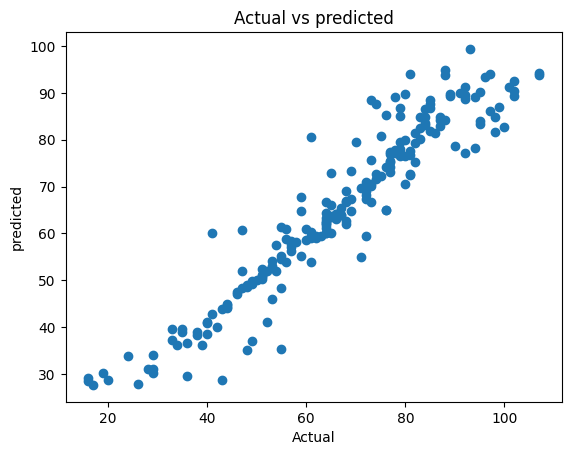

In [31]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
mae= mean_absolute_error(Y_test2, np.squeeze(model3.predict(X_test2)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test2, np.squeeze(model3.predict(X_test2)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [32]:
prediction3 =np.squeeze(model3.predict([[80,2,2,129,prediction1]]))
print("Prediction: {}".format(prediction3))

y_prd=np.squeeze(np.squeeze(model3.predict(X_test2)) )
predic_dif=pd.DataFrame({'Actual':Y_test2,'predict':y_prd,"differences":Y_test2-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 228ms/step
Prediction: 63.25043869018555
7/7 [==============================] - 0s 3ms/step


,Actual,predict,differences
2085,97,86.206894,10.793106
828,51,51.141937,-0.141937
2063,85,86.799438,-1.799438
2353,93,99.375137,-6.375137
1246,68,66.850975,1.149025
132,36,29.561493,6.438507
841,53,53.045361,-0.045361
1414,72,68.169014,3.830986
440,33,39.582069,-6.582069
1860,86,81.342712,4.657288


## Random forest with keras tuner RNN

In [33]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)

RandomForestRegressor(n_estimators=200, random_state=30)

In [34]:
prediction4 = np.squeeze(RF.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction4))

Prediction: 60.395


In [35]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 7ms/step
      Actual    predict  differences
898       57  56.419930     0.580070
182       25  27.058155    -2.058155
565       44  42.525578     1.474422
457       39  41.078476    -2.078476
1852      83  71.174225    11.825775
...      ...        ...          ...
1812      83  80.514862     2.485138
913       71  72.220856    -1.220856
1036      65  58.370720     6.629280
629       42  41.779289     0.220711
61        41  60.698902   -19.698902

[714 rows x 3 columns]


In [36]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-34.79405212402344
-23.045333862304688
37.85394287109375
27.24060821533203
-26.551055908203125
-23.19171142578125
45.190006256103516
28.93325424194336
-28.69586944580078
-53.311973571777344
26.934249877929688
29.951026916503906
-33.762298583984375
-25.45154571533203
34.305362701416016
-22.298110961914062
lower bound: -21.726639812210355
upper bound: 26.457365220812516


In [37]:
A.drop(A[(A['differences'] >26)].index, inplace=True)
A.drop(A[(A['differences'] <-21)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X3=B.drop('Actual',axis=1)
Y3=B['Actual']
X_train3, X_test3, Y_train3, Y_test3 =train_test_split(X3,Y3, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual     predict  
1         70   52.039806

In [38]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train3.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [39]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train3,Y_train3 ,epochs=100,validation_data=(X_test3,Y_test3))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model4 = tuner.hypermodel.build(best_hps)

model4.fit(X_train3, Y_train3, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 6s 126ms/step - loss: 65.1509 - mean_absolute_error: 65.1509 - val_loss: 7.9626 - val_mean_absolute_error: 7.9626
Epoch 2/2000
11/11 [==============================] - 0s 38ms/step - loss: 8.8539 - mean_absolute_error: 8.8539 - val_loss: 7.1525 - val_mean_absolute_error: 7.1525
Epoch 3/2000
11/11 [==============================] - 0s 39ms/step - loss: 6.5879 - mean_absolute_error: 6.5879 - val_loss: 7.2709 - val_mean_absolute_error: 7.2709
Epoch 4/2000
11/11 [==============================] - 0s 43ms/step - loss: 6.6903 - mean_absolute_error: 6.6903 - val_loss: 7.4630 - val_mean_absolute_error: 7.4630
Epoch 5/2000
11/11 [==============================] - 0s 40ms/step - loss: 5.8241 - mean_absolute_error: 5.8241 - val_loss: 5.8066 - val_mean_absolute_error: 5

11/11 [==============================] - 0s 38ms/step - loss: 4.6071 - mean_absolute_error: 4.6071 - val_loss: 4.8100 - val_mean_absolute_error: 4.8100
Epoch 50/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.4898 - mean_absolute_error: 4.4898 - val_loss: 4.3245 - val_mean_absolute_error: 4.3245
Epoch 51/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.5098 - mean_absolute_error: 4.5098 - val_loss: 4.7773 - val_mean_absolute_error: 4.7773
Epoch 52/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.4378 - mean_absolute_error: 4.4378 - val_loss: 5.0664 - val_mean_absolute_error: 5.0664
Epoch 53/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.3069 - mean_absolute_error: 4.3069 - val_loss: 4.2070 - val_mean_absolute_error: 4.2070
Epoch 54/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2032 - mean_absolute_error: 4.2032 - val_loss: 4.3601 - val_mean_absolute_error: 4.3601
Epoch 55/2000
11/1

11/11 [==============================] - 0s 41ms/step - loss: 4.2948 - mean_absolute_error: 4.2948 - val_loss: 4.2017 - val_mean_absolute_error: 4.2017
Epoch 99/2000
11/11 [==============================] - 1s 46ms/step - loss: 4.0034 - mean_absolute_error: 4.0034 - val_loss: 4.5421 - val_mean_absolute_error: 4.5421
Epoch 100/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.0636 - mean_absolute_error: 4.0636 - val_loss: 4.3899 - val_mean_absolute_error: 4.3899
Epoch 101/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.0370 - mean_absolute_error: 4.0370 - val_loss: 5.0342 - val_mean_absolute_error: 5.0342
Epoch 102/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1855 - mean_absolute_error: 4.1855 - val_loss: 4.4855 - val_mean_absolute_error: 4.4855
Epoch 103/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.4685 - mean_absolute_error: 4.4685 - val_loss: 5.3180 - val_mean_absolute_error: 5.3180
Epoch 104/2000

11/11 [==============================] - 0s 37ms/step - loss: 3.9832 - mean_absolute_error: 3.9832 - val_loss: 4.2910 - val_mean_absolute_error: 4.2910
Epoch 148/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.9664 - mean_absolute_error: 3.9664 - val_loss: 4.6763 - val_mean_absolute_error: 4.6763
Epoch 149/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.0925 - mean_absolute_error: 4.0925 - val_loss: 4.6224 - val_mean_absolute_error: 4.6224
Epoch 150/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.1550 - mean_absolute_error: 4.1550 - val_loss: 4.3825 - val_mean_absolute_error: 4.3825
Epoch 151/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8473 - mean_absolute_error: 3.8473 - val_loss: 4.3949 - val_mean_absolute_error: 4.3949
Epoch 152/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.0469 - mean_absolute_error: 4.0469 - val_loss: 4.2700 - val_mean_absolute_error: 4.2700
Epoch 153/200

11/11 [==============================] - 0s 36ms/step - loss: 4.4324 - mean_absolute_error: 4.4324 - val_loss: 4.9981 - val_mean_absolute_error: 4.9981
Epoch 197/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.1812 - mean_absolute_error: 4.1812 - val_loss: 4.3816 - val_mean_absolute_error: 4.3816
Epoch 198/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8630 - mean_absolute_error: 3.8630 - val_loss: 4.3669 - val_mean_absolute_error: 4.3669
Epoch 199/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.9454 - mean_absolute_error: 3.9454 - val_loss: 4.5156 - val_mean_absolute_error: 4.5156
Epoch 200/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.9334 - mean_absolute_error: 3.9334 - val_loss: 4.6801 - val_mean_absolute_error: 4.6801
Epoch 201/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.0613 - mean_absolute_error: 4.0613 - val_loss: 4.4660 - val_mean_absolute_error: 4.4660
Epoch 202/200

11/11 [==============================] - 0s 40ms/step - loss: 4.1060 - mean_absolute_error: 4.1060 - val_loss: 4.9179 - val_mean_absolute_error: 4.9179
Epoch 246/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1830 - mean_absolute_error: 4.1830 - val_loss: 4.3588 - val_mean_absolute_error: 4.3588
Epoch 247/2000
11/11 [==============================] - 0s 44ms/step - loss: 3.9773 - mean_absolute_error: 3.9773 - val_loss: 4.4050 - val_mean_absolute_error: 4.4050
Epoch 248/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.0036 - mean_absolute_error: 4.0036 - val_loss: 4.8959 - val_mean_absolute_error: 4.8959
Epoch 249/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.9371 - mean_absolute_error: 3.9371 - val_loss: 4.5328 - val_mean_absolute_error: 4.5328
Epoch 250/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.9595 - mean_absolute_error: 3.9595 - val_loss: 4.2244 - val_mean_absolute_error: 4.2244
Epoch 251/200

11/11 [==============================] - 0s 43ms/step - loss: 4.0690 - mean_absolute_error: 4.0690 - val_loss: 4.6862 - val_mean_absolute_error: 4.6862
Epoch 295/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8672 - mean_absolute_error: 3.8672 - val_loss: 4.4904 - val_mean_absolute_error: 4.4904
Epoch 296/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.7758 - mean_absolute_error: 3.7758 - val_loss: 4.5579 - val_mean_absolute_error: 4.5579
Epoch 297/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.8671 - mean_absolute_error: 3.8671 - val_loss: 4.6682 - val_mean_absolute_error: 4.6682
Epoch 298/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.9534 - mean_absolute_error: 3.9534 - val_loss: 4.9682 - val_mean_absolute_error: 4.9682
Epoch 299/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.0155 - mean_absolute_error: 4.0155 - val_loss: 4.4853 - val_mean_absolute_error: 4.4853
Epoch 300/200

11/11 [==============================] - 0s 41ms/step - loss: 3.9747 - mean_absolute_error: 3.9747 - val_loss: 4.4428 - val_mean_absolute_error: 4.4428
Epoch 344/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.6571 - mean_absolute_error: 3.6571 - val_loss: 4.4603 - val_mean_absolute_error: 4.4603
Epoch 345/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.7916 - mean_absolute_error: 3.7916 - val_loss: 4.3773 - val_mean_absolute_error: 4.3773
Epoch 346/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.8019 - mean_absolute_error: 3.8019 - val_loss: 4.3335 - val_mean_absolute_error: 4.3335
Epoch 347/2000
11/11 [==============================] - 1s 48ms/step - loss: 3.8470 - mean_absolute_error: 3.8470 - val_loss: 4.9497 - val_mean_absolute_error: 4.9497
Epoch 348/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8425 - mean_absolute_error: 3.8425 - val_loss: 4.8290 - val_mean_absolute_error: 4.8290
Epoch 349/200

11/11 [==============================] - 0s 41ms/step - loss: 3.9205 - mean_absolute_error: 3.9205 - val_loss: 4.4498 - val_mean_absolute_error: 4.4498
Epoch 393/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.8625 - mean_absolute_error: 3.8625 - val_loss: 4.7049 - val_mean_absolute_error: 4.7049
Epoch 394/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.9795 - mean_absolute_error: 3.9795 - val_loss: 5.1370 - val_mean_absolute_error: 5.1370
Epoch 395/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.7586 - mean_absolute_error: 3.7586 - val_loss: 4.3536 - val_mean_absolute_error: 4.3536
Epoch 396/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.7810 - mean_absolute_error: 3.7810 - val_loss: 4.3853 - val_mean_absolute_error: 4.3853
Epoch 397/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.7283 - mean_absolute_error: 3.7283 - val_loss: 4.3973 - val_mean_absolute_error: 4.3973
Epoch 398/200

11/11 [==============================] - 0s 38ms/step - loss: 4.0698 - mean_absolute_error: 4.0698 - val_loss: 4.4419 - val_mean_absolute_error: 4.4419
Epoch 442/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.9352 - mean_absolute_error: 3.9352 - val_loss: 4.6247 - val_mean_absolute_error: 4.6247
Epoch 443/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.8852 - mean_absolute_error: 3.8852 - val_loss: 4.4410 - val_mean_absolute_error: 4.4410
Epoch 444/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7336 - mean_absolute_error: 3.7336 - val_loss: 5.2195 - val_mean_absolute_error: 5.2195
Epoch 445/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.1430 - mean_absolute_error: 4.1430 - val_loss: 5.0235 - val_mean_absolute_error: 5.0235
Epoch 446/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8705 - mean_absolute_error: 3.8705 - val_loss: 4.4187 - val_mean_absolute_error: 4.4187
Epoch 447/200

11/11 [==============================] - 0s 39ms/step - loss: 3.8120 - mean_absolute_error: 3.8120 - val_loss: 4.5079 - val_mean_absolute_error: 4.5079
Epoch 491/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.0684 - mean_absolute_error: 4.0684 - val_loss: 4.3257 - val_mean_absolute_error: 4.3257
Epoch 492/2000
11/11 [==============================] - 0s 43ms/step - loss: 3.6758 - mean_absolute_error: 3.6758 - val_loss: 4.8112 - val_mean_absolute_error: 4.8112
Epoch 493/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.8876 - mean_absolute_error: 3.8876 - val_loss: 4.6630 - val_mean_absolute_error: 4.6630
Epoch 494/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8030 - mean_absolute_error: 3.8030 - val_loss: 4.5435 - val_mean_absolute_error: 4.5435
Epoch 495/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8089 - mean_absolute_error: 3.8089 - val_loss: 4.5399 - val_mean_absolute_error: 4.5399
Epoch 496/200

11/11 [==============================] - 0s 40ms/step - loss: 3.7764 - mean_absolute_error: 3.7764 - val_loss: 4.5236 - val_mean_absolute_error: 4.5236
Epoch 540/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.8497 - mean_absolute_error: 3.8497 - val_loss: 4.3905 - val_mean_absolute_error: 4.3905
Epoch 541/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.1537 - mean_absolute_error: 4.1537 - val_loss: 4.5019 - val_mean_absolute_error: 4.5019
Epoch 542/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.2291 - mean_absolute_error: 4.2291 - val_loss: 4.6111 - val_mean_absolute_error: 4.6111
Epoch 543/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.2903 - mean_absolute_error: 4.2903 - val_loss: 4.9944 - val_mean_absolute_error: 4.9944
Epoch 544/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.8811 - mean_absolute_error: 3.8811 - val_loss: 5.0809 - val_mean_absolute_error: 5.0809
Epoch 545/200

11/11 [==============================] - 0s 40ms/step - loss: 3.6645 - mean_absolute_error: 3.6645 - val_loss: 4.6305 - val_mean_absolute_error: 4.6305
Epoch 589/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.7331 - mean_absolute_error: 3.7331 - val_loss: 4.4796 - val_mean_absolute_error: 4.4796
Epoch 590/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.8068 - mean_absolute_error: 3.8068 - val_loss: 4.3982 - val_mean_absolute_error: 4.3982
Epoch 591/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.6305 - mean_absolute_error: 3.6305 - val_loss: 4.6016 - val_mean_absolute_error: 4.6016
Epoch 592/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.6182 - mean_absolute_error: 3.6182 - val_loss: 4.5844 - val_mean_absolute_error: 4.5844
Epoch 593/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7175 - mean_absolute_error: 3.7175 - val_loss: 4.5598 - val_mean_absolute_error: 4.5598
Epoch 594/200

11/11 [==============================] - 0s 44ms/step - loss: 4.1427 - mean_absolute_error: 4.1427 - val_loss: 4.3195 - val_mean_absolute_error: 4.3195
Epoch 638/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.9730 - mean_absolute_error: 3.9730 - val_loss: 4.3198 - val_mean_absolute_error: 4.3198
Epoch 639/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.9248 - mean_absolute_error: 3.9248 - val_loss: 4.3151 - val_mean_absolute_error: 4.3151
Epoch 640/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.9578 - mean_absolute_error: 3.9578 - val_loss: 4.4802 - val_mean_absolute_error: 4.4802
Epoch 641/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8941 - mean_absolute_error: 3.8941 - val_loss: 4.5594 - val_mean_absolute_error: 4.5594
Epoch 642/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.9616 - mean_absolute_error: 3.9616 - val_loss: 4.6020 - val_mean_absolute_error: 4.6020
Epoch 643/200

11/11 [==============================] - 0s 41ms/step - loss: 4.1072 - mean_absolute_error: 4.1072 - val_loss: 4.6077 - val_mean_absolute_error: 4.6077
Epoch 687/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.9025 - mean_absolute_error: 3.9025 - val_loss: 4.5164 - val_mean_absolute_error: 4.5164
Epoch 688/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.7787 - mean_absolute_error: 3.7787 - val_loss: 4.4951 - val_mean_absolute_error: 4.4951
Epoch 689/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.7091 - mean_absolute_error: 3.7091 - val_loss: 4.5621 - val_mean_absolute_error: 4.5621
Epoch 690/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.7295 - mean_absolute_error: 3.7295 - val_loss: 4.6360 - val_mean_absolute_error: 4.6360
Epoch 691/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7239 - mean_absolute_error: 3.7239 - val_loss: 4.5346 - val_mean_absolute_error: 4.5346
Epoch 692/200

11/11 [==============================] - 0s 40ms/step - loss: 4.1444 - mean_absolute_error: 4.1444 - val_loss: 4.5204 - val_mean_absolute_error: 4.5204
Epoch 736/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7556 - mean_absolute_error: 3.7556 - val_loss: 4.5488 - val_mean_absolute_error: 4.5488
Epoch 737/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.6981 - mean_absolute_error: 3.6981 - val_loss: 4.5342 - val_mean_absolute_error: 4.5342
Epoch 738/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.7838 - mean_absolute_error: 3.7838 - val_loss: 4.5191 - val_mean_absolute_error: 4.5191
Epoch 739/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.7568 - mean_absolute_error: 3.7568 - val_loss: 4.5349 - val_mean_absolute_error: 4.5349
Epoch 740/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.6618 - mean_absolute_error: 3.6618 - val_loss: 4.5331 - val_mean_absolute_error: 4.5331
Epoch 741/200

11/11 [==============================] - 0s 41ms/step - loss: 3.6729 - mean_absolute_error: 3.6729 - val_loss: 4.6087 - val_mean_absolute_error: 4.6087
Epoch 785/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7891 - mean_absolute_error: 3.7891 - val_loss: 4.6327 - val_mean_absolute_error: 4.6327
Epoch 786/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.6620 - mean_absolute_error: 3.6620 - val_loss: 4.8083 - val_mean_absolute_error: 4.8083
Epoch 787/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.7307 - mean_absolute_error: 3.7307 - val_loss: 4.4630 - val_mean_absolute_error: 4.4630
Epoch 788/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.6171 - mean_absolute_error: 3.6171 - val_loss: 4.5968 - val_mean_absolute_error: 4.5968
Epoch 789/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.6604 - mean_absolute_error: 3.6604 - val_loss: 4.5489 - val_mean_absolute_error: 4.5489
Epoch 790/200

11/11 [==============================] - 0s 46ms/step - loss: 3.7481 - mean_absolute_error: 3.7481 - val_loss: 4.6550 - val_mean_absolute_error: 4.6550
Epoch 834/2000
11/11 [==============================] - 1s 48ms/step - loss: 3.7430 - mean_absolute_error: 3.7430 - val_loss: 4.3707 - val_mean_absolute_error: 4.3707
Epoch 835/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.8173 - mean_absolute_error: 3.8173 - val_loss: 4.5343 - val_mean_absolute_error: 4.5343
Epoch 836/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.8215 - mean_absolute_error: 3.8215 - val_loss: 4.5354 - val_mean_absolute_error: 4.5354
Epoch 837/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.6821 - mean_absolute_error: 3.6821 - val_loss: 4.5817 - val_mean_absolute_error: 4.5817
Epoch 838/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.7409 - mean_absolute_error: 3.7409 - val_loss: 4.7384 - val_mean_absolute_error: 4.7384
Epoch 839/200

11/11 [==============================] - 0s 38ms/step - loss: 3.7854 - mean_absolute_error: 3.7854 - val_loss: 5.1052 - val_mean_absolute_error: 5.1052
Epoch 883/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8208 - mean_absolute_error: 3.8208 - val_loss: 5.1588 - val_mean_absolute_error: 5.1588
Epoch 884/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.8898 - mean_absolute_error: 3.8898 - val_loss: 5.2711 - val_mean_absolute_error: 5.2711
Epoch 885/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1147 - mean_absolute_error: 4.1147 - val_loss: 4.8195 - val_mean_absolute_error: 4.8195
Epoch 886/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7112 - mean_absolute_error: 3.7112 - val_loss: 4.5009 - val_mean_absolute_error: 4.5009
Epoch 887/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5924 - mean_absolute_error: 3.5924 - val_loss: 4.5423 - val_mean_absolute_error: 4.5423
Epoch 888/200

11/11 [==============================] - 0s 40ms/step - loss: 3.8145 - mean_absolute_error: 3.8145 - val_loss: 4.9232 - val_mean_absolute_error: 4.9232
Epoch 932/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8632 - mean_absolute_error: 3.8632 - val_loss: 4.6399 - val_mean_absolute_error: 4.6399
Epoch 933/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7523 - mean_absolute_error: 3.7523 - val_loss: 4.6996 - val_mean_absolute_error: 4.6996
Epoch 934/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7032 - mean_absolute_error: 3.7032 - val_loss: 4.7356 - val_mean_absolute_error: 4.7356
Epoch 935/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5935 - mean_absolute_error: 3.5935 - val_loss: 4.6600 - val_mean_absolute_error: 4.6600
Epoch 936/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.5339 - mean_absolute_error: 3.5339 - val_loss: 4.6320 - val_mean_absolute_error: 4.6320
Epoch 937/200

11/11 [==============================] - 0s 37ms/step - loss: 4.1729 - mean_absolute_error: 4.1729 - val_loss: 4.6962 - val_mean_absolute_error: 4.6962
Epoch 981/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1793 - mean_absolute_error: 4.1793 - val_loss: 4.6454 - val_mean_absolute_error: 4.6454
Epoch 982/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2376 - mean_absolute_error: 4.2376 - val_loss: 4.9640 - val_mean_absolute_error: 4.9640
Epoch 983/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.2173 - mean_absolute_error: 4.2173 - val_loss: 4.7283 - val_mean_absolute_error: 4.7283
Epoch 984/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2737 - mean_absolute_error: 4.2737 - val_loss: 4.9515 - val_mean_absolute_error: 4.9515
Epoch 985/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.5208 - mean_absolute_error: 4.5208 - val_loss: 5.3549 - val_mean_absolute_error: 5.3549
Epoch 986/200

Epoch 1029/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.9964 - mean_absolute_error: 3.9964 - val_loss: 4.5669 - val_mean_absolute_error: 4.5669
Epoch 1030/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.9489 - mean_absolute_error: 3.9489 - val_loss: 4.5544 - val_mean_absolute_error: 4.5544
Epoch 1031/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.0089 - mean_absolute_error: 4.0089 - val_loss: 4.7051 - val_mean_absolute_error: 4.7051
Epoch 1032/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8995 - mean_absolute_error: 3.8995 - val_loss: 4.8124 - val_mean_absolute_error: 4.8124
Epoch 1033/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.9722 - mean_absolute_error: 3.9722 - val_loss: 4.3930 - val_mean_absolute_error: 4.3930
Epoch 1034/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.0012 - mean_absolute_error: 4.0012 - val_loss: 4.6203 - val_mean_absolute_error:

Epoch 1078/2000
11/11 [==============================] - 0s 43ms/step - loss: 3.7861 - mean_absolute_error: 3.7861 - val_loss: 4.5591 - val_mean_absolute_error: 4.5591
Epoch 1079/2000
11/11 [==============================] - 1s 47ms/step - loss: 3.8131 - mean_absolute_error: 3.8131 - val_loss: 4.5725 - val_mean_absolute_error: 4.5725
Epoch 1080/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.9580 - mean_absolute_error: 3.9580 - val_loss: 4.5033 - val_mean_absolute_error: 4.5033
Epoch 1081/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.8675 - mean_absolute_error: 3.8675 - val_loss: 4.5170 - val_mean_absolute_error: 4.5170
Epoch 1082/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.0034 - mean_absolute_error: 4.0034 - val_loss: 4.5463 - val_mean_absolute_error: 4.5463
Epoch 1083/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.9901 - mean_absolute_error: 3.9901 - val_loss: 4.4639 - val_mean_absolute_error:

Epoch 1127/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7366 - mean_absolute_error: 3.7366 - val_loss: 4.6186 - val_mean_absolute_error: 4.6186
Epoch 1128/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8507 - mean_absolute_error: 3.8507 - val_loss: 4.7761 - val_mean_absolute_error: 4.7761
Epoch 1129/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.8058 - mean_absolute_error: 3.8058 - val_loss: 4.6551 - val_mean_absolute_error: 4.6551
Epoch 1130/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.8129 - mean_absolute_error: 3.8129 - val_loss: 4.5767 - val_mean_absolute_error: 4.5767
Epoch 1131/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.7055 - mean_absolute_error: 3.7055 - val_loss: 4.5756 - val_mean_absolute_error: 4.5756
Epoch 1132/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.8678 - mean_absolute_error: 3.8678 - val_loss: 4.5733 - val_mean_absolute_error:

Epoch 1176/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.5974 - mean_absolute_error: 3.5974 - val_loss: 4.7627 - val_mean_absolute_error: 4.7627
Epoch 1177/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.7300 - mean_absolute_error: 3.7300 - val_loss: 4.5956 - val_mean_absolute_error: 4.5956
Epoch 1178/2000
11/11 [==============================] - 0s 46ms/step - loss: 3.7569 - mean_absolute_error: 3.7569 - val_loss: 4.6591 - val_mean_absolute_error: 4.6591
Epoch 1179/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.7212 - mean_absolute_error: 3.7212 - val_loss: 4.5503 - val_mean_absolute_error: 4.5503
Epoch 1180/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.7492 - mean_absolute_error: 3.7492 - val_loss: 4.4880 - val_mean_absolute_error: 4.4880
Epoch 1181/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.7763 - mean_absolute_error: 3.7763 - val_loss: 4.8794 - val_mean_absolute_error:

Epoch 1225/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.9073 - mean_absolute_error: 3.9073 - val_loss: 4.9566 - val_mean_absolute_error: 4.9566
Epoch 1226/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.7757 - mean_absolute_error: 3.7757 - val_loss: 5.0421 - val_mean_absolute_error: 5.0421
Epoch 1227/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.9701 - mean_absolute_error: 3.9701 - val_loss: 4.7796 - val_mean_absolute_error: 4.7796
Epoch 1228/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.9576 - mean_absolute_error: 3.9576 - val_loss: 4.7381 - val_mean_absolute_error: 4.7381
Epoch 1229/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.6594 - mean_absolute_error: 3.6594 - val_loss: 4.5870 - val_mean_absolute_error: 4.5870
Epoch 1230/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.6705 - mean_absolute_error: 3.6705 - val_loss: 4.4790 - val_mean_absolute_error:

Epoch 1274/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5428 - mean_absolute_error: 3.5428 - val_loss: 4.5726 - val_mean_absolute_error: 4.5726
Epoch 1275/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.5084 - mean_absolute_error: 3.5084 - val_loss: 4.7819 - val_mean_absolute_error: 4.7819
Epoch 1276/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5629 - mean_absolute_error: 3.5629 - val_loss: 4.7599 - val_mean_absolute_error: 4.7599
Epoch 1277/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.5172 - mean_absolute_error: 3.5172 - val_loss: 4.6741 - val_mean_absolute_error: 4.6741
Epoch 1278/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.5655 - mean_absolute_error: 3.5655 - val_loss: 4.6303 - val_mean_absolute_error: 4.6303
Epoch 1279/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.6382 - mean_absolute_error: 3.6382 - val_loss: 4.6180 - val_mean_absolute_error:

Epoch 1323/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.4887 - mean_absolute_error: 3.4887 - val_loss: 4.4823 - val_mean_absolute_error: 4.4823
Epoch 1324/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.5087 - mean_absolute_error: 3.5087 - val_loss: 4.4090 - val_mean_absolute_error: 4.4090
Epoch 1325/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.5771 - mean_absolute_error: 3.5771 - val_loss: 4.5537 - val_mean_absolute_error: 4.5537
Epoch 1326/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.5349 - mean_absolute_error: 3.5349 - val_loss: 4.4128 - val_mean_absolute_error: 4.4128
Epoch 1327/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.5204 - mean_absolute_error: 3.5204 - val_loss: 4.4853 - val_mean_absolute_error: 4.4853
Epoch 1328/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.5444 - mean_absolute_error: 3.5444 - val_loss: 4.4770 - val_mean_absolute_error:

Epoch 1372/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5163 - mean_absolute_error: 3.5163 - val_loss: 4.5684 - val_mean_absolute_error: 4.5684
Epoch 1373/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.6970 - mean_absolute_error: 3.6970 - val_loss: 4.5752 - val_mean_absolute_error: 4.5752
Epoch 1374/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.5394 - mean_absolute_error: 3.5394 - val_loss: 4.4724 - val_mean_absolute_error: 4.4724
Epoch 1375/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.5578 - mean_absolute_error: 3.5578 - val_loss: 4.5580 - val_mean_absolute_error: 4.5580
Epoch 1376/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.4266 - mean_absolute_error: 3.4266 - val_loss: 4.5891 - val_mean_absolute_error: 4.5891
Epoch 1377/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.5766 - mean_absolute_error: 3.5766 - val_loss: 4.7134 - val_mean_absolute_error:

Epoch 1421/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1738 - mean_absolute_error: 4.1738 - val_loss: 4.5205 - val_mean_absolute_error: 4.5205
Epoch 1422/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.7195 - mean_absolute_error: 3.7195 - val_loss: 4.5198 - val_mean_absolute_error: 4.5198
Epoch 1423/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.6825 - mean_absolute_error: 3.6825 - val_loss: 4.6197 - val_mean_absolute_error: 4.6197
Epoch 1424/2000
11/11 [==============================] - 0s 43ms/step - loss: 3.5385 - mean_absolute_error: 3.5385 - val_loss: 4.5976 - val_mean_absolute_error: 4.5976
Epoch 1425/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.4818 - mean_absolute_error: 3.4818 - val_loss: 4.5811 - val_mean_absolute_error: 4.5811
Epoch 1426/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.4899 - mean_absolute_error: 3.4899 - val_loss: 4.6003 - val_mean_absolute_error:

Epoch 1470/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4861 - mean_absolute_error: 3.4861 - val_loss: 4.6249 - val_mean_absolute_error: 4.6249
Epoch 1471/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4942 - mean_absolute_error: 3.4942 - val_loss: 5.1712 - val_mean_absolute_error: 5.1712
Epoch 1472/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.6573 - mean_absolute_error: 3.6573 - val_loss: 4.6757 - val_mean_absolute_error: 4.6757
Epoch 1473/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.5129 - mean_absolute_error: 3.5129 - val_loss: 4.6524 - val_mean_absolute_error: 4.6524
Epoch 1474/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.5300 - mean_absolute_error: 3.5300 - val_loss: 4.6577 - val_mean_absolute_error: 4.6577
Epoch 1475/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.5160 - mean_absolute_error: 3.5160 - val_loss: 4.6829 - val_mean_absolute_error:

Epoch 1519/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.6831 - mean_absolute_error: 3.6831 - val_loss: 4.6503 - val_mean_absolute_error: 4.6503
Epoch 1520/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5340 - mean_absolute_error: 3.5340 - val_loss: 4.6819 - val_mean_absolute_error: 4.6819
Epoch 1521/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.6160 - mean_absolute_error: 3.6160 - val_loss: 4.7893 - val_mean_absolute_error: 4.7893
Epoch 1522/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.6281 - mean_absolute_error: 3.6281 - val_loss: 4.5707 - val_mean_absolute_error: 4.5707
Epoch 1523/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.6217 - mean_absolute_error: 3.6217 - val_loss: 4.6359 - val_mean_absolute_error: 4.6359
Epoch 1524/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.5399 - mean_absolute_error: 3.5399 - val_loss: 4.5510 - val_mean_absolute_error:

Epoch 1568/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4763 - mean_absolute_error: 3.4763 - val_loss: 4.6025 - val_mean_absolute_error: 4.6025
Epoch 1569/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4642 - mean_absolute_error: 3.4642 - val_loss: 4.7079 - val_mean_absolute_error: 4.7079
Epoch 1570/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.4221 - mean_absolute_error: 3.4221 - val_loss: 4.6314 - val_mean_absolute_error: 4.6314
Epoch 1571/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4805 - mean_absolute_error: 3.4805 - val_loss: 4.8286 - val_mean_absolute_error: 4.8286
Epoch 1572/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4803 - mean_absolute_error: 3.4803 - val_loss: 4.6591 - val_mean_absolute_error: 4.6591
Epoch 1573/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.7241 - mean_absolute_error: 3.7241 - val_loss: 4.6244 - val_mean_absolute_error:

Epoch 1617/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.4576 - mean_absolute_error: 3.4576 - val_loss: 4.5682 - val_mean_absolute_error: 4.5682
Epoch 1618/2000
11/11 [==============================] - 0s 40ms/step - loss: 3.6615 - mean_absolute_error: 3.6615 - val_loss: 4.5591 - val_mean_absolute_error: 4.5591
Epoch 1619/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.6772 - mean_absolute_error: 3.6772 - val_loss: 4.5606 - val_mean_absolute_error: 4.5606
Epoch 1620/2000
11/11 [==============================] - 0s 42ms/step - loss: 3.5794 - mean_absolute_error: 3.5794 - val_loss: 4.4163 - val_mean_absolute_error: 4.4163
Epoch 1621/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.7923 - mean_absolute_error: 3.7923 - val_loss: 4.4979 - val_mean_absolute_error: 4.4979
Epoch 1622/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.5333 - mean_absolute_error: 3.5333 - val_loss: 4.5530 - val_mean_absolute_error:

Epoch 1666/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.6768 - mean_absolute_error: 3.6768 - val_loss: 4.4947 - val_mean_absolute_error: 4.4947
Epoch 1667/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.7225 - mean_absolute_error: 3.7225 - val_loss: 4.7190 - val_mean_absolute_error: 4.7190
Epoch 1668/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.6179 - mean_absolute_error: 3.6179 - val_loss: 4.6234 - val_mean_absolute_error: 4.6234
Epoch 1669/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.6226 - mean_absolute_error: 3.6226 - val_loss: 4.7399 - val_mean_absolute_error: 4.7399
Epoch 1670/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.6070 - mean_absolute_error: 3.6070 - val_loss: 4.5620 - val_mean_absolute_error: 4.5620
Epoch 1671/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5158 - mean_absolute_error: 3.5158 - val_loss: 4.8808 - val_mean_absolute_error:

Epoch 1715/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5381 - mean_absolute_error: 3.5381 - val_loss: 4.6297 - val_mean_absolute_error: 4.6297
Epoch 1716/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5470 - mean_absolute_error: 3.5470 - val_loss: 4.4519 - val_mean_absolute_error: 4.4519
Epoch 1717/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4918 - mean_absolute_error: 3.4918 - val_loss: 4.5666 - val_mean_absolute_error: 4.5666
Epoch 1718/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.6261 - mean_absolute_error: 3.6261 - val_loss: 4.5910 - val_mean_absolute_error: 4.5910
Epoch 1719/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.5442 - mean_absolute_error: 3.5442 - val_loss: 4.4827 - val_mean_absolute_error: 4.4827
Epoch 1720/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4726 - mean_absolute_error: 3.4726 - val_loss: 4.4240 - val_mean_absolute_error:

Epoch 1764/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.7077 - mean_absolute_error: 3.7077 - val_loss: 4.6077 - val_mean_absolute_error: 4.6077
Epoch 1765/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4921 - mean_absolute_error: 3.4921 - val_loss: 4.9158 - val_mean_absolute_error: 4.9158
Epoch 1766/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.6528 - mean_absolute_error: 3.6528 - val_loss: 4.7160 - val_mean_absolute_error: 4.7160
Epoch 1767/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.5653 - mean_absolute_error: 3.5653 - val_loss: 4.8780 - val_mean_absolute_error: 4.8780
Epoch 1768/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5967 - mean_absolute_error: 3.5967 - val_loss: 4.7178 - val_mean_absolute_error: 4.7178
Epoch 1769/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5356 - mean_absolute_error: 3.5356 - val_loss: 4.6712 - val_mean_absolute_error:

Epoch 1813/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4140 - mean_absolute_error: 3.4140 - val_loss: 4.6726 - val_mean_absolute_error: 4.6726
Epoch 1814/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5581 - mean_absolute_error: 3.5581 - val_loss: 4.5588 - val_mean_absolute_error: 4.5588
Epoch 1815/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5573 - mean_absolute_error: 3.5573 - val_loss: 4.6143 - val_mean_absolute_error: 4.6143
Epoch 1816/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5084 - mean_absolute_error: 3.5084 - val_loss: 4.7945 - val_mean_absolute_error: 4.7945
Epoch 1817/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5063 - mean_absolute_error: 3.5063 - val_loss: 4.6989 - val_mean_absolute_error: 4.6989
Epoch 1818/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4661 - mean_absolute_error: 3.4661 - val_loss: 4.5016 - val_mean_absolute_error:

Epoch 1862/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4291 - mean_absolute_error: 3.4291 - val_loss: 4.7059 - val_mean_absolute_error: 4.7059
Epoch 1863/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4574 - mean_absolute_error: 3.4574 - val_loss: 4.6455 - val_mean_absolute_error: 4.6455
Epoch 1864/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5481 - mean_absolute_error: 3.5481 - val_loss: 4.6670 - val_mean_absolute_error: 4.6670
Epoch 1865/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.8072 - mean_absolute_error: 3.8072 - val_loss: 4.4087 - val_mean_absolute_error: 4.4087
Epoch 1866/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.4522 - mean_absolute_error: 3.4522 - val_loss: 4.6729 - val_mean_absolute_error: 4.6729
Epoch 1867/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5230 - mean_absolute_error: 3.5230 - val_loss: 4.8232 - val_mean_absolute_error:

Epoch 1911/2000
11/11 [==============================] - 0s 35ms/step - loss: 30.4760 - mean_absolute_error: 30.4760 - val_loss: 30.2625 - val_mean_absolute_error: 30.2625
Epoch 1912/2000
11/11 [==============================] - 0s 35ms/step - loss: 65.6323 - mean_absolute_error: 65.6323 - val_loss: 32.0273 - val_mean_absolute_error: 32.0273
Epoch 1913/2000
11/11 [==============================] - 0s 34ms/step - loss: 26.6894 - mean_absolute_error: 26.6894 - val_loss: 16.1570 - val_mean_absolute_error: 16.1570
Epoch 1914/2000
11/11 [==============================] - 0s 35ms/step - loss: 16.0261 - mean_absolute_error: 16.0261 - val_loss: 25.7416 - val_mean_absolute_error: 25.7416
Epoch 1915/2000
11/11 [==============================] - 0s 36ms/step - loss: 13.0073 - mean_absolute_error: 13.0073 - val_loss: 10.0534 - val_mean_absolute_error: 10.0534
Epoch 1916/2000
11/11 [==============================] - 0s 32ms/step - loss: 55.0052 - mean_absolute_error: 55.0052 - val_loss: 20.9103 - v

11/11 [==============================] - 0s 33ms/step - loss: 4.1676 - mean_absolute_error: 4.1676 - val_loss: 4.6791 - val_mean_absolute_error: 4.6791
Epoch 1960/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.4311 - mean_absolute_error: 4.4311 - val_loss: 4.9923 - val_mean_absolute_error: 4.9923
Epoch 1961/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.6005 - mean_absolute_error: 4.6005 - val_loss: 4.7075 - val_mean_absolute_error: 4.7075
Epoch 1962/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.5588 - mean_absolute_error: 4.5588 - val_loss: 5.3080 - val_mean_absolute_error: 5.3080
Epoch 1963/2000
11/11 [==============================] - 0s 32ms/step - loss: 5.1055 - mean_absolute_error: 5.1055 - val_loss: 5.4511 - val_mean_absolute_error: 5.4511
Epoch 1964/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.5199 - mean_absolute_error: 4.5199 - val_loss: 5.0224 - val_mean_absolute_error: 5.0224
Epoch 19

7/7 [==============================] - 0s 11ms/step
r2_score: 0.8925636000144421
7/7 [==============================] - 0s 11ms/step
mean squired error: 42.842712379525075
mean absolute error: 4.722894486057701
7/7 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

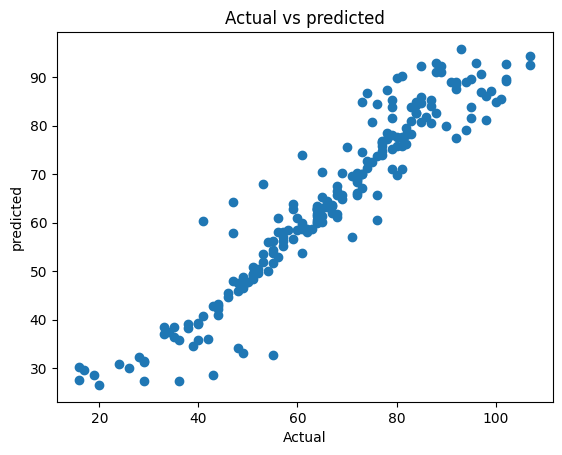

In [40]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test3, np.squeeze(model4.predict(X_test3)) )
r2_score=print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
mae= mean_absolute_error(Y_test3, np.squeeze(model4.predict(X_test3)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test3, np.squeeze(model4.predict(X_test3)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [41]:
prediction5 =np.squeeze(model4.predict([[80,2,2,129,prediction4]]))
print("Prediction: {}".format(prediction5))

y_prd=np.squeeze(np.squeeze(model4.predict(X_test3)) )
predic_dif=pd.DataFrame({'Actual':Y_test3,'predict':y_prd,"differences":Y_test3-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 376ms/step
Prediction: 61.798030853271484
7/7 [==============================] - 0s 11ms/step


,Actual,predict,differences
2085,97,87.050240,9.949760
828,51,49.372108,1.627892
2063,85,84.595901,0.404099
2353,93,95.852501,-2.852501
1246,68,66.528969,1.471031
132,36,27.388163,8.611837
841,53,51.842541,1.157459
1414,72,68.822105,3.177895
440,33,38.414833,-5.414833
1860,86,81.763039,4.236961


## Dense with keras tuner RNN

In [42]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model5=Sequential()
model5.add(Dense(128, input_dim=4, activation='relu'))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(1,activation='linear'))
model5.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               640       
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [43]:
model5.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 10ms/step - loss: 430.9626 - mae: 14.6144 - val_loss: 103.2765 - val_mae: 7.4933
Epoch 2/2000
37/37 [==============================] - 0s 4ms/step - loss: 103.7521 - mae: 7.2786 - val_loss: 90.1724 - val_mae: 6.7515
Epoch 3/2000
37/37 [==============================] - 0s 4ms/step - loss: 96.5017 - mae: 6.8476 - val_loss: 84.5815 - val_mae: 6.5070
Epoch 4/2000
37/37 [==============================] - 0s 4ms/step - loss: 94.2829 - mae: 6.6674 - val_loss: 81.5867 - val_mae: 6.3699
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 91.0617 - mae: 6.5794 - val_loss: 80.4546 - val_mae: 6.1350
Epoch 6/2000
37/37 [==============================] - 0s 4ms/step - loss: 87.9605 - mae: 6.4100 - val_loss: 78.6082 - val_mae: 5.9824
Epoch 7/2000
37/37 [==============================] - 0s 3ms/step - loss: 84.6652 - mae: 6.2052 - val_loss: 78.1836 - val_mae: 6.2835
Epoch 8/2000
37/37 [==============================] - 0s 

Epoch 62/2000
37/37 [==============================] - 0s 4ms/step - loss: 57.9690 - mae: 5.2675 - val_loss: 57.5903 - val_mae: 5.0721
Epoch 63/2000
37/37 [==============================] - 0s 3ms/step - loss: 55.5283 - mae: 5.0136 - val_loss: 53.8519 - val_mae: 4.8105
Epoch 64/2000
37/37 [==============================] - 0s 4ms/step - loss: 56.1591 - mae: 5.0384 - val_loss: 56.1182 - val_mae: 4.9985
Epoch 65/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.8316 - mae: 5.0798 - val_loss: 56.3642 - val_mae: 4.9606
Epoch 66/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.9409 - mae: 4.9642 - val_loss: 57.0070 - val_mae: 5.1705
Epoch 67/2000
37/37 [==============================] - 0s 5ms/step - loss: 56.0746 - mae: 5.1488 - val_loss: 55.0893 - val_mae: 4.8616
Epoch 68/2000
37/37 [==============================] - 0s 3ms/step - loss: 54.6615 - mae: 4.9799 - val_loss: 55.9940 - val_mae: 5.0469
Epoch 69/2000
37/37 [==============================] - 

37/37 [==============================] - 0s 4ms/step - loss: 53.1849 - mae: 4.8864 - val_loss: 57.2110 - val_mae: 5.0314
Epoch 123/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.9696 - mae: 5.0729 - val_loss: 58.4732 - val_mae: 5.2972
Epoch 124/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.8644 - mae: 5.0942 - val_loss: 64.5029 - val_mae: 5.6332
Epoch 125/2000
37/37 [==============================] - 0s 5ms/step - loss: 54.8506 - mae: 5.0660 - val_loss: 54.6942 - val_mae: 4.8863
Epoch 126/2000
37/37 [==============================] - 0s 3ms/step - loss: 54.2406 - mae: 4.9475 - val_loss: 72.9441 - val_mae: 6.2884
Epoch 127/2000
37/37 [==============================] - 0s 3ms/step - loss: 57.5903 - mae: 5.1829 - val_loss: 55.1852 - val_mae: 4.9209
Epoch 128/2000
37/37 [==============================] - 0s 3ms/step - loss: 53.8929 - mae: 4.9219 - val_loss: 54.4165 - val_mae: 4.8592
Epoch 129/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 52.1362 - mae: 4.8134 - val_loss: 54.7889 - val_mae: 4.8470
Epoch 183/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.9787 - mae: 4.8381 - val_loss: 53.7200 - val_mae: 4.8181
Epoch 184/2000
37/37 [==============================] - 0s 3ms/step - loss: 52.6081 - mae: 4.8849 - val_loss: 56.9905 - val_mae: 5.0960
Epoch 185/2000
37/37 [==============================] - 0s 4ms/step - loss: 53.7182 - mae: 4.9407 - val_loss: 54.0349 - val_mae: 4.9715
Epoch 186/2000
37/37 [==============================] - 0s 3ms/step - loss: 52.7312 - mae: 4.9330 - val_loss: 55.6258 - val_mae: 5.0654
Epoch 187/2000
37/37 [==============================] - 0s 3ms/step - loss: 54.6372 - mae: 5.1993 - val_loss: 55.1668 - val_mae: 5.0849
Epoch 188/2000
37/37 [==============================] - 0s 3ms/step - loss: 52.4851 - mae: 4.8198 - val_loss: 57.1343 - val_mae: 5.2240
Epoch 189/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 50.5625 - mae: 4.8305 - val_loss: 63.2163 - val_mae: 5.4208
Epoch 243/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.7440 - mae: 4.8933 - val_loss: 54.4667 - val_mae: 4.9465
Epoch 244/2000
37/37 [==============================] - 0s 3ms/step - loss: 52.1064 - mae: 4.9913 - val_loss: 56.3429 - val_mae: 5.1189
Epoch 245/2000
37/37 [==============================] - 0s 3ms/step - loss: 50.8539 - mae: 4.7642 - val_loss: 54.2899 - val_mae: 4.8748
Epoch 246/2000
37/37 [==============================] - 0s 3ms/step - loss: 49.9290 - mae: 4.7689 - val_loss: 53.7037 - val_mae: 4.8359
Epoch 247/2000
37/37 [==============================] - 0s 3ms/step - loss: 50.2948 - mae: 4.7397 - val_loss: 53.3165 - val_mae: 4.8136
Epoch 248/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.4053 - mae: 4.9098 - val_loss: 57.2808 - val_mae: 5.1254
Epoch 249/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 49.8372 - mae: 4.8150 - val_loss: 59.1962 - val_mae: 5.2891
Epoch 303/2000
37/37 [==============================] - 0s 3ms/step - loss: 49.1154 - mae: 4.7490 - val_loss: 51.7230 - val_mae: 4.8235
Epoch 304/2000
37/37 [==============================] - 0s 3ms/step - loss: 48.2443 - mae: 4.6847 - val_loss: 54.3416 - val_mae: 4.9292
Epoch 305/2000
37/37 [==============================] - 0s 2ms/step - loss: 50.6540 - mae: 4.8491 - val_loss: 60.0629 - val_mae: 5.4941
Epoch 306/2000
37/37 [==============================] - 0s 2ms/step - loss: 49.6099 - mae: 4.8477 - val_loss: 53.1091 - val_mae: 4.8757
Epoch 307/2000
37/37 [==============================] - 0s 3ms/step - loss: 47.8013 - mae: 4.6173 - val_loss: 52.1280 - val_mae: 4.8020
Epoch 308/2000
37/37 [==============================] - 0s 3ms/step - loss: 47.5847 - mae: 4.6249 - val_loss: 53.2457 - val_mae: 4.8677
Epoch 309/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 46.5340 - mae: 4.5936 - val_loss: 51.2807 - val_mae: 4.7486
Epoch 363/2000
37/37 [==============================] - 0s 3ms/step - loss: 46.2084 - mae: 4.5493 - val_loss: 51.8585 - val_mae: 4.7997
Epoch 364/2000
37/37 [==============================] - 0s 2ms/step - loss: 45.9729 - mae: 4.5684 - val_loss: 51.0088 - val_mae: 4.7889
Epoch 365/2000
37/37 [==============================] - 0s 3ms/step - loss: 48.9402 - mae: 4.8118 - val_loss: 54.9706 - val_mae: 5.0348
Epoch 366/2000
37/37 [==============================] - 0s 3ms/step - loss: 50.4764 - mae: 4.8600 - val_loss: 51.4086 - val_mae: 4.7941
Epoch 367/2000
37/37 [==============================] - 0s 2ms/step - loss: 47.1079 - mae: 4.7006 - val_loss: 56.4392 - val_mae: 5.3136
Epoch 368/2000
37/37 [==============================] - 0s 2ms/step - loss: 48.8392 - mae: 4.7601 - val_loss: 54.5668 - val_mae: 4.9344
Epoch 369/2000
37/37 [==============================] - 0s 2ms/

37/37 [==============================] - 0s 3ms/step - loss: 44.8347 - mae: 4.5636 - val_loss: 51.8331 - val_mae: 4.8507
Epoch 423/2000
37/37 [==============================] - 0s 3ms/step - loss: 45.9273 - mae: 4.6578 - val_loss: 51.3976 - val_mae: 4.7200
Epoch 424/2000
37/37 [==============================] - 0s 3ms/step - loss: 46.8948 - mae: 4.6482 - val_loss: 54.4350 - val_mae: 4.9686
Epoch 425/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.2491 - mae: 4.5062 - val_loss: 51.8210 - val_mae: 4.7743
Epoch 426/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.9753 - mae: 4.5008 - val_loss: 50.7729 - val_mae: 4.7170
Epoch 427/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.5221 - mae: 4.5133 - val_loss: 50.7937 - val_mae: 4.7046
Epoch 428/2000
37/37 [==============================] - 0s 3ms/step - loss: 45.5022 - mae: 4.5307 - val_loss: 51.2309 - val_mae: 4.7263
Epoch 429/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 44.2463 - mae: 4.5681 - val_loss: 53.6082 - val_mae: 4.8564
Epoch 483/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.8562 - mae: 4.5572 - val_loss: 54.3081 - val_mae: 5.0561
Epoch 484/2000
37/37 [==============================] - 0s 3ms/step - loss: 47.1104 - mae: 4.7432 - val_loss: 52.1968 - val_mae: 4.7774
Epoch 485/2000
37/37 [==============================] - 0s 3ms/step - loss: 43.2336 - mae: 4.4702 - val_loss: 56.2043 - val_mae: 5.1494
Epoch 486/2000
37/37 [==============================] - 0s 3ms/step - loss: 43.9262 - mae: 4.5267 - val_loss: 51.7623 - val_mae: 4.7130
Epoch 487/2000
37/37 [==============================] - 0s 3ms/step - loss: 42.8610 - mae: 4.4081 - val_loss: 50.9952 - val_mae: 4.7607
Epoch 488/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.3285 - mae: 4.5377 - val_loss: 53.2038 - val_mae: 4.8043
Epoch 489/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 2ms/step - loss: 42.8794 - mae: 4.4616 - val_loss: 53.2631 - val_mae: 4.8107
Epoch 543/2000
37/37 [==============================] - 0s 3ms/step - loss: 42.6274 - mae: 4.4055 - val_loss: 51.9392 - val_mae: 4.6893
Epoch 544/2000
37/37 [==============================] - 0s 2ms/step - loss: 41.3941 - mae: 4.3614 - val_loss: 51.4469 - val_mae: 4.7046
Epoch 545/2000
37/37 [==============================] - 0s 2ms/step - loss: 42.8063 - mae: 4.3921 - val_loss: 52.7815 - val_mae: 4.7868
Epoch 546/2000
37/37 [==============================] - 0s 2ms/step - loss: 42.3956 - mae: 4.4116 - val_loss: 53.9261 - val_mae: 4.8826
Epoch 547/2000
37/37 [==============================] - 0s 3ms/step - loss: 44.2073 - mae: 4.4948 - val_loss: 57.1302 - val_mae: 5.2162
Epoch 548/2000
37/37 [==============================] - 0s 3ms/step - loss: 45.0992 - mae: 4.6458 - val_loss: 54.0150 - val_mae: 5.0005
Epoch 549/2000
37/37 [==============================] - 0s 2ms/

37/37 [==============================] - 0s 2ms/step - loss: 41.2240 - mae: 4.3400 - val_loss: 52.3494 - val_mae: 4.7817
Epoch 603/2000
37/37 [==============================] - 0s 2ms/step - loss: 41.8229 - mae: 4.3651 - val_loss: 52.4075 - val_mae: 4.8330
Epoch 604/2000
37/37 [==============================] - 0s 2ms/step - loss: 40.9007 - mae: 4.2777 - val_loss: 53.7715 - val_mae: 4.9200
Epoch 605/2000
37/37 [==============================] - 0s 2ms/step - loss: 42.5852 - mae: 4.4262 - val_loss: 52.0874 - val_mae: 4.8027
Epoch 606/2000
37/37 [==============================] - 0s 2ms/step - loss: 41.0061 - mae: 4.2565 - val_loss: 51.2792 - val_mae: 4.6663
Epoch 607/2000
37/37 [==============================] - 0s 2ms/step - loss: 41.6492 - mae: 4.3620 - val_loss: 55.3617 - val_mae: 4.9952
Epoch 608/2000
37/37 [==============================] - 0s 3ms/step - loss: 42.9515 - mae: 4.4823 - val_loss: 52.0546 - val_mae: 4.7430
Epoch 609/2000
37/37 [==============================] - 0s 2ms/

37/37 [==============================] - 0s 4ms/step - loss: 40.0057 - mae: 4.2072 - val_loss: 53.1144 - val_mae: 4.7889
Epoch 663/2000
37/37 [==============================] - 0s 3ms/step - loss: 42.3012 - mae: 4.3890 - val_loss: 51.0774 - val_mae: 4.6957
Epoch 664/2000
37/37 [==============================] - 0s 4ms/step - loss: 44.9168 - mae: 4.6382 - val_loss: 51.5352 - val_mae: 4.7684
Epoch 665/2000
37/37 [==============================] - 0s 3ms/step - loss: 40.6225 - mae: 4.2868 - val_loss: 50.4184 - val_mae: 4.6362
Epoch 666/2000
37/37 [==============================] - 0s 3ms/step - loss: 40.4606 - mae: 4.2849 - val_loss: 59.5119 - val_mae: 5.4263
Epoch 667/2000
37/37 [==============================] - 0s 3ms/step - loss: 43.8448 - mae: 4.5605 - val_loss: 50.1675 - val_mae: 4.5991
Epoch 668/2000
37/37 [==============================] - 0s 3ms/step - loss: 40.8762 - mae: 4.2609 - val_loss: 51.0951 - val_mae: 4.6772
Epoch 669/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 6ms/step - loss: 40.4568 - mae: 4.2580 - val_loss: 59.8170 - val_mae: 5.3996
Epoch 723/2000
37/37 [==============================] - 0s 6ms/step - loss: 41.1789 - mae: 4.4315 - val_loss: 50.9508 - val_mae: 4.6296
Epoch 724/2000
37/37 [==============================] - 0s 8ms/step - loss: 40.9038 - mae: 4.2825 - val_loss: 50.0052 - val_mae: 4.5709
Epoch 725/2000
37/37 [==============================] - 0s 7ms/step - loss: 45.9567 - mae: 4.7434 - val_loss: 55.0796 - val_mae: 5.0056
Epoch 726/2000
37/37 [==============================] - 0s 6ms/step - loss: 42.2237 - mae: 4.4085 - val_loss: 51.7051 - val_mae: 4.6839
Epoch 727/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.9652 - mae: 4.2131 - val_loss: 51.4676 - val_mae: 4.7770
Epoch 728/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.4930 - mae: 4.2440 - val_loss: 50.4895 - val_mae: 4.6454
Epoch 729/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 6ms/step - loss: 39.8285 - mae: 4.2628 - val_loss: 51.6217 - val_mae: 4.6666
Epoch 783/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.9124 - mae: 4.1240 - val_loss: 52.3792 - val_mae: 4.7139
Epoch 784/2000
37/37 [==============================] - 0s 8ms/step - loss: 38.7117 - mae: 4.1376 - val_loss: 50.7670 - val_mae: 4.5999
Epoch 785/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.1295 - mae: 4.3600 - val_loss: 59.4931 - val_mae: 5.3428
Epoch 786/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.7730 - mae: 4.3240 - val_loss: 50.0326 - val_mae: 4.6206
Epoch 787/2000
37/37 [==============================] - 0s 7ms/step - loss: 40.4506 - mae: 4.3053 - val_loss: 52.1979 - val_mae: 4.8033
Epoch 788/2000
37/37 [==============================] - 0s 6ms/step - loss: 37.7931 - mae: 4.0683 - val_loss: 53.2685 - val_mae: 4.8290
Epoch 789/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 7ms/step - loss: 38.2240 - mae: 4.1068 - val_loss: 53.0451 - val_mae: 4.8424
Epoch 843/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.5653 - mae: 4.1909 - val_loss: 51.0011 - val_mae: 4.6346
Epoch 844/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.4751 - mae: 4.1817 - val_loss: 54.2307 - val_mae: 4.7890
Epoch 845/2000
37/37 [==============================] - 0s 7ms/step - loss: 38.5056 - mae: 4.1310 - val_loss: 53.9022 - val_mae: 4.8932
Epoch 846/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.0766 - mae: 4.3374 - val_loss: 57.1242 - val_mae: 5.2114
Epoch 847/2000
37/37 [==============================] - 0s 6ms/step - loss: 41.7852 - mae: 4.4676 - val_loss: 51.0820 - val_mae: 4.5970
Epoch 848/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.1807 - mae: 4.0316 - val_loss: 49.6765 - val_mae: 4.6095
Epoch 849/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 6ms/step - loss: 36.7687 - mae: 4.1038 - val_loss: 53.5193 - val_mae: 4.8580
Epoch 903/2000
37/37 [==============================] - 0s 7ms/step - loss: 39.1088 - mae: 4.1820 - val_loss: 52.2956 - val_mae: 4.7731
Epoch 904/2000
37/37 [==============================] - 0s 8ms/step - loss: 37.3378 - mae: 4.1681 - val_loss: 54.3107 - val_mae: 4.9288
Epoch 905/2000
37/37 [==============================] - 0s 6ms/step - loss: 37.1979 - mae: 4.1069 - val_loss: 51.0068 - val_mae: 4.6126
Epoch 906/2000
37/37 [==============================] - 0s 8ms/step - loss: 37.7168 - mae: 4.1517 - val_loss: 50.0912 - val_mae: 4.5903
Epoch 907/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.6675 - mae: 4.1624 - val_loss: 53.1041 - val_mae: 4.7724
Epoch 908/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.1733 - mae: 4.1419 - val_loss: 55.1795 - val_mae: 5.1648
Epoch 909/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 6ms/step - loss: 35.8207 - mae: 3.9934 - val_loss: 52.3663 - val_mae: 4.6303
Epoch 963/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.9523 - mae: 4.0644 - val_loss: 51.7090 - val_mae: 4.6707
Epoch 964/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.2199 - mae: 4.0663 - val_loss: 52.1005 - val_mae: 4.6030
Epoch 965/2000
37/37 [==============================] - 0s 7ms/step - loss: 36.9916 - mae: 4.0642 - val_loss: 53.1584 - val_mae: 4.7391
Epoch 966/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.7761 - mae: 4.1834 - val_loss: 49.7482 - val_mae: 4.5292
Epoch 967/2000
37/37 [==============================] - 0s 7ms/step - loss: 36.7321 - mae: 4.1322 - val_loss: 51.8574 - val_mae: 4.6230
Epoch 968/2000
37/37 [==============================] - 0s 7ms/step - loss: 36.1309 - mae: 4.0215 - val_loss: 53.6649 - val_mae: 4.6541
Epoch 969/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 7ms/step - loss: 37.5630 - mae: 4.2757 - val_loss: 51.2882 - val_mae: 4.5805
Epoch 1023/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.0480 - mae: 4.0490 - val_loss: 51.1349 - val_mae: 4.5293
Epoch 1024/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.1810 - mae: 3.9970 - val_loss: 54.5394 - val_mae: 4.7412
Epoch 1025/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.5275 - mae: 3.9596 - val_loss: 51.4910 - val_mae: 4.6690
Epoch 1026/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.9891 - mae: 3.9519 - val_loss: 53.0692 - val_mae: 4.6508
Epoch 1027/2000
37/37 [==============================] - 0s 5ms/step - loss: 35.1270 - mae: 4.0164 - val_loss: 55.9562 - val_mae: 5.0191
Epoch 1028/2000
37/37 [==============================] - 0s 6ms/step - loss: 34.9100 - mae: 3.9933 - val_loss: 52.2892 - val_mae: 4.6496
Epoch 1029/2000
37/37 [==============================] - 

Epoch 1082/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.1728 - mae: 3.9436 - val_loss: 50.9044 - val_mae: 4.5189
Epoch 1083/2000
37/37 [==============================] - 0s 6ms/step - loss: 34.8456 - mae: 3.9568 - val_loss: 52.1396 - val_mae: 4.5428
Epoch 1084/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.9177 - mae: 4.0958 - val_loss: 56.6783 - val_mae: 5.1060
Epoch 1085/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.2878 - mae: 4.0547 - val_loss: 53.6219 - val_mae: 4.6885
Epoch 1086/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.6396 - mae: 3.9453 - val_loss: 51.0386 - val_mae: 4.4525
Epoch 1087/2000
37/37 [==============================] - 0s 6ms/step - loss: 35.6853 - mae: 3.9849 - val_loss: 52.3693 - val_mae: 4.6030
Epoch 1088/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.0615 - mae: 3.9973 - val_loss: 51.4389 - val_mae: 4.4420
Epoch 1089/2000
37/37 [==================

Epoch 1142/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.1286 - mae: 4.1159 - val_loss: 55.5250 - val_mae: 4.8633
Epoch 1143/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.5544 - mae: 4.1872 - val_loss: 57.8540 - val_mae: 4.8563
Epoch 1144/2000
37/37 [==============================] - 0s 5ms/step - loss: 34.9441 - mae: 4.0520 - val_loss: 52.3621 - val_mae: 4.5164
Epoch 1145/2000
37/37 [==============================] - 0s 6ms/step - loss: 34.3921 - mae: 3.9414 - val_loss: 52.7509 - val_mae: 4.6913
Epoch 1146/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.1381 - mae: 3.9697 - val_loss: 54.4649 - val_mae: 4.7705
Epoch 1147/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.2671 - mae: 3.9736 - val_loss: 52.4644 - val_mae: 4.5454
Epoch 1148/2000
37/37 [==============================] - 0s 7ms/step - loss: 34.3612 - mae: 3.8807 - val_loss: 50.6318 - val_mae: 4.4551
Epoch 1149/2000
37/37 [==================

Epoch 1202/2000
37/37 [==============================] - 0s 6ms/step - loss: 31.7903 - mae: 3.7416 - val_loss: 52.0361 - val_mae: 4.4349
Epoch 1203/2000
37/37 [==============================] - 0s 8ms/step - loss: 34.4037 - mae: 3.9942 - val_loss: 52.1590 - val_mae: 4.6401
Epoch 1204/2000
37/37 [==============================] - 0s 7ms/step - loss: 33.2506 - mae: 3.8517 - val_loss: 51.2927 - val_mae: 4.5167
Epoch 1205/2000
37/37 [==============================] - 0s 8ms/step - loss: 32.1588 - mae: 3.7334 - val_loss: 53.0906 - val_mae: 4.5128
Epoch 1206/2000
37/37 [==============================] - 0s 6ms/step - loss: 33.3747 - mae: 3.9168 - val_loss: 50.6616 - val_mae: 4.4856
Epoch 1207/2000
37/37 [==============================] - 0s 6ms/step - loss: 32.9977 - mae: 3.8834 - val_loss: 53.1881 - val_mae: 4.7319
Epoch 1208/2000
37/37 [==============================] - 0s 7ms/step - loss: 32.9366 - mae: 3.8772 - val_loss: 54.5934 - val_mae: 4.6640
Epoch 1209/2000
37/37 [==================

Epoch 1262/2000
37/37 [==============================] - 0s 6ms/step - loss: 33.4025 - mae: 3.8626 - val_loss: 51.1260 - val_mae: 4.5235
Epoch 1263/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.8810 - mae: 3.8279 - val_loss: 50.6481 - val_mae: 4.3970
Epoch 1264/2000
37/37 [==============================] - 0s 6ms/step - loss: 32.0891 - mae: 3.8242 - val_loss: 52.2698 - val_mae: 4.5479
Epoch 1265/2000
37/37 [==============================] - 0s 6ms/step - loss: 32.1298 - mae: 3.8878 - val_loss: 53.7249 - val_mae: 4.5179
Epoch 1266/2000
37/37 [==============================] - 0s 6ms/step - loss: 32.6500 - mae: 3.7863 - val_loss: 49.4920 - val_mae: 4.3886
Epoch 1267/2000
37/37 [==============================] - 0s 6ms/step - loss: 33.5694 - mae: 3.9768 - val_loss: 52.2267 - val_mae: 4.4478
Epoch 1268/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.7930 - mae: 4.0585 - val_loss: 53.0876 - val_mae: 4.7767
Epoch 1269/2000
37/37 [==================

Epoch 1322/2000
37/37 [==============================] - 0s 6ms/step - loss: 32.9849 - mae: 3.9960 - val_loss: 52.1401 - val_mae: 4.5096
Epoch 1323/2000
37/37 [==============================] - 0s 6ms/step - loss: 31.0893 - mae: 3.7343 - val_loss: 51.1371 - val_mae: 4.4771
Epoch 1324/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.4928 - mae: 3.8846 - val_loss: 56.6688 - val_mae: 4.9579
Epoch 1325/2000
37/37 [==============================] - 0s 7ms/step - loss: 35.7680 - mae: 4.1488 - val_loss: 50.2562 - val_mae: 4.4683
Epoch 1326/2000
37/37 [==============================] - 0s 6ms/step - loss: 31.5379 - mae: 3.7926 - val_loss: 50.9739 - val_mae: 4.4005
Epoch 1327/2000
37/37 [==============================] - 0s 5ms/step - loss: 32.6576 - mae: 3.9204 - val_loss: 55.4287 - val_mae: 4.8416
Epoch 1328/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.6978 - mae: 3.7052 - val_loss: 52.0919 - val_mae: 4.4944
Epoch 1329/2000
37/37 [==================

Epoch 1382/2000
37/37 [==============================] - 0s 7ms/step - loss: 29.6611 - mae: 3.6741 - val_loss: 49.8956 - val_mae: 4.4054
Epoch 1383/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.8703 - mae: 3.7090 - val_loss: 51.2370 - val_mae: 4.4198
Epoch 1384/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.7406 - mae: 3.6791 - val_loss: 51.7881 - val_mae: 4.4730
Epoch 1385/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.9698 - mae: 3.7944 - val_loss: 53.5381 - val_mae: 4.5262
Epoch 1386/2000
37/37 [==============================] - 0s 6ms/step - loss: 31.1893 - mae: 3.8009 - val_loss: 55.6221 - val_mae: 4.8260
Epoch 1387/2000
37/37 [==============================] - 0s 5ms/step - loss: 31.9308 - mae: 3.8958 - val_loss: 54.1664 - val_mae: 4.6910
Epoch 1388/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.9059 - mae: 3.6653 - val_loss: 51.2227 - val_mae: 4.4876
Epoch 1389/2000
37/37 [==================

Epoch 1442/2000
37/37 [==============================] - 0s 9ms/step - loss: 30.1846 - mae: 3.7522 - val_loss: 56.4116 - val_mae: 4.8731
Epoch 1443/2000
37/37 [==============================] - 0s 7ms/step - loss: 31.8596 - mae: 3.8237 - val_loss: 50.0312 - val_mae: 4.3742
Epoch 1444/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.1099 - mae: 3.7580 - val_loss: 50.6583 - val_mae: 4.3541
Epoch 1445/2000
37/37 [==============================] - 0s 8ms/step - loss: 28.9930 - mae: 3.6454 - val_loss: 51.4182 - val_mae: 4.5367
Epoch 1446/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.4533 - mae: 3.7611 - val_loss: 51.7898 - val_mae: 4.4900
Epoch 1447/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.7389 - mae: 3.7401 - val_loss: 50.7487 - val_mae: 4.3661
Epoch 1448/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.7424 - mae: 3.6402 - val_loss: 54.9533 - val_mae: 4.8930
Epoch 1449/2000
37/37 [==================

Epoch 1502/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.2756 - mae: 3.7949 - val_loss: 51.6607 - val_mae: 4.5735
Epoch 1503/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.5509 - mae: 3.6493 - val_loss: 52.8734 - val_mae: 4.3947
Epoch 1504/2000
37/37 [==============================] - 0s 5ms/step - loss: 30.1435 - mae: 3.7075 - val_loss: 56.0924 - val_mae: 4.8593
Epoch 1505/2000
37/37 [==============================] - 0s 7ms/step - loss: 31.1325 - mae: 3.8961 - val_loss: 53.3080 - val_mae: 4.6622
Epoch 1506/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.4667 - mae: 3.8127 - val_loss: 55.6015 - val_mae: 4.6671
Epoch 1507/2000
37/37 [==============================] - 0s 7ms/step - loss: 29.9261 - mae: 3.7161 - val_loss: 53.3713 - val_mae: 4.5220
Epoch 1508/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.2145 - mae: 3.8603 - val_loss: 53.4961 - val_mae: 4.6980
Epoch 1509/2000
37/37 [==================

Epoch 1562/2000
37/37 [==============================] - 0s 5ms/step - loss: 29.2036 - mae: 3.6897 - val_loss: 54.7711 - val_mae: 4.7298
Epoch 1563/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.3726 - mae: 3.7090 - val_loss: 50.9547 - val_mae: 4.4103
Epoch 1564/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.8116 - mae: 3.7363 - val_loss: 50.3852 - val_mae: 4.3917
Epoch 1565/2000
37/37 [==============================] - 0s 5ms/step - loss: 28.5448 - mae: 3.6483 - val_loss: 52.2345 - val_mae: 4.5039
Epoch 1566/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.4680 - mae: 3.5434 - val_loss: 51.9442 - val_mae: 4.4258
Epoch 1567/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.2611 - mae: 3.7739 - val_loss: 52.9700 - val_mae: 4.4683
Epoch 1568/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.9787 - mae: 3.5515 - val_loss: 51.7248 - val_mae: 4.4451
Epoch 1569/2000
37/37 [==================

Epoch 1622/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.8623 - mae: 3.5996 - val_loss: 52.4057 - val_mae: 4.4479
Epoch 1623/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.1965 - mae: 3.8908 - val_loss: 53.9446 - val_mae: 4.6213
Epoch 1624/2000
37/37 [==============================] - 0s 7ms/step - loss: 32.7343 - mae: 4.0408 - val_loss: 54.9733 - val_mae: 4.8817
Epoch 1625/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.9563 - mae: 3.6894 - val_loss: 54.0943 - val_mae: 4.5236
Epoch 1626/2000
37/37 [==============================] - 0s 7ms/step - loss: 30.0812 - mae: 3.7435 - val_loss: 55.2887 - val_mae: 4.9125
Epoch 1627/2000
37/37 [==============================] - 0s 7ms/step - loss: 31.8080 - mae: 3.8878 - val_loss: 50.8889 - val_mae: 4.4155
Epoch 1628/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.6263 - mae: 3.6916 - val_loss: 52.1548 - val_mae: 4.4020
Epoch 1629/2000
37/37 [==================

Epoch 1682/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.9634 - mae: 3.6413 - val_loss: 52.8913 - val_mae: 4.4994
Epoch 1683/2000
37/37 [==============================] - 0s 8ms/step - loss: 26.8350 - mae: 3.5566 - val_loss: 52.0329 - val_mae: 4.4303
Epoch 1684/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.2475 - mae: 3.5659 - val_loss: 55.2743 - val_mae: 4.5393
Epoch 1685/2000
37/37 [==============================] - 0s 8ms/step - loss: 27.6364 - mae: 3.6463 - val_loss: 55.5840 - val_mae: 4.6053
Epoch 1686/2000
37/37 [==============================] - 0s 10ms/step - loss: 28.2139 - mae: 3.6367 - val_loss: 57.0608 - val_mae: 4.6818
Epoch 1687/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.2122 - mae: 3.7720 - val_loss: 51.5811 - val_mae: 4.4008
Epoch 1688/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.7497 - mae: 3.6772 - val_loss: 49.3062 - val_mae: 4.2900
Epoch 1689/2000
37/37 [=================

Epoch 1742/2000
37/37 [==============================] - 0s 8ms/step - loss: 26.5126 - mae: 3.4998 - val_loss: 51.5056 - val_mae: 4.3563
Epoch 1743/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.5833 - mae: 3.5096 - val_loss: 53.6025 - val_mae: 4.5269
Epoch 1744/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.6538 - mae: 3.6380 - val_loss: 56.2063 - val_mae: 4.6652
Epoch 1745/2000
37/37 [==============================] - 0s 8ms/step - loss: 29.7641 - mae: 3.8682 - val_loss: 54.1500 - val_mae: 4.5252
Epoch 1746/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.4549 - mae: 3.7051 - val_loss: 55.7595 - val_mae: 4.5704
Epoch 1747/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.1763 - mae: 3.5904 - val_loss: 53.4992 - val_mae: 4.6398
Epoch 1748/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.5258 - mae: 3.7088 - val_loss: 54.4854 - val_mae: 4.5204
Epoch 1749/2000
37/37 [==================

Epoch 1802/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.1978 - mae: 3.6600 - val_loss: 52.6912 - val_mae: 4.3612
Epoch 1803/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.2447 - mae: 3.5015 - val_loss: 53.6712 - val_mae: 4.4863
Epoch 1804/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.1699 - mae: 3.5335 - val_loss: 54.2286 - val_mae: 4.5064
Epoch 1805/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.5695 - mae: 3.5811 - val_loss: 53.8103 - val_mae: 4.4600
Epoch 1806/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.6836 - mae: 3.5581 - val_loss: 55.2203 - val_mae: 4.6541
Epoch 1807/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.0503 - mae: 3.5748 - val_loss: 52.3169 - val_mae: 4.4231
Epoch 1808/2000
37/37 [==============================] - 0s 8ms/step - loss: 26.9747 - mae: 3.5806 - val_loss: 57.8163 - val_mae: 4.6481
Epoch 1809/2000
37/37 [==================

Epoch 1862/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.9470 - mae: 3.5292 - val_loss: 54.0166 - val_mae: 4.4187
Epoch 1863/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.8761 - mae: 3.6418 - val_loss: 51.3472 - val_mae: 4.4762
Epoch 1864/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.3203 - mae: 3.5047 - val_loss: 55.2360 - val_mae: 4.6955
Epoch 1865/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.9957 - mae: 3.5834 - val_loss: 54.7268 - val_mae: 4.4707
Epoch 1866/2000
37/37 [==============================] - 0s 8ms/step - loss: 25.9252 - mae: 3.4597 - val_loss: 54.5976 - val_mae: 4.5175
Epoch 1867/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.8338 - mae: 3.5877 - val_loss: 55.0425 - val_mae: 4.7021
Epoch 1868/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.5815 - mae: 3.5574 - val_loss: 55.6608 - val_mae: 4.6227
Epoch 1869/2000
37/37 [==================

Epoch 1922/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.2198 - mae: 3.4042 - val_loss: 56.6925 - val_mae: 4.7874
Epoch 1923/2000
37/37 [==============================] - 0s 8ms/step - loss: 26.5080 - mae: 3.6097 - val_loss: 54.1779 - val_mae: 4.5202
Epoch 1924/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.4440 - mae: 3.5789 - val_loss: 58.0573 - val_mae: 4.6629
Epoch 1925/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.5359 - mae: 3.4693 - val_loss: 54.7514 - val_mae: 4.5416
Epoch 1926/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.2108 - mae: 3.5603 - val_loss: 58.3226 - val_mae: 4.5751
Epoch 1927/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.4506 - mae: 3.5499 - val_loss: 57.7569 - val_mae: 4.5945
Epoch 1928/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.1389 - mae: 3.5487 - val_loss: 57.8538 - val_mae: 4.8052
Epoch 1929/2000
37/37 [==================

Epoch 1982/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.6243 - mae: 3.4593 - val_loss: 55.7578 - val_mae: 4.5241
Epoch 1983/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.4512 - mae: 3.4820 - val_loss: 55.3278 - val_mae: 4.4810
Epoch 1984/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.8698 - mae: 3.5254 - val_loss: 55.4613 - val_mae: 4.6441
Epoch 1985/2000
37/37 [==============================] - 0s 8ms/step - loss: 25.7784 - mae: 3.5009 - val_loss: 56.4258 - val_mae: 4.6145
Epoch 1986/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.3740 - mae: 3.5563 - val_loss: 55.5691 - val_mae: 4.5290
Epoch 1987/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.5577 - mae: 3.6934 - val_loss: 55.1435 - val_mae: 4.5706
Epoch 1988/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.3762 - mae: 3.4242 - val_loss: 58.2495 - val_mae: 4.6183
Epoch 1989/2000
37/37 [==================

In [44]:
prediction6 = np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction6))

1/1 [==============================] - 0s 309ms/step
Prediction: 58.13584518432617


In [45]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 3ms/step
      Actual    predict  differences
898       57  55.390129     1.609871
182       25  26.257915    -1.257915
565       44  41.579468     2.420532
457       39  40.553028    -1.553028
1852      83  82.615883     0.384117
...      ...        ...          ...
1812      83  82.181572     0.818428
913       71  67.748566     3.251434
1036      65  61.951981     3.048019
629       42  41.215813     0.784187
61        41  66.194626   -25.194626

[714 rows x 3 columns]


In [46]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

23.891616821289062
-21.288436889648438
23.7794189453125
22.955352783203125
27.063579559326172
33.37529754638672
29.528621673583984
41.551231384277344
25.553062438964844
-22.264404296875
-32.5556526184082
33.40039825439453
-34.728492736816406
26.961669921875
-24.600967407226562
-25.194625854492188
lower bound: -20.648977878265885
upper bound: 22.837661246510645


In [47]:
A.drop(A[(A['differences'] >22)].index, inplace=True)
A.drop(A[(A['differences'] <-20)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X4=B.drop('Actual',axis=1)
Y4=B['Actual']
X_train4, X_test4, Y_train4, Y_test4 =train_test_split(X4,Y4, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual    predict  
1         70  48.370815  

In [48]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train4.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [49]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train4,Y_train4 ,epochs=100,validation_data=(X_test4,Y_test4))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model6 = tuner.hypermodel.build(best_hps)

model6.fit(X_train4, Y_train4, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 8s 162ms/step - loss: 63.3185 - mean_absolute_error: 63.3185 - val_loss: 10.3373 - val_mean_absolute_error: 10.3373
Epoch 2/2000
11/11 [==============================] - 0s 45ms/step - loss: 8.7508 - mean_absolute_error: 8.7508 - val_loss: 5.9370 - val_mean_absolute_error: 5.9370
Epoch 3/2000
11/11 [==============================] - 0s 43ms/step - loss: 6.3060 - mean_absolute_error: 6.3060 - val_loss: 5.4290 - val_mean_absolute_error: 5.4290
Epoch 4/2000
11/11 [==============================] - 0s 45ms/step - loss: 6.4906 - mean_absolute_error: 6.4906 - val_loss: 7.3350 - val_mean_absolute_error: 7.3350
Epoch 5/2000
11/11 [==============================] - 1s 53ms/step - loss: 5.8750 - mean_absolute_error: 5.8750 - val_loss: 5.5376 - val_mean_absolute_error:

11/11 [==============================] - 0s 46ms/step - loss: 6.5324 - mean_absolute_error: 6.5324 - val_loss: 5.5961 - val_mean_absolute_error: 5.5961
Epoch 50/2000
11/11 [==============================] - 1s 52ms/step - loss: 5.6564 - mean_absolute_error: 5.6564 - val_loss: 4.8078 - val_mean_absolute_error: 4.8078
Epoch 51/2000
11/11 [==============================] - 1s 52ms/step - loss: 5.2763 - mean_absolute_error: 5.2763 - val_loss: 4.9064 - val_mean_absolute_error: 4.9064
Epoch 52/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.8601 - mean_absolute_error: 4.8601 - val_loss: 4.6148 - val_mean_absolute_error: 4.6148
Epoch 53/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.5935 - mean_absolute_error: 4.5935 - val_loss: 3.9844 - val_mean_absolute_error: 3.9844
Epoch 54/2000
11/11 [==============================] - 1s 47ms/step - loss: 4.7064 - mean_absolute_error: 4.7064 - val_loss: 4.0912 - val_mean_absolute_error: 4.0912
Epoch 55/2000
11/1

11/11 [==============================] - 0s 45ms/step - loss: 4.6626 - mean_absolute_error: 4.6626 - val_loss: 4.0205 - val_mean_absolute_error: 4.0205
Epoch 99/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.8465 - mean_absolute_error: 4.8465 - val_loss: 3.8553 - val_mean_absolute_error: 3.8553
Epoch 100/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.4355 - mean_absolute_error: 4.4355 - val_loss: 3.6873 - val_mean_absolute_error: 3.6873
Epoch 101/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.3070 - mean_absolute_error: 4.3070 - val_loss: 3.8513 - val_mean_absolute_error: 3.8513
Epoch 102/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1442 - mean_absolute_error: 4.1442 - val_loss: 4.0554 - val_mean_absolute_error: 4.0554
Epoch 103/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.2165 - mean_absolute_error: 4.2165 - val_loss: 4.0096 - val_mean_absolute_error: 4.0096
Epoch 104/2000

11/11 [==============================] - 0s 45ms/step - loss: 4.9198 - mean_absolute_error: 4.9198 - val_loss: 4.1940 - val_mean_absolute_error: 4.1940
Epoch 148/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.3428 - mean_absolute_error: 4.3428 - val_loss: 3.5640 - val_mean_absolute_error: 3.5640
Epoch 149/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.2444 - mean_absolute_error: 4.2444 - val_loss: 3.8962 - val_mean_absolute_error: 3.8962
Epoch 150/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.6663 - mean_absolute_error: 4.6663 - val_loss: 4.2857 - val_mean_absolute_error: 4.2857
Epoch 151/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.2690 - mean_absolute_error: 4.2690 - val_loss: 4.4509 - val_mean_absolute_error: 4.4509
Epoch 152/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.2301 - mean_absolute_error: 4.2301 - val_loss: 4.1642 - val_mean_absolute_error: 4.1642
Epoch 153/200

11/11 [==============================] - 0s 44ms/step - loss: 3.9939 - mean_absolute_error: 3.9939 - val_loss: 3.7373 - val_mean_absolute_error: 3.7373
Epoch 197/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.0444 - mean_absolute_error: 4.0444 - val_loss: 4.1015 - val_mean_absolute_error: 4.1015
Epoch 198/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.3536 - mean_absolute_error: 4.3536 - val_loss: 4.6717 - val_mean_absolute_error: 4.6717
Epoch 199/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.2059 - mean_absolute_error: 4.2059 - val_loss: 4.2373 - val_mean_absolute_error: 4.2373
Epoch 200/2000
11/11 [==============================] - 1s 48ms/step - loss: 4.0675 - mean_absolute_error: 4.0675 - val_loss: 3.8439 - val_mean_absolute_error: 3.8439
Epoch 201/2000
11/11 [==============================] - 0s 41ms/step - loss: 3.9057 - mean_absolute_error: 3.9057 - val_loss: 4.3965 - val_mean_absolute_error: 4.3965
Epoch 202/200

11/11 [==============================] - 0s 44ms/step - loss: 4.1308 - mean_absolute_error: 4.1308 - val_loss: 4.8172 - val_mean_absolute_error: 4.8172
Epoch 246/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.2622 - mean_absolute_error: 4.2622 - val_loss: 4.0454 - val_mean_absolute_error: 4.0454
Epoch 247/2000
11/11 [==============================] - 0s 44ms/step - loss: 3.8987 - mean_absolute_error: 3.8987 - val_loss: 3.7855 - val_mean_absolute_error: 3.7855
Epoch 248/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.8632 - mean_absolute_error: 3.8632 - val_loss: 3.9097 - val_mean_absolute_error: 3.9097
Epoch 249/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.9921 - mean_absolute_error: 3.9921 - val_loss: 3.8235 - val_mean_absolute_error: 3.8235
Epoch 250/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.8930 - mean_absolute_error: 3.8930 - val_loss: 3.7821 - val_mean_absolute_error: 3.7821
Epoch 251/200

11/11 [==============================] - 0s 43ms/step - loss: 3.8668 - mean_absolute_error: 3.8668 - val_loss: 3.9036 - val_mean_absolute_error: 3.9036
Epoch 295/2000
11/11 [==============================] - 0s 45ms/step - loss: 3.9014 - mean_absolute_error: 3.9014 - val_loss: 4.4675 - val_mean_absolute_error: 4.4675
Epoch 296/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.1028 - mean_absolute_error: 4.1028 - val_loss: 4.6156 - val_mean_absolute_error: 4.6156
Epoch 297/2000
11/11 [==============================] - 1s 47ms/step - loss: 4.2993 - mean_absolute_error: 4.2993 - val_loss: 4.5436 - val_mean_absolute_error: 4.5436
Epoch 298/2000
11/11 [==============================] - 1s 47ms/step - loss: 4.0648 - mean_absolute_error: 4.0648 - val_loss: 3.8309 - val_mean_absolute_error: 3.8309
Epoch 299/2000
11/11 [==============================] - 0s 46ms/step - loss: 3.8185 - mean_absolute_error: 3.8185 - val_loss: 4.1566 - val_mean_absolute_error: 4.1566
Epoch 300/200

11/11 [==============================] - 0s 43ms/step - loss: 3.7783 - mean_absolute_error: 3.7783 - val_loss: 4.1874 - val_mean_absolute_error: 4.1874
Epoch 344/2000
11/11 [==============================] - 1s 51ms/step - loss: 4.0950 - mean_absolute_error: 4.0950 - val_loss: 4.0805 - val_mean_absolute_error: 4.0805
Epoch 345/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1069 - mean_absolute_error: 4.1069 - val_loss: 3.8131 - val_mean_absolute_error: 3.8131
Epoch 346/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.0509 - mean_absolute_error: 4.0509 - val_loss: 4.4724 - val_mean_absolute_error: 4.4724
Epoch 347/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.4024 - mean_absolute_error: 4.4024 - val_loss: 4.6172 - val_mean_absolute_error: 4.6172
Epoch 348/2000
11/11 [==============================] - 1s 48ms/step - loss: 4.5149 - mean_absolute_error: 4.5149 - val_loss: 3.9129 - val_mean_absolute_error: 3.9129
Epoch 349/200

11/11 [==============================] - 0s 45ms/step - loss: 4.8964 - mean_absolute_error: 4.8964 - val_loss: 4.1621 - val_mean_absolute_error: 4.1621
Epoch 393/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.3235 - mean_absolute_error: 4.3235 - val_loss: 4.5900 - val_mean_absolute_error: 4.5900
Epoch 394/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.8378 - mean_absolute_error: 4.8378 - val_loss: 4.7216 - val_mean_absolute_error: 4.7216
Epoch 395/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.8951 - mean_absolute_error: 4.8951 - val_loss: 4.2396 - val_mean_absolute_error: 4.2396
Epoch 396/2000
11/11 [==============================] - 1s 49ms/step - loss: 4.5439 - mean_absolute_error: 4.5439 - val_loss: 4.8281 - val_mean_absolute_error: 4.8281
Epoch 397/2000
11/11 [==============================] - 0s 45ms/step - loss: 4.5889 - mean_absolute_error: 4.5889 - val_loss: 4.6825 - val_mean_absolute_error: 4.6825
Epoch 398/200

11/11 [==============================] - 1s 51ms/step - loss: 4.1825 - mean_absolute_error: 4.1825 - val_loss: 3.6172 - val_mean_absolute_error: 3.6172
Epoch 442/2000
11/11 [==============================] - 1s 48ms/step - loss: 4.0330 - mean_absolute_error: 4.0330 - val_loss: 3.8666 - val_mean_absolute_error: 3.8666
Epoch 443/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.1007 - mean_absolute_error: 4.1007 - val_loss: 3.8491 - val_mean_absolute_error: 3.8491
Epoch 444/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.0151 - mean_absolute_error: 4.0151 - val_loss: 4.0000 - val_mean_absolute_error: 4.0000
Epoch 445/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.0748 - mean_absolute_error: 4.0748 - val_loss: 3.8612 - val_mean_absolute_error: 3.8612
Epoch 446/2000
11/11 [==============================] - 1s 49ms/step - loss: 4.1524 - mean_absolute_error: 4.1524 - val_loss: 3.7955 - val_mean_absolute_error: 3.7955
Epoch 447/200

11/11 [==============================] - 0s 29ms/step - loss: 4.1887 - mean_absolute_error: 4.1887 - val_loss: 3.6922 - val_mean_absolute_error: 3.6922
Epoch 491/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.1765 - mean_absolute_error: 4.1765 - val_loss: 4.0062 - val_mean_absolute_error: 4.0062
Epoch 492/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.2582 - mean_absolute_error: 4.2582 - val_loss: 3.6668 - val_mean_absolute_error: 3.6668
Epoch 493/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.4731 - mean_absolute_error: 4.4731 - val_loss: 3.6355 - val_mean_absolute_error: 3.6355
Epoch 494/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.3859 - mean_absolute_error: 4.3859 - val_loss: 3.6429 - val_mean_absolute_error: 3.6429
Epoch 495/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.2226 - mean_absolute_error: 4.2226 - val_loss: 3.8541 - val_mean_absolute_error: 3.8541
Epoch 496/200

11/11 [==============================] - 0s 26ms/step - loss: 4.1789 - mean_absolute_error: 4.1789 - val_loss: 4.0943 - val_mean_absolute_error: 4.0943
Epoch 540/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.4398 - mean_absolute_error: 4.4398 - val_loss: 3.7308 - val_mean_absolute_error: 3.7308
Epoch 541/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.2284 - mean_absolute_error: 4.2284 - val_loss: 4.0148 - val_mean_absolute_error: 4.0148
Epoch 542/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.2644 - mean_absolute_error: 4.2644 - val_loss: 3.7464 - val_mean_absolute_error: 3.7464
Epoch 543/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.0586 - mean_absolute_error: 4.0586 - val_loss: 4.1568 - val_mean_absolute_error: 4.1568
Epoch 544/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.1399 - mean_absolute_error: 4.1399 - val_loss: 3.7440 - val_mean_absolute_error: 3.7440
Epoch 545/200

11/11 [==============================] - 0s 27ms/step - loss: 4.1000 - mean_absolute_error: 4.1000 - val_loss: 3.8109 - val_mean_absolute_error: 3.8109
Epoch 589/2000
11/11 [==============================] - 0s 26ms/step - loss: 4.0794 - mean_absolute_error: 4.0794 - val_loss: 3.7984 - val_mean_absolute_error: 3.7984
Epoch 590/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.0327 - mean_absolute_error: 4.0327 - val_loss: 3.9055 - val_mean_absolute_error: 3.9055
Epoch 591/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.9778 - mean_absolute_error: 3.9778 - val_loss: 3.9004 - val_mean_absolute_error: 3.9004
Epoch 592/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.0283 - mean_absolute_error: 4.0283 - val_loss: 3.7529 - val_mean_absolute_error: 3.7529
Epoch 593/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.9388 - mean_absolute_error: 3.9388 - val_loss: 3.7868 - val_mean_absolute_error: 3.7868
Epoch 594/200

11/11 [==============================] - 0s 29ms/step - loss: 3.9364 - mean_absolute_error: 3.9364 - val_loss: 3.8849 - val_mean_absolute_error: 3.8849
Epoch 638/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.8520 - mean_absolute_error: 3.8520 - val_loss: 3.8026 - val_mean_absolute_error: 3.8026
Epoch 639/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.8065 - mean_absolute_error: 3.8065 - val_loss: 3.6726 - val_mean_absolute_error: 3.6726
Epoch 640/2000
11/11 [==============================] - 0s 29ms/step - loss: 3.8583 - mean_absolute_error: 3.8583 - val_loss: 3.7147 - val_mean_absolute_error: 3.7147
Epoch 641/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.9135 - mean_absolute_error: 3.9135 - val_loss: 3.8515 - val_mean_absolute_error: 3.8515
Epoch 642/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8414 - mean_absolute_error: 3.8414 - val_loss: 4.0272 - val_mean_absolute_error: 4.0272
Epoch 643/200

11/11 [==============================] - 0s 24ms/step - loss: 3.7609 - mean_absolute_error: 3.7609 - val_loss: 3.7794 - val_mean_absolute_error: 3.7794
Epoch 687/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.9175 - mean_absolute_error: 3.9175 - val_loss: 3.9172 - val_mean_absolute_error: 3.9172
Epoch 688/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.8487 - mean_absolute_error: 3.8487 - val_loss: 3.5516 - val_mean_absolute_error: 3.5516
Epoch 689/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.9166 - mean_absolute_error: 3.9166 - val_loss: 3.8836 - val_mean_absolute_error: 3.8836
Epoch 690/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.8962 - mean_absolute_error: 3.8962 - val_loss: 3.7592 - val_mean_absolute_error: 3.7592
Epoch 691/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.9071 - mean_absolute_error: 3.9071 - val_loss: 4.0333 - val_mean_absolute_error: 4.0333
Epoch 692/200

11/11 [==============================] - 0s 26ms/step - loss: 3.7728 - mean_absolute_error: 3.7728 - val_loss: 3.8277 - val_mean_absolute_error: 3.8277
Epoch 736/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8311 - mean_absolute_error: 3.8311 - val_loss: 4.3260 - val_mean_absolute_error: 4.3260
Epoch 737/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.7630 - mean_absolute_error: 3.7630 - val_loss: 3.7445 - val_mean_absolute_error: 3.7445
Epoch 738/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.6690 - mean_absolute_error: 3.6690 - val_loss: 3.6259 - val_mean_absolute_error: 3.6259
Epoch 739/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.6389 - mean_absolute_error: 3.6389 - val_loss: 3.6979 - val_mean_absolute_error: 3.6979
Epoch 740/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.7178 - mean_absolute_error: 3.7178 - val_loss: 3.8263 - val_mean_absolute_error: 3.8263
Epoch 741/200

11/11 [==============================] - 0s 31ms/step - loss: 3.6591 - mean_absolute_error: 3.6591 - val_loss: 3.6584 - val_mean_absolute_error: 3.6584
Epoch 785/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.6642 - mean_absolute_error: 3.6642 - val_loss: 3.6375 - val_mean_absolute_error: 3.6375
Epoch 786/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.7170 - mean_absolute_error: 3.7170 - val_loss: 3.6544 - val_mean_absolute_error: 3.6544
Epoch 787/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.6683 - mean_absolute_error: 3.6683 - val_loss: 3.8250 - val_mean_absolute_error: 3.8250
Epoch 788/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.8713 - mean_absolute_error: 3.8713 - val_loss: 3.8098 - val_mean_absolute_error: 3.8098
Epoch 789/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.8018 - mean_absolute_error: 3.8018 - val_loss: 3.8895 - val_mean_absolute_error: 3.8895
Epoch 790/200

11/11 [==============================] - 0s 26ms/step - loss: 3.6414 - mean_absolute_error: 3.6414 - val_loss: 3.9113 - val_mean_absolute_error: 3.9113
Epoch 834/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.7607 - mean_absolute_error: 3.7607 - val_loss: 3.9086 - val_mean_absolute_error: 3.9086
Epoch 835/2000
11/11 [==============================] - 0s 26ms/step - loss: 3.6964 - mean_absolute_error: 3.6964 - val_loss: 3.8230 - val_mean_absolute_error: 3.8230
Epoch 836/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.7231 - mean_absolute_error: 3.7231 - val_loss: 3.6884 - val_mean_absolute_error: 3.6884
Epoch 837/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.7004 - mean_absolute_error: 3.7004 - val_loss: 3.9695 - val_mean_absolute_error: 3.9695
Epoch 838/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.7224 - mean_absolute_error: 3.7224 - val_loss: 3.7912 - val_mean_absolute_error: 3.7912
Epoch 839/200

11/11 [==============================] - 0s 24ms/step - loss: 3.5435 - mean_absolute_error: 3.5435 - val_loss: 3.8416 - val_mean_absolute_error: 3.8416
Epoch 883/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.5932 - mean_absolute_error: 3.5932 - val_loss: 3.7269 - val_mean_absolute_error: 3.7269
Epoch 884/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.6624 - mean_absolute_error: 3.6624 - val_loss: 3.8723 - val_mean_absolute_error: 3.8723
Epoch 885/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.7017 - mean_absolute_error: 3.7017 - val_loss: 3.7521 - val_mean_absolute_error: 3.7521
Epoch 886/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.7301 - mean_absolute_error: 3.7301 - val_loss: 3.8520 - val_mean_absolute_error: 3.8520
Epoch 887/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.7049 - mean_absolute_error: 3.7049 - val_loss: 3.7115 - val_mean_absolute_error: 3.7115
Epoch 888/200

11/11 [==============================] - 0s 25ms/step - loss: 3.6167 - mean_absolute_error: 3.6167 - val_loss: 4.0905 - val_mean_absolute_error: 4.0905
Epoch 932/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5933 - mean_absolute_error: 3.5933 - val_loss: 3.8364 - val_mean_absolute_error: 3.8364
Epoch 933/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5338 - mean_absolute_error: 3.5338 - val_loss: 3.8555 - val_mean_absolute_error: 3.8555
Epoch 934/2000
11/11 [==============================] - 0s 23ms/step - loss: 3.6251 - mean_absolute_error: 3.6251 - val_loss: 3.8802 - val_mean_absolute_error: 3.8802
Epoch 935/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.7057 - mean_absolute_error: 3.7057 - val_loss: 4.3077 - val_mean_absolute_error: 4.3077
Epoch 936/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.7362 - mean_absolute_error: 3.7362 - val_loss: 4.0456 - val_mean_absolute_error: 4.0456
Epoch 937/200

11/11 [==============================] - 0s 24ms/step - loss: 3.6125 - mean_absolute_error: 3.6125 - val_loss: 3.8111 - val_mean_absolute_error: 3.8111
Epoch 981/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5687 - mean_absolute_error: 3.5687 - val_loss: 3.8937 - val_mean_absolute_error: 3.8937
Epoch 982/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5965 - mean_absolute_error: 3.5965 - val_loss: 3.7831 - val_mean_absolute_error: 3.7831
Epoch 983/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5258 - mean_absolute_error: 3.5258 - val_loss: 3.8593 - val_mean_absolute_error: 3.8593
Epoch 984/2000
11/11 [==============================] - 0s 26ms/step - loss: 3.6361 - mean_absolute_error: 3.6361 - val_loss: 4.0135 - val_mean_absolute_error: 4.0135
Epoch 985/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.6134 - mean_absolute_error: 3.6134 - val_loss: 3.9163 - val_mean_absolute_error: 3.9163
Epoch 986/200

Epoch 1029/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8385 - mean_absolute_error: 3.8385 - val_loss: 3.9040 - val_mean_absolute_error: 3.9040
Epoch 1030/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8293 - mean_absolute_error: 3.8293 - val_loss: 4.0274 - val_mean_absolute_error: 4.0274
Epoch 1031/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8178 - mean_absolute_error: 3.8178 - val_loss: 4.5071 - val_mean_absolute_error: 4.5071
Epoch 1032/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.7299 - mean_absolute_error: 3.7299 - val_loss: 4.1178 - val_mean_absolute_error: 4.1178
Epoch 1033/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.6437 - mean_absolute_error: 3.6437 - val_loss: 4.0002 - val_mean_absolute_error: 4.0002
Epoch 1034/2000
11/11 [==============================] - 0s 26ms/step - loss: 3.6892 - mean_absolute_error: 3.6892 - val_loss: 3.8333 - val_mean_absolute_error:

Epoch 1078/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6613 - mean_absolute_error: 3.6613 - val_loss: 3.9702 - val_mean_absolute_error: 3.9702
Epoch 1079/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5891 - mean_absolute_error: 3.5891 - val_loss: 4.1717 - val_mean_absolute_error: 4.1717
Epoch 1080/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.9726 - mean_absolute_error: 3.9726 - val_loss: 3.9169 - val_mean_absolute_error: 3.9169
Epoch 1081/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6853 - mean_absolute_error: 3.6853 - val_loss: 3.8293 - val_mean_absolute_error: 3.8293
Epoch 1082/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5235 - mean_absolute_error: 3.5235 - val_loss: 3.9256 - val_mean_absolute_error: 3.9256
Epoch 1083/2000
11/11 [==============================] - 0s 26ms/step - loss: 3.5039 - mean_absolute_error: 3.5039 - val_loss: 3.9365 - val_mean_absolute_error:

Epoch 1127/2000
11/11 [==============================] - 0s 26ms/step - loss: 3.5002 - mean_absolute_error: 3.5002 - val_loss: 3.9194 - val_mean_absolute_error: 3.9194
Epoch 1128/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5379 - mean_absolute_error: 3.5379 - val_loss: 3.8136 - val_mean_absolute_error: 3.8136
Epoch 1129/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.4612 - mean_absolute_error: 3.4612 - val_loss: 4.1523 - val_mean_absolute_error: 4.1523
Epoch 1130/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.8891 - mean_absolute_error: 3.8891 - val_loss: 3.9166 - val_mean_absolute_error: 3.9166
Epoch 1131/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6240 - mean_absolute_error: 3.6240 - val_loss: 4.2147 - val_mean_absolute_error: 4.2147
Epoch 1132/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5068 - mean_absolute_error: 3.5068 - val_loss: 3.8832 - val_mean_absolute_error:

Epoch 1176/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5820 - mean_absolute_error: 3.5820 - val_loss: 4.0221 - val_mean_absolute_error: 4.0221
Epoch 1177/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5243 - mean_absolute_error: 3.5243 - val_loss: 3.8667 - val_mean_absolute_error: 3.8667
Epoch 1178/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5977 - mean_absolute_error: 3.5977 - val_loss: 3.9933 - val_mean_absolute_error: 3.9933
Epoch 1179/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.5395 - mean_absolute_error: 3.5395 - val_loss: 4.0837 - val_mean_absolute_error: 4.0837
Epoch 1180/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6429 - mean_absolute_error: 3.6429 - val_loss: 4.1626 - val_mean_absolute_error: 4.1626
Epoch 1181/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6505 - mean_absolute_error: 3.6505 - val_loss: 3.9659 - val_mean_absolute_error:

Epoch 1225/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.5376 - mean_absolute_error: 3.5376 - val_loss: 4.0473 - val_mean_absolute_error: 4.0473
Epoch 1226/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.4759 - mean_absolute_error: 3.4759 - val_loss: 3.7702 - val_mean_absolute_error: 3.7702
Epoch 1227/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.4962 - mean_absolute_error: 3.4962 - val_loss: 3.9978 - val_mean_absolute_error: 3.9978
Epoch 1228/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5853 - mean_absolute_error: 3.5853 - val_loss: 4.1722 - val_mean_absolute_error: 4.1722
Epoch 1229/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.6138 - mean_absolute_error: 3.6138 - val_loss: 3.8251 - val_mean_absolute_error: 3.8251
Epoch 1230/2000
11/11 [==============================] - 0s 27ms/step - loss: 3.5075 - mean_absolute_error: 3.5075 - val_loss: 4.0072 - val_mean_absolute_error:

Epoch 1274/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.5265 - mean_absolute_error: 3.5265 - val_loss: 4.0206 - val_mean_absolute_error: 4.0206
Epoch 1275/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5299 - mean_absolute_error: 3.5299 - val_loss: 4.1610 - val_mean_absolute_error: 4.1610
Epoch 1276/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.5351 - mean_absolute_error: 3.5351 - val_loss: 3.9773 - val_mean_absolute_error: 3.9773
Epoch 1277/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.5239 - mean_absolute_error: 3.5239 - val_loss: 4.0723 - val_mean_absolute_error: 4.0723
Epoch 1278/2000
11/11 [==============================] - 0s 25ms/step - loss: 3.6134 - mean_absolute_error: 3.6134 - val_loss: 3.8392 - val_mean_absolute_error: 3.8392
Epoch 1279/2000
11/11 [==============================] - 0s 24ms/step - loss: 3.6191 - mean_absolute_error: 3.6191 - val_loss: 3.9428 - val_mean_absolute_error:

Epoch 1323/2000
11/11 [==============================] - 0s 29ms/step - loss: 3.5898 - mean_absolute_error: 3.5898 - val_loss: 3.8001 - val_mean_absolute_error: 3.8001
Epoch 1324/2000
11/11 [==============================] - 0s 28ms/step - loss: 3.4567 - mean_absolute_error: 3.4567 - val_loss: 3.8752 - val_mean_absolute_error: 3.8752
Epoch 1325/2000
11/11 [==============================] - 0s 29ms/step - loss: 3.5814 - mean_absolute_error: 3.5814 - val_loss: 3.8959 - val_mean_absolute_error: 3.8959
Epoch 1326/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.4941 - mean_absolute_error: 3.4941 - val_loss: 4.0571 - val_mean_absolute_error: 4.0571
Epoch 1327/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.4879 - mean_absolute_error: 3.4879 - val_loss: 4.2762 - val_mean_absolute_error: 4.2762
Epoch 1328/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.5078 - mean_absolute_error: 3.5078 - val_loss: 4.0390 - val_mean_absolute_error:

Epoch 1372/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4811 - mean_absolute_error: 3.4811 - val_loss: 3.8060 - val_mean_absolute_error: 3.8060
Epoch 1373/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4812 - mean_absolute_error: 3.4812 - val_loss: 3.8213 - val_mean_absolute_error: 3.8213
Epoch 1374/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5583 - mean_absolute_error: 3.5583 - val_loss: 3.9630 - val_mean_absolute_error: 3.9630
Epoch 1375/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4588 - mean_absolute_error: 3.4588 - val_loss: 4.2215 - val_mean_absolute_error: 4.2215
Epoch 1376/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5489 - mean_absolute_error: 3.5489 - val_loss: 4.2730 - val_mean_absolute_error: 4.2730
Epoch 1377/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.7270 - mean_absolute_error: 3.7270 - val_loss: 4.1575 - val_mean_absolute_error:

Epoch 1421/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.3891 - mean_absolute_error: 3.3891 - val_loss: 4.0758 - val_mean_absolute_error: 4.0758
Epoch 1422/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4462 - mean_absolute_error: 3.4462 - val_loss: 4.2918 - val_mean_absolute_error: 4.2918
Epoch 1423/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.4881 - mean_absolute_error: 3.4881 - val_loss: 4.2257 - val_mean_absolute_error: 4.2257
Epoch 1424/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4471 - mean_absolute_error: 3.4471 - val_loss: 4.2611 - val_mean_absolute_error: 4.2611
Epoch 1425/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4188 - mean_absolute_error: 3.4188 - val_loss: 4.1106 - val_mean_absolute_error: 4.1106
Epoch 1426/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.6015 - mean_absolute_error: 3.6015 - val_loss: 4.0906 - val_mean_absolute_error:

Epoch 1470/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4975 - mean_absolute_error: 3.4975 - val_loss: 4.2160 - val_mean_absolute_error: 4.2160
Epoch 1471/2000
11/11 [==============================] - 0s 30ms/step - loss: 3.4136 - mean_absolute_error: 3.4136 - val_loss: 4.2654 - val_mean_absolute_error: 4.2654
Epoch 1472/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5314 - mean_absolute_error: 3.5314 - val_loss: 4.3416 - val_mean_absolute_error: 4.3416
Epoch 1473/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5090 - mean_absolute_error: 3.5090 - val_loss: 4.3230 - val_mean_absolute_error: 4.3230
Epoch 1474/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5737 - mean_absolute_error: 3.5737 - val_loss: 4.1630 - val_mean_absolute_error: 4.1630
Epoch 1475/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4136 - mean_absolute_error: 3.4136 - val_loss: 4.0706 - val_mean_absolute_error:

Epoch 1519/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4707 - mean_absolute_error: 3.4707 - val_loss: 4.1258 - val_mean_absolute_error: 4.1258
Epoch 1520/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4423 - mean_absolute_error: 3.4423 - val_loss: 4.1535 - val_mean_absolute_error: 4.1535
Epoch 1521/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4500 - mean_absolute_error: 3.4500 - val_loss: 4.1455 - val_mean_absolute_error: 4.1455
Epoch 1522/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4478 - mean_absolute_error: 3.4478 - val_loss: 4.1105 - val_mean_absolute_error: 4.1105
Epoch 1523/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.3996 - mean_absolute_error: 3.3996 - val_loss: 4.3074 - val_mean_absolute_error: 4.3074
Epoch 1524/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4654 - mean_absolute_error: 3.4654 - val_loss: 4.3641 - val_mean_absolute_error:

Epoch 1568/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.6150 - mean_absolute_error: 3.6150 - val_loss: 3.9990 - val_mean_absolute_error: 3.9990
Epoch 1569/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.6399 - mean_absolute_error: 3.6399 - val_loss: 3.9585 - val_mean_absolute_error: 3.9585
Epoch 1570/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.6007 - mean_absolute_error: 3.6007 - val_loss: 3.9907 - val_mean_absolute_error: 3.9907
Epoch 1571/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5201 - mean_absolute_error: 3.5201 - val_loss: 4.1040 - val_mean_absolute_error: 4.1040
Epoch 1572/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5515 - mean_absolute_error: 3.5515 - val_loss: 3.8419 - val_mean_absolute_error: 3.8419
Epoch 1573/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5185 - mean_absolute_error: 3.5185 - val_loss: 4.1822 - val_mean_absolute_error:

Epoch 1617/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4586 - mean_absolute_error: 3.4586 - val_loss: 4.0791 - val_mean_absolute_error: 4.0791
Epoch 1618/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5460 - mean_absolute_error: 3.5460 - val_loss: 4.0303 - val_mean_absolute_error: 4.0303
Epoch 1619/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.4765 - mean_absolute_error: 3.4765 - val_loss: 4.2184 - val_mean_absolute_error: 4.2184
Epoch 1620/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.4843 - mean_absolute_error: 3.4843 - val_loss: 4.3198 - val_mean_absolute_error: 4.3198
Epoch 1621/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.4132 - mean_absolute_error: 3.4132 - val_loss: 4.0990 - val_mean_absolute_error: 4.0990
Epoch 1622/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.4458 - mean_absolute_error: 3.4458 - val_loss: 4.1513 - val_mean_absolute_error:

Epoch 1666/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5586 - mean_absolute_error: 3.5586 - val_loss: 4.3028 - val_mean_absolute_error: 4.3028
Epoch 1667/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.6042 - mean_absolute_error: 3.6042 - val_loss: 4.3016 - val_mean_absolute_error: 4.3016
Epoch 1668/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.4147 - mean_absolute_error: 3.4147 - val_loss: 4.4209 - val_mean_absolute_error: 4.4209
Epoch 1669/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.4459 - mean_absolute_error: 3.4459 - val_loss: 4.2275 - val_mean_absolute_error: 4.2275
Epoch 1670/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5105 - mean_absolute_error: 3.5105 - val_loss: 4.0688 - val_mean_absolute_error: 4.0688
Epoch 1671/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.4699 - mean_absolute_error: 3.4699 - val_loss: 4.2284 - val_mean_absolute_error:

Epoch 1715/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.5283 - mean_absolute_error: 3.5283 - val_loss: 4.1314 - val_mean_absolute_error: 4.1314
Epoch 1716/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.5575 - mean_absolute_error: 3.5575 - val_loss: 4.0882 - val_mean_absolute_error: 4.0882
Epoch 1717/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.3412 - mean_absolute_error: 3.3412 - val_loss: 4.0835 - val_mean_absolute_error: 4.0835
Epoch 1718/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.3916 - mean_absolute_error: 3.3916 - val_loss: 4.1877 - val_mean_absolute_error: 4.1877
Epoch 1719/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.4804 - mean_absolute_error: 3.4804 - val_loss: 4.3265 - val_mean_absolute_error: 4.3265
Epoch 1720/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.7185 - mean_absolute_error: 3.7185 - val_loss: 4.0143 - val_mean_absolute_error:

Epoch 1764/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4685 - mean_absolute_error: 3.4685 - val_loss: 4.0260 - val_mean_absolute_error: 4.0260
Epoch 1765/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5664 - mean_absolute_error: 3.5664 - val_loss: 4.1012 - val_mean_absolute_error: 4.1012
Epoch 1766/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5547 - mean_absolute_error: 3.5547 - val_loss: 4.1718 - val_mean_absolute_error: 4.1718
Epoch 1767/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5018 - mean_absolute_error: 3.5018 - val_loss: 4.5360 - val_mean_absolute_error: 4.5360
Epoch 1768/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4950 - mean_absolute_error: 3.4950 - val_loss: 4.3032 - val_mean_absolute_error: 4.3032
Epoch 1769/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5527 - mean_absolute_error: 3.5527 - val_loss: 4.0685 - val_mean_absolute_error:

Epoch 1813/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4724 - mean_absolute_error: 3.4724 - val_loss: 4.2011 - val_mean_absolute_error: 4.2011
Epoch 1814/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4868 - mean_absolute_error: 3.4868 - val_loss: 4.1631 - val_mean_absolute_error: 4.1631
Epoch 1815/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5189 - mean_absolute_error: 3.5189 - val_loss: 4.3169 - val_mean_absolute_error: 4.3169
Epoch 1816/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.6323 - mean_absolute_error: 3.6323 - val_loss: 4.2198 - val_mean_absolute_error: 4.2198
Epoch 1817/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.6428 - mean_absolute_error: 3.6428 - val_loss: 4.1876 - val_mean_absolute_error: 4.1876
Epoch 1818/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.4137 - mean_absolute_error: 3.4137 - val_loss: 4.1309 - val_mean_absolute_error:

Epoch 1862/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5282 - mean_absolute_error: 3.5282 - val_loss: 4.2106 - val_mean_absolute_error: 4.2106
Epoch 1863/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.5032 - mean_absolute_error: 3.5032 - val_loss: 4.0861 - val_mean_absolute_error: 4.0861
Epoch 1864/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.5544 - mean_absolute_error: 3.5544 - val_loss: 4.1446 - val_mean_absolute_error: 4.1446
Epoch 1865/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.3759 - mean_absolute_error: 3.3759 - val_loss: 4.2107 - val_mean_absolute_error: 4.2107
Epoch 1866/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.3830 - mean_absolute_error: 3.3830 - val_loss: 4.0158 - val_mean_absolute_error: 4.0158
Epoch 1867/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.3494 - mean_absolute_error: 3.3494 - val_loss: 4.0784 - val_mean_absolute_error:

Epoch 1911/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.5205 - mean_absolute_error: 3.5205 - val_loss: 4.0743 - val_mean_absolute_error: 4.0743
Epoch 1912/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.4716 - mean_absolute_error: 3.4716 - val_loss: 4.1862 - val_mean_absolute_error: 4.1862
Epoch 1913/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.4722 - mean_absolute_error: 3.4722 - val_loss: 4.5536 - val_mean_absolute_error: 4.5536
Epoch 1914/2000
11/11 [==============================] - 0s 38ms/step - loss: 3.8668 - mean_absolute_error: 3.8668 - val_loss: 3.9483 - val_mean_absolute_error: 3.9483
Epoch 1915/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.6818 - mean_absolute_error: 3.6818 - val_loss: 3.9187 - val_mean_absolute_error: 3.9187
Epoch 1916/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.5939 - mean_absolute_error: 3.5939 - val_loss: 3.9878 - val_mean_absolute_error:

Epoch 1960/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4238 - mean_absolute_error: 3.4238 - val_loss: 4.0807 - val_mean_absolute_error: 4.0807
Epoch 1961/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.4187 - mean_absolute_error: 3.4187 - val_loss: 4.3331 - val_mean_absolute_error: 4.3331
Epoch 1962/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.4191 - mean_absolute_error: 3.4191 - val_loss: 4.1262 - val_mean_absolute_error: 4.1262
Epoch 1963/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.3448 - mean_absolute_error: 3.3448 - val_loss: 4.1310 - val_mean_absolute_error: 4.1310
Epoch 1964/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.4229 - mean_absolute_error: 3.4229 - val_loss: 4.1590 - val_mean_absolute_error: 4.1590
Epoch 1965/2000
11/11 [==============================] - 0s 31ms/step - loss: 3.6165 - mean_absolute_error: 3.6165 - val_loss: 4.1378 - val_mean_absolute_error:

7/7 [==============================] - 0s 11ms/step
r2_score: 0.8672704416395534
7/7 [==============================] - 0s 9ms/step
mean squired error: 42.97569107157989
mean absolute error: 4.45416628519694
7/7 [==============================] - 0s 10ms/step


Text(0.5, 1.0, 'Actual vs predicted')

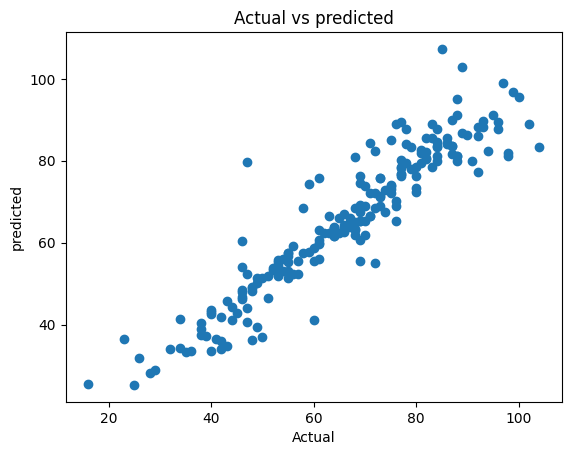

In [50]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('r2_score:', r2_score)


from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
mae= mean_absolute_error(Y_test4, np.squeeze(model6.predict(X_test4)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test4, np.squeeze(model6.predict(X_test4)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [51]:
prediction7 =np.squeeze(model6.predict([[80,2,2,129,prediction6]]))
print("Prediction: {}".format(prediction7))

y_prd=np.squeeze(np.squeeze(model6.predict(X_test4)) )
predic_dif=pd.DataFrame({'Actual':Y_test4,'predict':y_prd,"differences":Y_test4  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 282ms/step
Prediction: 59.56608581542969
7/7 [==============================] - 0s 10ms/step


,Actual,predict,differences
2056,100,95.605232,4.394768
2127,82,85.532654,-3.532654
1553,75,73.735703,1.264297
310,35,33.206905,1.793095
1442,73,71.513161,1.486839
1914,87,83.671555,3.328445
34,71,66.554474,4.445526
2227,90,86.316933,3.683067
2291,97,98.934380,-1.934380
1985,86,84.053848,1.946152


## dense and RNN

In [52]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model7=Sequential()
model7.add(Dense(128, input_dim=4, activation='relu'))
model7.add(Dense(64,activation='relu'))
model7.add(Dense(1,activation='linear'))
model7.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               640       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [53]:
model7.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
37/37 [==============================] - 1s 12ms/step - loss: 416.1053 - mae: 14.7174 - val_loss: 107.7986 - val_mae: 7.6721
Epoch 2/2000
37/37 [==============================] - 0s 4ms/step - loss: 108.0074 - mae: 7.3584 - val_loss: 92.9487 - val_mae: 7.0005
Epoch 3/2000
37/37 [==============================] - 0s 4ms/step - loss: 94.3991 - mae: 6.6646 - val_loss: 85.3448 - val_mae: 6.4306
Epoch 4/2000
37/37 [==============================] - 0s 5ms/step - loss: 92.1498 - mae: 6.5612 - val_loss: 85.4916 - val_mae: 6.2949
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 92.0019 - mae: 6.5422 - val_loss: 78.4627 - val_mae: 6.1995
Epoch 6/2000
37/37 [==============================] - 0s 4ms/step - loss: 86.3361 - mae: 6.2944 - val_loss: 75.5124 - val_mae: 5.9938
Epoch 7/2000
37/37 [==============================] - 0s 4ms/step - loss: 85.4812 - mae: 6.2673 - val_loss: 76.0363 - val_mae: 6.0279
Epoch 8/2000
37/37 [==============================] - 0s 

Epoch 62/2000
37/37 [==============================] - 0s 4ms/step - loss: 60.6600 - mae: 5.3164 - val_loss: 55.4565 - val_mae: 5.0136
Epoch 63/2000
37/37 [==============================] - 0s 4ms/step - loss: 59.0991 - mae: 5.3251 - val_loss: 55.1027 - val_mae: 4.8837
Epoch 64/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.9845 - mae: 5.0708 - val_loss: 58.1260 - val_mae: 5.1724
Epoch 65/2000
37/37 [==============================] - 0s 4ms/step - loss: 60.2846 - mae: 5.4191 - val_loss: 54.5139 - val_mae: 4.8722
Epoch 66/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.7584 - mae: 5.0957 - val_loss: 55.8756 - val_mae: 4.9153
Epoch 67/2000
37/37 [==============================] - 0s 4ms/step - loss: 56.3917 - mae: 5.0576 - val_loss: 57.0650 - val_mae: 5.2120
Epoch 68/2000
37/37 [==============================] - 0s 4ms/step - loss: 57.6753 - mae: 5.1630 - val_loss: 54.8498 - val_mae: 4.9124
Epoch 69/2000
37/37 [==============================] - 

37/37 [==============================] - 0s 4ms/step - loss: 52.9766 - mae: 4.9040 - val_loss: 55.9030 - val_mae: 4.9955
Epoch 123/2000
37/37 [==============================] - 0s 4ms/step - loss: 55.2824 - mae: 5.0837 - val_loss: 56.2382 - val_mae: 5.0134
Epoch 124/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.1811 - mae: 4.9712 - val_loss: 54.0543 - val_mae: 4.8511
Epoch 125/2000
37/37 [==============================] - 0s 4ms/step - loss: 56.4211 - mae: 5.1457 - val_loss: 58.3895 - val_mae: 5.4245
Epoch 126/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.2172 - mae: 4.8600 - val_loss: 53.3538 - val_mae: 4.8368
Epoch 127/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.7823 - mae: 4.9029 - val_loss: 54.3540 - val_mae: 4.8528
Epoch 128/2000
37/37 [==============================] - 0s 4ms/step - loss: 54.4495 - mae: 5.0105 - val_loss: 59.6647 - val_mae: 5.4347
Epoch 129/2000
37/37 [==============================] - 0s 4ms/

37/37 [==============================] - 0s 4ms/step - loss: 52.0081 - mae: 4.8553 - val_loss: 52.5785 - val_mae: 4.8372
Epoch 183/2000
37/37 [==============================] - 0s 4ms/step - loss: 53.6256 - mae: 4.9543 - val_loss: 53.8229 - val_mae: 4.8974
Epoch 184/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.7041 - mae: 4.8689 - val_loss: 58.0125 - val_mae: 5.3353
Epoch 185/2000
37/37 [==============================] - 0s 4ms/step - loss: 57.3261 - mae: 5.2735 - val_loss: 53.0572 - val_mae: 4.8376
Epoch 186/2000
37/37 [==============================] - 0s 4ms/step - loss: 51.6360 - mae: 4.8871 - val_loss: 53.9927 - val_mae: 4.8674
Epoch 187/2000
37/37 [==============================] - 0s 4ms/step - loss: 53.5988 - mae: 5.0044 - val_loss: 62.0488 - val_mae: 5.7200
Epoch 188/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.8899 - mae: 4.9408 - val_loss: 56.7408 - val_mae: 5.3535
Epoch 189/2000
37/37 [==============================] - 0s 4ms/

37/37 [==============================] - 0s 3ms/step - loss: 51.8312 - mae: 4.8725 - val_loss: 54.1365 - val_mae: 4.9282
Epoch 243/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.5012 - mae: 4.8293 - val_loss: 57.6132 - val_mae: 5.1203
Epoch 244/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.2664 - mae: 4.9448 - val_loss: 54.6488 - val_mae: 4.9403
Epoch 245/2000
37/37 [==============================] - 0s 4ms/step - loss: 52.9863 - mae: 4.9717 - val_loss: 53.3357 - val_mae: 4.9655
Epoch 246/2000
37/37 [==============================] - 0s 3ms/step - loss: 50.8115 - mae: 4.7725 - val_loss: 53.0326 - val_mae: 4.8228
Epoch 247/2000
37/37 [==============================] - 0s 3ms/step - loss: 52.5172 - mae: 4.9065 - val_loss: 54.2460 - val_mae: 4.8940
Epoch 248/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.6260 - mae: 4.9219 - val_loss: 56.4275 - val_mae: 5.1910
Epoch 249/2000
37/37 [==============================] - 0s 3ms/

37/37 [==============================] - 0s 3ms/step - loss: 51.8169 - mae: 4.9711 - val_loss: 52.9896 - val_mae: 4.8277
Epoch 303/2000
37/37 [==============================] - 0s 3ms/step - loss: 49.7948 - mae: 4.7404 - val_loss: 54.8992 - val_mae: 4.9710
Epoch 304/2000
37/37 [==============================] - 0s 3ms/step - loss: 48.4226 - mae: 4.7067 - val_loss: 54.4141 - val_mae: 5.0276
Epoch 305/2000
37/37 [==============================] - 0s 3ms/step - loss: 49.3060 - mae: 4.7173 - val_loss: 55.2105 - val_mae: 5.1774
Epoch 306/2000
37/37 [==============================] - 0s 3ms/step - loss: 50.1126 - mae: 4.8145 - val_loss: 54.3725 - val_mae: 4.9161
Epoch 307/2000
37/37 [==============================] - 0s 3ms/step - loss: 48.3956 - mae: 4.6522 - val_loss: 52.9007 - val_mae: 4.8312
Epoch 308/2000
37/37 [==============================] - 0s 3ms/step - loss: 51.2980 - mae: 4.9049 - val_loss: 54.2265 - val_mae: 5.0574
Epoch 309/2000
37/37 [==============================] - 0s 2ms/

37/37 [==============================] - 0s 4ms/step - loss: 47.2414 - mae: 4.6680 - val_loss: 57.9533 - val_mae: 5.1762
Epoch 363/2000
37/37 [==============================] - 0s 4ms/step - loss: 47.7810 - mae: 4.7581 - val_loss: 54.2409 - val_mae: 4.9987
Epoch 364/2000
37/37 [==============================] - 0s 4ms/step - loss: 46.8388 - mae: 4.6357 - val_loss: 55.5649 - val_mae: 4.9816
Epoch 365/2000
37/37 [==============================] - 0s 4ms/step - loss: 47.1217 - mae: 4.6686 - val_loss: 51.6995 - val_mae: 4.7511
Epoch 366/2000
37/37 [==============================] - 0s 3ms/step - loss: 49.3265 - mae: 4.8557 - val_loss: 55.0497 - val_mae: 4.9754
Epoch 367/2000
37/37 [==============================] - 0s 4ms/step - loss: 47.4612 - mae: 4.6516 - val_loss: 53.1642 - val_mae: 4.8007
Epoch 368/2000
37/37 [==============================] - 0s 3ms/step - loss: 46.1168 - mae: 4.6041 - val_loss: 53.7308 - val_mae: 4.9572
Epoch 369/2000
37/37 [==============================] - 0s 4ms/

37/37 [==============================] - 0s 6ms/step - loss: 45.0444 - mae: 4.5319 - val_loss: 55.6610 - val_mae: 4.9952
Epoch 423/2000
37/37 [==============================] - 0s 7ms/step - loss: 45.9832 - mae: 4.5548 - val_loss: 55.2591 - val_mae: 4.8946
Epoch 424/2000
37/37 [==============================] - 0s 8ms/step - loss: 45.2368 - mae: 4.5671 - val_loss: 53.3890 - val_mae: 4.8396
Epoch 425/2000
37/37 [==============================] - 0s 6ms/step - loss: 45.5506 - mae: 4.5806 - val_loss: 53.4032 - val_mae: 4.8106
Epoch 426/2000
37/37 [==============================] - 0s 8ms/step - loss: 45.7215 - mae: 4.6176 - val_loss: 57.8805 - val_mae: 5.1905
Epoch 427/2000
37/37 [==============================] - 0s 8ms/step - loss: 45.4818 - mae: 4.6633 - val_loss: 54.6901 - val_mae: 4.9378
Epoch 428/2000
37/37 [==============================] - 0s 9ms/step - loss: 44.9342 - mae: 4.5656 - val_loss: 55.9357 - val_mae: 5.0513
Epoch 429/2000
37/37 [==============================] - 0s 7ms/

37/37 [==============================] - 0s 6ms/step - loss: 45.3312 - mae: 4.5741 - val_loss: 57.6141 - val_mae: 5.2348
Epoch 483/2000
37/37 [==============================] - 0s 6ms/step - loss: 43.8895 - mae: 4.5147 - val_loss: 53.6063 - val_mae: 4.8744
Epoch 484/2000
37/37 [==============================] - 0s 6ms/step - loss: 45.1754 - mae: 4.5579 - val_loss: 54.2028 - val_mae: 4.9486
Epoch 485/2000
37/37 [==============================] - 0s 6ms/step - loss: 46.7874 - mae: 4.7238 - val_loss: 67.0477 - val_mae: 6.0753
Epoch 486/2000
37/37 [==============================] - 0s 8ms/step - loss: 47.6673 - mae: 4.8070 - val_loss: 54.4419 - val_mae: 4.9430
Epoch 487/2000
37/37 [==============================] - 0s 6ms/step - loss: 45.3348 - mae: 4.5820 - val_loss: 54.9080 - val_mae: 4.9686
Epoch 488/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.4413 - mae: 4.4574 - val_loss: 53.6161 - val_mae: 4.8698
Epoch 489/2000
37/37 [==============================] - 0s 8ms/

37/37 [==============================] - 0s 7ms/step - loss: 42.4070 - mae: 4.4506 - val_loss: 56.8839 - val_mae: 4.9601
Epoch 543/2000
37/37 [==============================] - 0s 5ms/step - loss: 43.1179 - mae: 4.4292 - val_loss: 54.8701 - val_mae: 4.9431
Epoch 544/2000
37/37 [==============================] - 0s 7ms/step - loss: 42.3197 - mae: 4.4247 - val_loss: 53.1633 - val_mae: 4.8716
Epoch 545/2000
37/37 [==============================] - 0s 7ms/step - loss: 42.7418 - mae: 4.4223 - val_loss: 52.4888 - val_mae: 4.7694
Epoch 546/2000
37/37 [==============================] - 0s 6ms/step - loss: 42.6274 - mae: 4.3492 - val_loss: 53.0850 - val_mae: 4.7894
Epoch 547/2000
37/37 [==============================] - 0s 7ms/step - loss: 41.9934 - mae: 4.4112 - val_loss: 58.4330 - val_mae: 5.1266
Epoch 548/2000
37/37 [==============================] - 0s 6ms/step - loss: 43.7595 - mae: 4.5259 - val_loss: 51.1539 - val_mae: 4.6780
Epoch 549/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 6ms/step - loss: 43.2983 - mae: 4.4623 - val_loss: 52.6797 - val_mae: 4.8040
Epoch 603/2000
37/37 [==============================] - 0s 7ms/step - loss: 40.9972 - mae: 4.3105 - val_loss: 53.2187 - val_mae: 4.8789
Epoch 604/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.1416 - mae: 4.2683 - val_loss: 53.2404 - val_mae: 4.7304
Epoch 605/2000
37/37 [==============================] - 0s 7ms/step - loss: 42.3590 - mae: 4.4235 - val_loss: 53.0298 - val_mae: 4.7605
Epoch 606/2000
37/37 [==============================] - 0s 7ms/step - loss: 41.0562 - mae: 4.3739 - val_loss: 55.3389 - val_mae: 5.0736
Epoch 607/2000
37/37 [==============================] - 0s 7ms/step - loss: 43.3398 - mae: 4.4625 - val_loss: 56.0278 - val_mae: 4.8717
Epoch 608/2000
37/37 [==============================] - 0s 6ms/step - loss: 41.8364 - mae: 4.4156 - val_loss: 55.6253 - val_mae: 4.9662
Epoch 609/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 7ms/step - loss: 41.4901 - mae: 4.3758 - val_loss: 55.0312 - val_mae: 4.8332
Epoch 663/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.4149 - mae: 4.2968 - val_loss: 53.4930 - val_mae: 4.7410
Epoch 664/2000
37/37 [==============================] - 0s 7ms/step - loss: 39.9128 - mae: 4.2844 - val_loss: 52.8547 - val_mae: 4.6689
Epoch 665/2000
37/37 [==============================] - 0s 6ms/step - loss: 40.1312 - mae: 4.2367 - val_loss: 53.9322 - val_mae: 4.6816
Epoch 666/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.4326 - mae: 4.2482 - val_loss: 52.4861 - val_mae: 4.6485
Epoch 667/2000
37/37 [==============================] - 0s 8ms/step - loss: 40.1571 - mae: 4.2924 - val_loss: 52.3358 - val_mae: 4.6990
Epoch 668/2000
37/37 [==============================] - 0s 8ms/step - loss: 40.5160 - mae: 4.3588 - val_loss: 62.1200 - val_mae: 5.5048
Epoch 669/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 7ms/step - loss: 41.3714 - mae: 4.3750 - val_loss: 63.2571 - val_mae: 5.4316
Epoch 723/2000
37/37 [==============================] - 0s 8ms/step - loss: 42.1473 - mae: 4.5591 - val_loss: 53.2694 - val_mae: 4.6641
Epoch 724/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.9428 - mae: 4.1087 - val_loss: 55.6617 - val_mae: 4.7995
Epoch 725/2000
37/37 [==============================] - 0s 6ms/step - loss: 39.9082 - mae: 4.2657 - val_loss: 54.3489 - val_mae: 4.7285
Epoch 726/2000
37/37 [==============================] - 0s 8ms/step - loss: 38.3572 - mae: 4.1799 - val_loss: 53.6131 - val_mae: 4.7387
Epoch 727/2000
37/37 [==============================] - 0s 7ms/step - loss: 39.0774 - mae: 4.1837 - val_loss: 52.7063 - val_mae: 4.6468
Epoch 728/2000
37/37 [==============================] - 0s 8ms/step - loss: 41.6058 - mae: 4.3658 - val_loss: 60.0213 - val_mae: 5.1719
Epoch 729/2000
37/37 [==============================] - 0s 6ms/

37/37 [==============================] - 0s 6ms/step - loss: 38.8286 - mae: 4.2077 - val_loss: 56.3934 - val_mae: 4.9234
Epoch 783/2000
37/37 [==============================] - 0s 8ms/step - loss: 38.1300 - mae: 4.1223 - val_loss: 54.3869 - val_mae: 4.7459
Epoch 784/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.2509 - mae: 4.1060 - val_loss: 56.1161 - val_mae: 4.8821
Epoch 785/2000
37/37 [==============================] - 0s 6ms/step - loss: 38.2013 - mae: 4.2455 - val_loss: 59.3953 - val_mae: 5.1764
Epoch 786/2000
37/37 [==============================] - 0s 7ms/step - loss: 37.3820 - mae: 4.1413 - val_loss: 57.1477 - val_mae: 4.8016
Epoch 787/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.7830 - mae: 4.0904 - val_loss: 56.4430 - val_mae: 4.6907
Epoch 788/2000
37/37 [==============================] - 0s 6ms/step - loss: 36.9215 - mae: 4.0725 - val_loss: 58.3226 - val_mae: 4.9611
Epoch 789/2000
37/37 [==============================] - 0s 7ms/

Epoch 1206/2000
37/37 [==============================] - 0s 7ms/step - loss: 29.1085 - mae: 3.6864 - val_loss: 60.4891 - val_mae: 4.6623
Epoch 1207/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.3553 - mae: 3.6724 - val_loss: 59.3208 - val_mae: 4.6542
Epoch 1208/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.2526 - mae: 3.7240 - val_loss: 56.6494 - val_mae: 4.5559
Epoch 1209/2000
37/37 [==============================] - 0s 8ms/step - loss: 30.3051 - mae: 3.7569 - val_loss: 61.0751 - val_mae: 4.7035
Epoch 1210/2000
37/37 [==============================] - 0s 10ms/step - loss: 28.9345 - mae: 3.6826 - val_loss: 61.4781 - val_mae: 4.7165
Epoch 1211/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.2356 - mae: 3.6344 - val_loss: 58.1177 - val_mae: 4.6437
Epoch 1212/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.9131 - mae: 3.6582 - val_loss: 63.6231 - val_mae: 4.7099
Epoch 1213/2000
37/37 [=================

Epoch 1266/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.7690 - mae: 3.5587 - val_loss: 62.3522 - val_mae: 4.7575
Epoch 1267/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.6133 - mae: 3.6624 - val_loss: 73.5754 - val_mae: 5.7642
Epoch 1268/2000
37/37 [==============================] - 0s 8ms/step - loss: 28.8096 - mae: 3.7105 - val_loss: 62.7766 - val_mae: 4.7065
Epoch 1269/2000
37/37 [==============================] - 0s 5ms/step - loss: 27.5682 - mae: 3.5758 - val_loss: 61.7164 - val_mae: 4.5828
Epoch 1270/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.0742 - mae: 3.5350 - val_loss: 61.5315 - val_mae: 4.6367
Epoch 1271/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.1561 - mae: 3.6313 - val_loss: 66.2270 - val_mae: 4.9495
Epoch 1272/2000
37/37 [==============================] - 0s 7ms/step - loss: 29.2574 - mae: 3.7134 - val_loss: 61.8277 - val_mae: 4.6797
Epoch 1273/2000
37/37 [==================

Epoch 1326/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.2477 - mae: 3.7121 - val_loss: 62.6814 - val_mae: 4.7372
Epoch 1327/2000
37/37 [==============================] - 0s 8ms/step - loss: 27.1749 - mae: 3.5495 - val_loss: 65.0930 - val_mae: 5.0680
Epoch 1328/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.5237 - mae: 3.6199 - val_loss: 62.6607 - val_mae: 4.7166
Epoch 1329/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.1290 - mae: 3.5814 - val_loss: 62.7907 - val_mae: 4.8070
Epoch 1330/2000
37/37 [==============================] - 0s 7ms/step - loss: 29.2221 - mae: 3.8058 - val_loss: 64.4018 - val_mae: 4.6818
Epoch 1331/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.2365 - mae: 3.6787 - val_loss: 65.4152 - val_mae: 4.9231
Epoch 1332/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.9005 - mae: 3.7060 - val_loss: 67.2347 - val_mae: 5.0402
Epoch 1333/2000
37/37 [==================

Epoch 1386/2000
37/37 [==============================] - 0s 8ms/step - loss: 29.9842 - mae: 3.8001 - val_loss: 65.2870 - val_mae: 4.8609
Epoch 1387/2000
37/37 [==============================] - 0s 5ms/step - loss: 26.4289 - mae: 3.5595 - val_loss: 62.0515 - val_mae: 4.7198
Epoch 1388/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.1985 - mae: 3.5863 - val_loss: 64.8790 - val_mae: 4.9962
Epoch 1389/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.3006 - mae: 3.8048 - val_loss: 60.1762 - val_mae: 4.7074
Epoch 1390/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.9422 - mae: 3.7852 - val_loss: 61.2325 - val_mae: 4.6869
Epoch 1391/2000
37/37 [==============================] - 0s 8ms/step - loss: 28.2832 - mae: 3.6705 - val_loss: 64.2506 - val_mae: 4.6541
Epoch 1392/2000
37/37 [==============================] - 0s 7ms/step - loss: 28.3778 - mae: 3.6607 - val_loss: 64.6139 - val_mae: 4.7909
Epoch 1393/2000
37/37 [==================

Epoch 1446/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.6951 - mae: 3.5062 - val_loss: 64.3065 - val_mae: 4.7148
Epoch 1447/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.1754 - mae: 3.5149 - val_loss: 64.8600 - val_mae: 4.8585
Epoch 1448/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.9535 - mae: 3.5276 - val_loss: 66.9128 - val_mae: 4.9378
Epoch 1449/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.7757 - mae: 3.6538 - val_loss: 65.0834 - val_mae: 5.1150
Epoch 1450/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.7968 - mae: 3.6141 - val_loss: 68.6222 - val_mae: 5.2094
Epoch 1451/2000
37/37 [==============================] - 0s 6ms/step - loss: 27.1721 - mae: 3.6197 - val_loss: 61.7853 - val_mae: 4.6590
Epoch 1452/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.9944 - mae: 3.4986 - val_loss: 65.3943 - val_mae: 4.7388
Epoch 1453/2000
37/37 [==================

Epoch 1506/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.0019 - mae: 3.3897 - val_loss: 64.5448 - val_mae: 4.7902
Epoch 1507/2000
37/37 [==============================] - 0s 7ms/step - loss: 27.5616 - mae: 3.6830 - val_loss: 70.5551 - val_mae: 5.2496
Epoch 1508/2000
37/37 [==============================] - 0s 6ms/step - loss: 29.8264 - mae: 3.8191 - val_loss: 66.7298 - val_mae: 4.9947
Epoch 1509/2000
37/37 [==============================] - 0s 6ms/step - loss: 28.2104 - mae: 3.6636 - val_loss: 64.4986 - val_mae: 4.9292
Epoch 1510/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.7820 - mae: 3.5193 - val_loss: 68.4747 - val_mae: 5.0603
Epoch 1511/2000
37/37 [==============================] - 0s 7ms/step - loss: 26.1016 - mae: 3.5260 - val_loss: 64.7638 - val_mae: 4.9608
Epoch 1512/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.6076 - mae: 3.5008 - val_loss: 66.4655 - val_mae: 4.7492
Epoch 1513/2000
37/37 [==================

Epoch 1566/2000
37/37 [==============================] - 0s 6ms/step - loss: 26.7887 - mae: 3.5837 - val_loss: 63.7000 - val_mae: 4.7391
Epoch 1567/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.4964 - mae: 3.4804 - val_loss: 68.5981 - val_mae: 5.1334
Epoch 1568/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.1036 - mae: 3.4633 - val_loss: 66.6174 - val_mae: 4.8254
Epoch 1569/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.6668 - mae: 3.4499 - val_loss: 65.1580 - val_mae: 4.7750
Epoch 1570/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.8608 - mae: 3.4480 - val_loss: 63.7926 - val_mae: 4.8316
Epoch 1571/2000
37/37 [==============================] - 0s 8ms/step - loss: 26.2485 - mae: 3.5281 - val_loss: 66.3473 - val_mae: 4.8642
Epoch 1572/2000
37/37 [==============================] - 0s 8ms/step - loss: 25.2581 - mae: 3.4772 - val_loss: 66.6802 - val_mae: 4.8275
Epoch 1573/2000
37/37 [==================

Epoch 1626/2000
37/37 [==============================] - 0s 8ms/step - loss: 25.0346 - mae: 3.4561 - val_loss: 65.1786 - val_mae: 4.8018
Epoch 1627/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.2175 - mae: 3.4522 - val_loss: 66.9908 - val_mae: 4.8991
Epoch 1628/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.9754 - mae: 3.5068 - val_loss: 67.0718 - val_mae: 4.7693
Epoch 1629/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.3226 - mae: 3.4012 - val_loss: 71.4842 - val_mae: 4.8109
Epoch 1630/2000
37/37 [==============================] - 0s 8ms/step - loss: 24.8113 - mae: 3.4158 - val_loss: 67.1072 - val_mae: 4.8072
Epoch 1631/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.9774 - mae: 3.4416 - val_loss: 68.1452 - val_mae: 4.8696
Epoch 1632/2000
37/37 [==============================] - 0s 8ms/step - loss: 27.0680 - mae: 3.6550 - val_loss: 72.4706 - val_mae: 4.9647
Epoch 1633/2000
37/37 [==================

Epoch 1686/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.4146 - mae: 3.3997 - val_loss: 69.8819 - val_mae: 4.9246
Epoch 1687/2000
37/37 [==============================] - 0s 8ms/step - loss: 25.1991 - mae: 3.4629 - val_loss: 68.6327 - val_mae: 4.8260
Epoch 1688/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.7338 - mae: 3.4528 - val_loss: 68.0273 - val_mae: 4.8620
Epoch 1689/2000
37/37 [==============================] - 0s 6ms/step - loss: 30.0868 - mae: 3.8561 - val_loss: 71.6574 - val_mae: 5.0097
Epoch 1690/2000
37/37 [==============================] - 0s 8ms/step - loss: 24.7299 - mae: 3.4518 - val_loss: 70.1320 - val_mae: 4.9820
Epoch 1691/2000
37/37 [==============================] - 0s 7ms/step - loss: 25.4956 - mae: 3.4997 - val_loss: 69.3641 - val_mae: 4.9349
Epoch 1692/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.8292 - mae: 3.4905 - val_loss: 68.1413 - val_mae: 4.8876
Epoch 1693/2000
37/37 [==================

Epoch 1746/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.4087 - mae: 3.4376 - val_loss: 71.0647 - val_mae: 4.9730
Epoch 1747/2000
37/37 [==============================] - 0s 6ms/step - loss: 22.7335 - mae: 3.2992 - val_loss: 69.0886 - val_mae: 4.9613
Epoch 1748/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.9222 - mae: 3.4091 - val_loss: 68.2035 - val_mae: 4.8877
Epoch 1749/2000
37/37 [==============================] - 0s 8ms/step - loss: 24.7769 - mae: 3.4632 - val_loss: 67.3476 - val_mae: 4.8707
Epoch 1750/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.3276 - mae: 3.3632 - val_loss: 70.1011 - val_mae: 4.8157
Epoch 1751/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.1029 - mae: 3.5032 - val_loss: 70.9435 - val_mae: 4.9037
Epoch 1752/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.9367 - mae: 3.4917 - val_loss: 70.7437 - val_mae: 4.8563
Epoch 1753/2000
37/37 [==================

Epoch 1806/2000
37/37 [==============================] - 0s 6ms/step - loss: 25.1482 - mae: 3.5566 - val_loss: 66.9415 - val_mae: 4.8976
Epoch 1807/2000
37/37 [==============================] - 0s 6ms/step - loss: 23.7834 - mae: 3.3667 - val_loss: 69.1443 - val_mae: 4.8597
Epoch 1808/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.2268 - mae: 3.3273 - val_loss: 70.6606 - val_mae: 4.9789
Epoch 1809/2000
37/37 [==============================] - 0s 6ms/step - loss: 23.3386 - mae: 3.3285 - val_loss: 70.5087 - val_mae: 4.8006
Epoch 1810/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.2873 - mae: 3.3995 - val_loss: 70.6799 - val_mae: 4.9306
Epoch 1811/2000
37/37 [==============================] - 0s 8ms/step - loss: 23.2608 - mae: 3.3863 - val_loss: 67.8078 - val_mae: 4.8587
Epoch 1812/2000
37/37 [==============================] - 0s 6ms/step - loss: 23.6426 - mae: 3.4118 - val_loss: 70.9462 - val_mae: 4.9533
Epoch 1813/2000
37/37 [==================

Epoch 1866/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.5529 - mae: 3.3113 - val_loss: 68.3508 - val_mae: 4.8322
Epoch 1867/2000
37/37 [==============================] - 0s 6ms/step - loss: 22.8170 - mae: 3.3006 - val_loss: 71.0543 - val_mae: 5.1501
Epoch 1868/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.5904 - mae: 3.3173 - val_loss: 70.5550 - val_mae: 4.8697
Epoch 1869/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.1877 - mae: 3.4505 - val_loss: 66.4842 - val_mae: 5.0042
Epoch 1870/2000
37/37 [==============================] - 0s 7ms/step - loss: 24.0709 - mae: 3.4209 - val_loss: 67.5881 - val_mae: 4.9600
Epoch 1871/2000
37/37 [==============================] - 0s 6ms/step - loss: 22.9963 - mae: 3.3225 - val_loss: 72.5760 - val_mae: 5.2548
Epoch 1872/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.1873 - mae: 3.2247 - val_loss: 73.8561 - val_mae: 5.1580
Epoch 1873/2000
37/37 [==================

Epoch 1926/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.5692 - mae: 3.3851 - val_loss: 70.9743 - val_mae: 4.9642
Epoch 1927/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.5427 - mae: 3.2583 - val_loss: 70.8913 - val_mae: 4.9317
Epoch 1928/2000
37/37 [==============================] - 0s 8ms/step - loss: 23.3962 - mae: 3.3569 - val_loss: 73.0654 - val_mae: 5.0015
Epoch 1929/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.7754 - mae: 3.3167 - val_loss: 72.1673 - val_mae: 5.0513
Epoch 1930/2000
37/37 [==============================] - 0s 6ms/step - loss: 24.6469 - mae: 3.5118 - val_loss: 69.6197 - val_mae: 4.9475
Epoch 1931/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.1213 - mae: 3.3335 - val_loss: 74.6733 - val_mae: 4.9600
Epoch 1932/2000
37/37 [==============================] - 0s 6ms/step - loss: 22.8370 - mae: 3.3287 - val_loss: 71.3272 - val_mae: 4.8401
Epoch 1933/2000
37/37 [==================

Epoch 1986/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.3517 - mae: 3.3352 - val_loss: 68.7894 - val_mae: 4.8970
Epoch 1987/2000
37/37 [==============================] - 0s 6ms/step - loss: 22.0401 - mae: 3.2248 - val_loss: 74.7102 - val_mae: 5.2809
Epoch 1988/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.2714 - mae: 3.4126 - val_loss: 73.2696 - val_mae: 5.1878
Epoch 1989/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.6007 - mae: 3.3341 - val_loss: 71.7194 - val_mae: 4.9994
Epoch 1990/2000
37/37 [==============================] - 0s 7ms/step - loss: 22.9792 - mae: 3.3728 - val_loss: 73.7746 - val_mae: 5.1014
Epoch 1991/2000
37/37 [==============================] - 0s 7ms/step - loss: 21.9715 - mae: 3.2188 - val_loss: 71.4727 - val_mae: 5.0463
Epoch 1992/2000
37/37 [==============================] - 0s 7ms/step - loss: 23.4459 - mae: 3.3482 - val_loss: 76.3936 - val_mae: 5.1335
Epoch 1993/2000
37/37 [==================

In [54]:
prediction8 = np.squeeze(model7.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction8))

1/1 [==============================] - 0s 303ms/step
Prediction: 60.54332733154297


In [55]:
y_prd=np.squeeze(np.squeeze(model7.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 3ms/step
      Actual    predict  differences
898       57  58.487583    -1.487583
182       25  25.463923    -0.463923
565       44  43.481190     0.518810
457       39  39.411983    -0.411983
1852      83  85.946785    -2.946785
...      ...        ...          ...
1812      83  83.330589    -0.330589
913       71  66.120720     4.879280
1036      65  61.277836     3.722164
629       42  43.282185    -1.282185
61        41  60.817852   -19.817852

[714 rows x 3 columns]


In [56]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-33.680572509765625
-40.75506591796875
-24.09522247314453
25.082088470458984
31.747764587402344
25.219196319580078
-24.039398193359375
34.003089904785156
27.755874633789062
-26.6754150390625
31.916996002197266
40.63005542755127
-32.3052978515625
25.765621185302734
-24.71625518798828
lower bound: -23.583130183840787
upper bound: 23.45818735888671


In [57]:
A.drop(A[(A['differences'] >23)].index, inplace=True)
A.drop(A[(A['differences'] <-23)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X5=B.drop('Actual',axis=1)
Y5=B['Actual']
X_train5, X_test5, Y_train5, Y_test5 =train_test_split(X5,Y5, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
14                   2        4              2                          156   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual    predict  
1         70  51.773754  

In [58]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model8=Sequential()
model8.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train5.shape[1],1)))
model8.add(Dropout(0.2))
model8.add(LSTM(units=64, activation='relu', return_sequences=True))
model8.add(Dropout(0.3))
model8.add(LSTM(units=32, activation='relu', return_sequences=True))
model8.add(Dropout(0.4))
model8.add(LSTM(units=64, activation='relu'))
model8.add(Dropout(0.5))
model8.add(Dense(units=1))
model8.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model8.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 128)            66560     
                                                                 
 dropout_4 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 5, 64)             49408     
                                                                 
 dropout_5 (Dropout)         (None, 5, 64)             0         
                                                                 
 lstm_10 (LSTM)              (None, 5, 32)             12416     
                                                                 
 dropout_6 (Dropout)         (None, 5, 32)             0         
                                                                 
 lstm_11 (LSTM)              (None, 64)              

In [59]:
model8.fit(X_train5,Y_train5 ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
11/11 [==============================] - 22s 284ms/step - loss: 4332.3174 - mae: 63.0378 - val_loss: 1193.9105 - val_mae: 32.8725
Epoch 2/2000
11/11 [==============================] - 0s 34ms/step - loss: 1663.5571 - mae: 33.4269 - val_loss: 446.5839 - val_mae: 17.5902
Epoch 3/2000
11/11 [==============================] - 0s 35ms/step - loss: 1092.0864 - mae: 27.5140 - val_loss: 226.4063 - val_mae: 11.9035
Epoch 4/2000
11/11 [==============================] - 0s 33ms/step - loss: 793.2551 - mae: 22.4812 - val_loss: 108.7008 - val_mae: 6.9862
Epoch 5/2000
11/11 [==============================] - 0s 34ms/step - loss: 755.5205 - mae: 21.9451 - val_loss: 301.1709 - val_mae: 14.0563
Epoch 6/2000
11/11 [==============================] - 0s 31ms/step - loss: 501.3571 - mae: 18.1365 - val_loss: 277.4269 - val_mae: 13.9977
Epoch 7/2000
11/11 [==============================] - 0s 34ms/step - loss: 479.0958 - mae: 17.0498 - val_loss: 316.1951 - val_mae: 15.1379
Epoch 8/2000
11/11 [==

11/11 [==============================] - 0s 33ms/step - loss: 199.0501 - mae: 11.0409 - val_loss: 283.2779 - val_mae: 13.3463
Epoch 60/2000
11/11 [==============================] - 0s 29ms/step - loss: 215.9592 - mae: 11.2831 - val_loss: 230.4500 - val_mae: 11.7841
Epoch 61/2000
11/11 [==============================] - 0s 32ms/step - loss: 219.8048 - mae: 11.7960 - val_loss: 198.2673 - val_mae: 10.9929
Epoch 62/2000
11/11 [==============================] - 0s 32ms/step - loss: 183.9833 - mae: 10.5067 - val_loss: 171.0368 - val_mae: 10.0234
Epoch 63/2000
11/11 [==============================] - 0s 31ms/step - loss: 201.3174 - mae: 10.7393 - val_loss: 190.5469 - val_mae: 10.9960
Epoch 64/2000
11/11 [==============================] - 0s 33ms/step - loss: 216.8962 - mae: 11.5406 - val_loss: 153.4859 - val_mae: 9.8702
Epoch 65/2000
11/11 [==============================] - 0s 35ms/step - loss: 230.1293 - mae: 11.8056 - val_loss: 215.1532 - val_mae: 12.1510
Epoch 66/2000
11/11 [==============

11/11 [==============================] - 0s 38ms/step - loss: 241.1488 - mae: 12.0987 - val_loss: 180.5200 - val_mae: 10.6096
Epoch 118/2000
11/11 [==============================] - 0s 38ms/step - loss: 193.4937 - mae: 11.0446 - val_loss: 192.5864 - val_mae: 11.2231
Epoch 119/2000
11/11 [==============================] - 0s 40ms/step - loss: 200.2487 - mae: 11.1186 - val_loss: 113.0769 - val_mae: 8.1247
Epoch 120/2000
11/11 [==============================] - 0s 40ms/step - loss: 202.7916 - mae: 11.0331 - val_loss: 156.7472 - val_mae: 10.0183
Epoch 121/2000
11/11 [==============================] - 0s 38ms/step - loss: 178.6165 - mae: 10.3737 - val_loss: 163.5836 - val_mae: 10.1698
Epoch 122/2000
11/11 [==============================] - 0s 38ms/step - loss: 186.1389 - mae: 11.0024 - val_loss: 203.7996 - val_mae: 11.6937
Epoch 123/2000
11/11 [==============================] - 0s 42ms/step - loss: 198.8332 - mae: 10.9932 - val_loss: 103.6404 - val_mae: 7.5537
Epoch 124/2000
11/11 [========

11/11 [==============================] - 0s 34ms/step - loss: 173.3524 - mae: 10.4460 - val_loss: 175.4345 - val_mae: 10.7377
Epoch 176/2000
11/11 [==============================] - 0s 37ms/step - loss: 171.3271 - mae: 10.0032 - val_loss: 121.9832 - val_mae: 8.5645
Epoch 177/2000
11/11 [==============================] - 0s 36ms/step - loss: 186.7376 - mae: 10.7929 - val_loss: 91.2010 - val_mae: 7.0705
Epoch 178/2000
11/11 [==============================] - 0s 33ms/step - loss: 193.1941 - mae: 10.9118 - val_loss: 78.9733 - val_mae: 6.3711
Epoch 179/2000
11/11 [==============================] - 0s 34ms/step - loss: 174.5526 - mae: 10.3943 - val_loss: 94.5869 - val_mae: 7.1574
Epoch 180/2000
11/11 [==============================] - 0s 41ms/step - loss: 183.4688 - mae: 10.7601 - val_loss: 103.0390 - val_mae: 7.8283
Epoch 181/2000
11/11 [==============================] - 0s 34ms/step - loss: 194.6469 - mae: 11.0976 - val_loss: 149.0836 - val_mae: 9.9704
Epoch 182/2000
11/11 [===============

11/11 [==============================] - 0s 33ms/step - loss: 165.6464 - mae: 10.1280 - val_loss: 233.1266 - val_mae: 13.0004
Epoch 234/2000
11/11 [==============================] - 0s 38ms/step - loss: 177.8952 - mae: 10.3376 - val_loss: 104.5195 - val_mae: 7.4962
Epoch 235/2000
11/11 [==============================] - 0s 41ms/step - loss: 190.5003 - mae: 10.8215 - val_loss: 105.3815 - val_mae: 7.7066
Epoch 236/2000
11/11 [==============================] - 0s 33ms/step - loss: 170.9108 - mae: 9.9821 - val_loss: 127.8901 - val_mae: 9.0864
Epoch 237/2000
11/11 [==============================] - 0s 37ms/step - loss: 182.4991 - mae: 10.6063 - val_loss: 143.8523 - val_mae: 9.6328
Epoch 238/2000
11/11 [==============================] - 0s 33ms/step - loss: 150.5023 - mae: 9.3781 - val_loss: 90.4746 - val_mae: 6.9406
Epoch 239/2000
11/11 [==============================] - 0s 34ms/step - loss: 158.6136 - mae: 9.8238 - val_loss: 133.9306 - val_mae: 9.4140
Epoch 240/2000
11/11 [================

Epoch 292/2000
11/11 [==============================] - 0s 37ms/step - loss: 146.1709 - mae: 9.3151 - val_loss: 78.9602 - val_mae: 6.4988
Epoch 293/2000
11/11 [==============================] - 0s 32ms/step - loss: 164.8204 - mae: 9.9600 - val_loss: 98.5877 - val_mae: 7.7814
Epoch 294/2000
11/11 [==============================] - 0s 36ms/step - loss: 159.2323 - mae: 9.5656 - val_loss: 147.1228 - val_mae: 10.2743
Epoch 295/2000
11/11 [==============================] - 0s 37ms/step - loss: 140.5559 - mae: 9.0361 - val_loss: 72.0758 - val_mae: 6.2819
Epoch 296/2000
11/11 [==============================] - 0s 33ms/step - loss: 177.3707 - mae: 10.1203 - val_loss: 76.0019 - val_mae: 6.6838
Epoch 297/2000
11/11 [==============================] - 0s 33ms/step - loss: 157.9598 - mae: 9.7667 - val_loss: 96.7515 - val_mae: 7.9966
Epoch 298/2000
11/11 [==============================] - 0s 42ms/step - loss: 169.5055 - mae: 9.8002 - val_loss: 115.9887 - val_mae: 8.8253
Epoch 299/2000
11/11 [========

11/11 [==============================] - 0s 41ms/step - loss: 138.1632 - mae: 8.8945 - val_loss: 96.1768 - val_mae: 7.7669
Epoch 352/2000
11/11 [==============================] - 0s 46ms/step - loss: 165.7357 - mae: 9.8348 - val_loss: 58.9957 - val_mae: 5.4846
Epoch 353/2000
11/11 [==============================] - 0s 42ms/step - loss: 133.5543 - mae: 9.0643 - val_loss: 91.1950 - val_mae: 7.6369
Epoch 354/2000
11/11 [==============================] - 0s 38ms/step - loss: 183.9725 - mae: 10.5342 - val_loss: 104.1112 - val_mae: 8.3263
Epoch 355/2000
11/11 [==============================] - 0s 35ms/step - loss: 154.7348 - mae: 9.5000 - val_loss: 81.1654 - val_mae: 6.8144
Epoch 356/2000
11/11 [==============================] - 0s 38ms/step - loss: 166.4039 - mae: 9.7745 - val_loss: 119.9716 - val_mae: 8.8629
Epoch 357/2000
11/11 [==============================] - 0s 34ms/step - loss: 141.7347 - mae: 9.1195 - val_loss: 105.9966 - val_mae: 8.3334
Epoch 358/2000
11/11 [=======================

11/11 [==============================] - 0s 36ms/step - loss: 136.3286 - mae: 8.9665 - val_loss: 135.0025 - val_mae: 9.9506
Epoch 411/2000
11/11 [==============================] - 0s 30ms/step - loss: 153.4949 - mae: 9.6995 - val_loss: 159.6808 - val_mae: 10.7599
Epoch 412/2000
11/11 [==============================] - 0s 38ms/step - loss: 132.1663 - mae: 8.8206 - val_loss: 112.0261 - val_mae: 8.6660
Epoch 413/2000
11/11 [==============================] - 0s 33ms/step - loss: 135.5367 - mae: 8.8544 - val_loss: 77.2912 - val_mae: 6.9676
Epoch 414/2000
11/11 [==============================] - 0s 36ms/step - loss: 124.6858 - mae: 8.6880 - val_loss: 60.7557 - val_mae: 5.9570
Epoch 415/2000
11/11 [==============================] - 0s 35ms/step - loss: 150.8113 - mae: 9.6482 - val_loss: 102.2657 - val_mae: 8.1813
Epoch 416/2000
11/11 [==============================] - 0s 36ms/step - loss: 126.1021 - mae: 8.5855 - val_loss: 94.4510 - val_mae: 7.5544
Epoch 417/2000
11/11 [======================

11/11 [==============================] - 0s 36ms/step - loss: 140.5529 - mae: 9.4094 - val_loss: 97.9493 - val_mae: 7.8860
Epoch 470/2000
11/11 [==============================] - 0s 35ms/step - loss: 153.1053 - mae: 9.5273 - val_loss: 155.5201 - val_mae: 10.8101
Epoch 471/2000
11/11 [==============================] - 0s 31ms/step - loss: 138.3111 - mae: 9.0673 - val_loss: 138.8297 - val_mae: 10.0608
Epoch 472/2000
11/11 [==============================] - 0s 36ms/step - loss: 164.7065 - mae: 9.7725 - val_loss: 119.1116 - val_mae: 9.2283
Epoch 473/2000
11/11 [==============================] - 0s 36ms/step - loss: 140.1693 - mae: 9.2309 - val_loss: 59.8983 - val_mae: 5.5451
Epoch 474/2000
11/11 [==============================] - 0s 37ms/step - loss: 138.6101 - mae: 9.0734 - val_loss: 103.9762 - val_mae: 8.4584
Epoch 475/2000
11/11 [==============================] - 0s 36ms/step - loss: 147.6623 - mae: 9.4336 - val_loss: 73.9435 - val_mae: 6.5211
Epoch 476/2000
11/11 [=====================

11/11 [==============================] - 0s 33ms/step - loss: 144.6590 - mae: 9.1935 - val_loss: 82.7836 - val_mae: 7.0630
Epoch 529/2000
11/11 [==============================] - 0s 37ms/step - loss: 136.5051 - mae: 9.0589 - val_loss: 115.8750 - val_mae: 8.9113
Epoch 530/2000
11/11 [==============================] - 0s 35ms/step - loss: 133.3208 - mae: 8.9680 - val_loss: 117.7341 - val_mae: 9.3563
Epoch 531/2000
11/11 [==============================] - 0s 31ms/step - loss: 125.6207 - mae: 8.7764 - val_loss: 91.2085 - val_mae: 7.7471
Epoch 532/2000
11/11 [==============================] - 0s 32ms/step - loss: 139.7462 - mae: 9.0574 - val_loss: 125.9600 - val_mae: 9.6522
Epoch 533/2000
11/11 [==============================] - 0s 39ms/step - loss: 144.2732 - mae: 9.2137 - val_loss: 90.4267 - val_mae: 7.6853
Epoch 534/2000
11/11 [==============================] - 0s 37ms/step - loss: 158.5713 - mae: 9.5973 - val_loss: 70.4288 - val_mae: 6.5063
Epoch 535/2000
11/11 [========================

11/11 [==============================] - 0s 32ms/step - loss: 132.9751 - mae: 8.5689 - val_loss: 146.8561 - val_mae: 10.6177
Epoch 588/2000
11/11 [==============================] - 0s 36ms/step - loss: 143.1665 - mae: 9.2148 - val_loss: 67.5665 - val_mae: 6.3149
Epoch 589/2000
11/11 [==============================] - 0s 34ms/step - loss: 128.6028 - mae: 8.6737 - val_loss: 41.4880 - val_mae: 4.4484
Epoch 590/2000
11/11 [==============================] - 0s 33ms/step - loss: 139.2161 - mae: 9.1371 - val_loss: 78.2164 - val_mae: 7.1948
Epoch 591/2000
11/11 [==============================] - 0s 35ms/step - loss: 138.2760 - mae: 8.9761 - val_loss: 115.2179 - val_mae: 9.3319
Epoch 592/2000
11/11 [==============================] - 0s 38ms/step - loss: 148.1781 - mae: 9.6278 - val_loss: 96.4758 - val_mae: 8.2264
Epoch 593/2000
11/11 [==============================] - 0s 35ms/step - loss: 146.5765 - mae: 9.1494 - val_loss: 56.1515 - val_mae: 5.6746
Epoch 594/2000
11/11 [========================

11/11 [==============================] - 0s 37ms/step - loss: 108.9511 - mae: 7.9975 - val_loss: 78.0620 - val_mae: 7.1703
Epoch 647/2000
11/11 [==============================] - 0s 36ms/step - loss: 129.7938 - mae: 8.6622 - val_loss: 94.4338 - val_mae: 8.1293
Epoch 648/2000
11/11 [==============================] - 0s 39ms/step - loss: 139.0272 - mae: 8.9453 - val_loss: 153.8555 - val_mae: 10.9112
Epoch 649/2000
11/11 [==============================] - 0s 42ms/step - loss: 121.4633 - mae: 8.4943 - val_loss: 104.2357 - val_mae: 8.4901
Epoch 650/2000
11/11 [==============================] - 0s 36ms/step - loss: 145.5625 - mae: 9.3757 - val_loss: 51.4452 - val_mae: 5.2842
Epoch 651/2000
11/11 [==============================] - 0s 36ms/step - loss: 148.4965 - mae: 9.4651 - val_loss: 43.1889 - val_mae: 4.5697
Epoch 652/2000
11/11 [==============================] - 0s 35ms/step - loss: 157.8344 - mae: 9.6349 - val_loss: 109.2113 - val_mae: 8.8500
Epoch 653/2000
11/11 [=======================

11/11 [==============================] - 0s 29ms/step - loss: 124.2390 - mae: 8.4149 - val_loss: 96.7994 - val_mae: 8.1778
Epoch 706/2000
11/11 [==============================] - 0s 29ms/step - loss: 121.4148 - mae: 8.4019 - val_loss: 110.5316 - val_mae: 8.7715
Epoch 707/2000
11/11 [==============================] - 0s 27ms/step - loss: 122.4119 - mae: 8.3744 - val_loss: 75.2673 - val_mae: 6.9200
Epoch 708/2000
11/11 [==============================] - 0s 27ms/step - loss: 124.8757 - mae: 8.7546 - val_loss: 50.5702 - val_mae: 5.3879
Epoch 709/2000
11/11 [==============================] - 0s 35ms/step - loss: 121.7648 - mae: 8.5789 - val_loss: 98.6679 - val_mae: 8.5304
Epoch 710/2000
11/11 [==============================] - 0s 33ms/step - loss: 115.8045 - mae: 8.3711 - val_loss: 86.4469 - val_mae: 7.6254
Epoch 711/2000
11/11 [==============================] - 0s 30ms/step - loss: 107.9228 - mae: 7.9990 - val_loss: 97.3031 - val_mae: 8.2814
Epoch 712/2000
11/11 [==========================

11/11 [==============================] - 0s 22ms/step - loss: 110.4309 - mae: 8.3032 - val_loss: 68.8136 - val_mae: 6.7701
Epoch 765/2000
11/11 [==============================] - 0s 22ms/step - loss: 113.5696 - mae: 8.2501 - val_loss: 90.5222 - val_mae: 7.9517
Epoch 766/2000
11/11 [==============================] - 0s 21ms/step - loss: 119.5717 - mae: 8.3779 - val_loss: 64.3791 - val_mae: 6.3307
Epoch 767/2000
11/11 [==============================] - 0s 23ms/step - loss: 130.9697 - mae: 8.7541 - val_loss: 93.5800 - val_mae: 8.2600
Epoch 768/2000
11/11 [==============================] - 0s 22ms/step - loss: 130.9698 - mae: 8.7642 - val_loss: 72.1325 - val_mae: 6.7381
Epoch 769/2000
11/11 [==============================] - 0s 23ms/step - loss: 117.4081 - mae: 8.2809 - val_loss: 116.3785 - val_mae: 9.3654
Epoch 770/2000
11/11 [==============================] - 0s 22ms/step - loss: 140.7244 - mae: 9.0647 - val_loss: 98.5903 - val_mae: 8.3860
Epoch 771/2000
11/11 [==========================

11/11 [==============================] - 0s 23ms/step - loss: 128.5387 - mae: 8.6526 - val_loss: 87.0963 - val_mae: 7.8151
Epoch 824/2000
11/11 [==============================] - 0s 23ms/step - loss: 119.0343 - mae: 8.4375 - val_loss: 113.0511 - val_mae: 8.9883
Epoch 825/2000
11/11 [==============================] - 0s 22ms/step - loss: 104.1811 - mae: 8.2024 - val_loss: 85.8033 - val_mae: 7.6574
Epoch 826/2000
11/11 [==============================] - 0s 22ms/step - loss: 112.3356 - mae: 8.2655 - val_loss: 100.3022 - val_mae: 8.5507
Epoch 827/2000
11/11 [==============================] - 0s 22ms/step - loss: 124.4709 - mae: 8.4843 - val_loss: 103.7137 - val_mae: 8.7423
Epoch 828/2000
11/11 [==============================] - 0s 21ms/step - loss: 128.9187 - mae: 8.7791 - val_loss: 87.4641 - val_mae: 7.8489
Epoch 829/2000
11/11 [==============================] - 0s 22ms/step - loss: 107.3906 - mae: 8.1179 - val_loss: 80.5668 - val_mae: 7.4908
Epoch 830/2000
11/11 [========================

11/11 [==============================] - 0s 23ms/step - loss: 142.6203 - mae: 8.9773 - val_loss: 127.0822 - val_mae: 9.3959
Epoch 883/2000
11/11 [==============================] - 0s 21ms/step - loss: 125.3222 - mae: 8.4371 - val_loss: 89.9557 - val_mae: 7.7618
Epoch 884/2000
11/11 [==============================] - 0s 22ms/step - loss: 116.7502 - mae: 8.1530 - val_loss: 50.6144 - val_mae: 5.3446
Epoch 885/2000
11/11 [==============================] - 0s 22ms/step - loss: 117.2011 - mae: 8.4191 - val_loss: 69.3447 - val_mae: 6.8733
Epoch 886/2000
11/11 [==============================] - 0s 22ms/step - loss: 115.7808 - mae: 8.2367 - val_loss: 102.9715 - val_mae: 8.7787
Epoch 887/2000
11/11 [==============================] - 0s 22ms/step - loss: 110.0686 - mae: 8.0975 - val_loss: 73.7603 - val_mae: 6.8920
Epoch 888/2000
11/11 [==============================] - 0s 22ms/step - loss: 122.3800 - mae: 8.3595 - val_loss: 87.0941 - val_mae: 7.5589
Epoch 889/2000
11/11 [=========================

11/11 [==============================] - 0s 22ms/step - loss: 120.4405 - mae: 8.5769 - val_loss: 79.6929 - val_mae: 7.2181
Epoch 942/2000
11/11 [==============================] - 0s 22ms/step - loss: 106.3642 - mae: 8.0736 - val_loss: 49.5199 - val_mae: 5.2280
Epoch 943/2000
11/11 [==============================] - 0s 22ms/step - loss: 120.6833 - mae: 8.5860 - val_loss: 119.5940 - val_mae: 9.3844
Epoch 944/2000
11/11 [==============================] - 0s 22ms/step - loss: 111.5169 - mae: 8.1876 - val_loss: 69.7480 - val_mae: 6.6422
Epoch 945/2000
11/11 [==============================] - 0s 23ms/step - loss: 127.3373 - mae: 8.7291 - val_loss: 64.1991 - val_mae: 6.3900
Epoch 946/2000
11/11 [==============================] - 0s 21ms/step - loss: 130.9535 - mae: 8.8280 - val_loss: 78.9591 - val_mae: 7.3976
Epoch 947/2000
11/11 [==============================] - 0s 22ms/step - loss: 110.6630 - mae: 8.2057 - val_loss: 83.1243 - val_mae: 7.5585
Epoch 948/2000
11/11 [==========================

11/11 [==============================] - 0s 21ms/step - loss: 118.9092 - mae: 8.4596 - val_loss: 94.2824 - val_mae: 8.2374
Epoch 1001/2000
11/11 [==============================] - 0s 21ms/step - loss: 110.9314 - mae: 7.9466 - val_loss: 63.2482 - val_mae: 6.5736
Epoch 1002/2000
11/11 [==============================] - 0s 22ms/step - loss: 137.0589 - mae: 9.1041 - val_loss: 48.6156 - val_mae: 5.2613
Epoch 1003/2000
11/11 [==============================] - 0s 22ms/step - loss: 140.5073 - mae: 9.0945 - val_loss: 88.9641 - val_mae: 7.9018
Epoch 1004/2000
11/11 [==============================] - 0s 22ms/step - loss: 109.1078 - mae: 8.0745 - val_loss: 67.7111 - val_mae: 6.6430
Epoch 1005/2000
11/11 [==============================] - 0s 22ms/step - loss: 112.3547 - mae: 7.9797 - val_loss: 62.6038 - val_mae: 6.3080
Epoch 1006/2000
11/11 [==============================] - 0s 22ms/step - loss: 111.5367 - mae: 7.9944 - val_loss: 71.3679 - val_mae: 6.9934
Epoch 1007/2000
11/11 [====================

Epoch 1059/2000
11/11 [==============================] - 0s 22ms/step - loss: 120.3548 - mae: 8.5225 - val_loss: 91.8917 - val_mae: 8.0295
Epoch 1060/2000
11/11 [==============================] - 0s 22ms/step - loss: 110.2018 - mae: 8.1017 - val_loss: 62.9988 - val_mae: 6.3238
Epoch 1061/2000
11/11 [==============================] - 0s 22ms/step - loss: 115.3343 - mae: 8.1958 - val_loss: 80.5780 - val_mae: 7.2963
Epoch 1062/2000
11/11 [==============================] - 0s 26ms/step - loss: 107.2331 - mae: 8.0871 - val_loss: 88.0705 - val_mae: 7.8316
Epoch 1063/2000
11/11 [==============================] - 0s 22ms/step - loss: 113.1163 - mae: 8.1520 - val_loss: 50.4879 - val_mae: 5.4455
Epoch 1064/2000
11/11 [==============================] - 0s 22ms/step - loss: 111.2966 - mae: 8.3240 - val_loss: 146.9212 - val_mae: 10.6863
Epoch 1065/2000
11/11 [==============================] - 0s 21ms/step - loss: 114.8456 - mae: 8.2722 - val_loss: 78.3361 - val_mae: 7.1144
Epoch 1066/2000
11/11 [==

Epoch 1118/2000
11/11 [==============================] - 0s 22ms/step - loss: 108.9939 - mae: 8.3045 - val_loss: 89.4959 - val_mae: 8.0195
Epoch 1119/2000
11/11 [==============================] - 0s 22ms/step - loss: 111.4918 - mae: 8.0142 - val_loss: 65.1301 - val_mae: 6.2524
Epoch 1120/2000
11/11 [==============================] - 0s 22ms/step - loss: 124.2427 - mae: 8.4908 - val_loss: 78.7396 - val_mae: 7.3752
Epoch 1121/2000
11/11 [==============================] - 0s 22ms/step - loss: 121.6383 - mae: 8.6040 - val_loss: 123.4672 - val_mae: 9.7033
Epoch 1122/2000
11/11 [==============================] - 0s 22ms/step - loss: 97.8922 - mae: 7.4368 - val_loss: 90.4241 - val_mae: 7.8710
Epoch 1123/2000
11/11 [==============================] - 0s 22ms/step - loss: 133.9849 - mae: 8.4677 - val_loss: 71.1041 - val_mae: 6.8494
Epoch 1124/2000
11/11 [==============================] - 0s 22ms/step - loss: 113.3232 - mae: 8.2333 - val_loss: 90.5652 - val_mae: 8.0674
Epoch 1125/2000
11/11 [====

Epoch 1177/2000
11/11 [==============================] - 0s 22ms/step - loss: 118.3171 - mae: 8.3797 - val_loss: 149.3384 - val_mae: 10.7436
Epoch 1178/2000
11/11 [==============================] - 0s 22ms/step - loss: 117.6055 - mae: 8.2033 - val_loss: 76.4530 - val_mae: 7.1336
Epoch 1179/2000
11/11 [==============================] - 0s 21ms/step - loss: 111.4834 - mae: 8.0230 - val_loss: 79.3284 - val_mae: 7.2806
Epoch 1180/2000
11/11 [==============================] - 0s 21ms/step - loss: 111.3302 - mae: 7.9831 - val_loss: 68.1632 - val_mae: 6.7914
Epoch 1181/2000
11/11 [==============================] - 0s 22ms/step - loss: 121.5586 - mae: 8.4580 - val_loss: 108.6366 - val_mae: 9.0339
Epoch 1182/2000
11/11 [==============================] - 0s 21ms/step - loss: 107.5837 - mae: 8.1917 - val_loss: 73.9763 - val_mae: 6.8965
Epoch 1183/2000
11/11 [==============================] - 0s 21ms/step - loss: 90.4429 - mae: 7.2194 - val_loss: 62.3272 - val_mae: 6.2887
Epoch 1184/2000
11/11 [==

Epoch 1236/2000
11/11 [==============================] - 0s 24ms/step - loss: 113.7476 - mae: 8.0814 - val_loss: 74.4192 - val_mae: 7.1635
Epoch 1237/2000
11/11 [==============================] - 0s 25ms/step - loss: 106.8106 - mae: 7.9987 - val_loss: 113.6617 - val_mae: 9.3976
Epoch 1238/2000
11/11 [==============================] - 0s 25ms/step - loss: 112.3030 - mae: 8.1967 - val_loss: 54.4196 - val_mae: 5.6430
Epoch 1239/2000
11/11 [==============================] - 0s 26ms/step - loss: 102.9859 - mae: 7.8303 - val_loss: 107.6236 - val_mae: 8.7886
Epoch 1240/2000
11/11 [==============================] - 0s 26ms/step - loss: 106.7656 - mae: 8.1118 - val_loss: 58.2421 - val_mae: 5.8706
Epoch 1241/2000
11/11 [==============================] - 0s 23ms/step - loss: 113.3428 - mae: 8.2005 - val_loss: 95.5835 - val_mae: 8.0531
Epoch 1242/2000
11/11 [==============================] - 0s 23ms/step - loss: 109.3563 - mae: 7.9938 - val_loss: 93.2503 - val_mae: 8.3537
Epoch 1243/2000
11/11 [==

Epoch 1295/2000
11/11 [==============================] - 0s 22ms/step - loss: 114.4661 - mae: 7.9644 - val_loss: 61.3154 - val_mae: 6.1534
Epoch 1296/2000
11/11 [==============================] - 0s 23ms/step - loss: 107.6872 - mae: 8.1071 - val_loss: 81.6355 - val_mae: 7.6944
Epoch 1297/2000
11/11 [==============================] - 0s 21ms/step - loss: 114.6750 - mae: 8.1853 - val_loss: 107.9753 - val_mae: 8.9329
Epoch 1298/2000
11/11 [==============================] - 0s 22ms/step - loss: 107.5078 - mae: 7.7804 - val_loss: 91.4447 - val_mae: 7.8799
Epoch 1299/2000
11/11 [==============================] - 0s 22ms/step - loss: 110.9518 - mae: 8.1181 - val_loss: 69.6495 - val_mae: 6.9253
Epoch 1300/2000
11/11 [==============================] - 0s 21ms/step - loss: 114.8482 - mae: 8.0445 - val_loss: 58.6953 - val_mae: 6.1292
Epoch 1301/2000
11/11 [==============================] - 0s 23ms/step - loss: 112.3255 - mae: 8.1160 - val_loss: 73.5968 - val_mae: 6.6506
Epoch 1302/2000
11/11 [===

Epoch 1354/2000
11/11 [==============================] - 0s 21ms/step - loss: 126.6373 - mae: 8.7134 - val_loss: 84.9437 - val_mae: 7.6061
Epoch 1355/2000
11/11 [==============================] - 0s 22ms/step - loss: 119.9512 - mae: 8.2913 - val_loss: 92.0224 - val_mae: 7.8967
Epoch 1356/2000
11/11 [==============================] - 0s 21ms/step - loss: 96.8736 - mae: 7.4359 - val_loss: 75.4474 - val_mae: 6.7665
Epoch 1357/2000
11/11 [==============================] - 0s 21ms/step - loss: 98.3774 - mae: 7.5910 - val_loss: 71.1813 - val_mae: 6.5827
Epoch 1358/2000
11/11 [==============================] - 0s 22ms/step - loss: 134.6616 - mae: 8.1562 - val_loss: 108.2807 - val_mae: 8.8046
Epoch 1359/2000
11/11 [==============================] - 0s 23ms/step - loss: 102.8251 - mae: 7.8486 - val_loss: 97.2001 - val_mae: 8.2322
Epoch 1360/2000
11/11 [==============================] - 0s 21ms/step - loss: 115.6559 - mae: 8.1393 - val_loss: 62.6810 - val_mae: 6.3923
Epoch 1361/2000
11/11 [=====

Epoch 1413/2000
11/11 [==============================] - 0s 21ms/step - loss: 113.6245 - mae: 7.8700 - val_loss: 55.0828 - val_mae: 5.5140
Epoch 1414/2000
11/11 [==============================] - 0s 22ms/step - loss: 108.3342 - mae: 8.0104 - val_loss: 96.0708 - val_mae: 7.9822
Epoch 1415/2000
11/11 [==============================] - 0s 22ms/step - loss: 96.6123 - mae: 7.5716 - val_loss: 78.9472 - val_mae: 7.2153
Epoch 1416/2000
11/11 [==============================] - 0s 22ms/step - loss: 90.6960 - mae: 7.4873 - val_loss: 94.7711 - val_mae: 8.3733
Epoch 1417/2000
11/11 [==============================] - 0s 23ms/step - loss: 106.1234 - mae: 7.8450 - val_loss: 65.3662 - val_mae: 6.4678
Epoch 1418/2000
11/11 [==============================] - 0s 22ms/step - loss: 101.8666 - mae: 7.6842 - val_loss: 113.5802 - val_mae: 9.1670
Epoch 1419/2000
11/11 [==============================] - 0s 23ms/step - loss: 108.8281 - mae: 8.0722 - val_loss: 68.0880 - val_mae: 6.3914
Epoch 1420/2000
11/11 [=====

11/11 [==============================] - 0s 20ms/step - loss: 90.7078 - mae: 7.2600 - val_loss: 63.8575 - val_mae: 6.2093
Epoch 1473/2000
11/11 [==============================] - 0s 21ms/step - loss: 107.5417 - mae: 7.7653 - val_loss: 92.7278 - val_mae: 7.9201
Epoch 1474/2000
11/11 [==============================] - 0s 20ms/step - loss: 102.4648 - mae: 7.9010 - val_loss: 99.5169 - val_mae: 8.5771
Epoch 1475/2000
11/11 [==============================] - 0s 20ms/step - loss: 89.4250 - mae: 7.1881 - val_loss: 75.3073 - val_mae: 7.0668
Epoch 1476/2000
11/11 [==============================] - 0s 20ms/step - loss: 93.6527 - mae: 7.4182 - val_loss: 71.3115 - val_mae: 6.6905
Epoch 1477/2000
11/11 [==============================] - 0s 20ms/step - loss: 99.6006 - mae: 7.6344 - val_loss: 97.2544 - val_mae: 8.3894
Epoch 1478/2000
11/11 [==============================] - 0s 20ms/step - loss: 107.4831 - mae: 8.0156 - val_loss: 66.1005 - val_mae: 6.5597
Epoch 1479/2000
11/11 [========================

11/11 [==============================] - 0s 22ms/step - loss: 97.1382 - mae: 7.3876 - val_loss: 58.8902 - val_mae: 6.0097
Epoch 1532/2000
11/11 [==============================] - 0s 22ms/step - loss: 100.5039 - mae: 7.6079 - val_loss: 70.0105 - val_mae: 6.7776
Epoch 1533/2000
11/11 [==============================] - 0s 23ms/step - loss: 123.1392 - mae: 8.1653 - val_loss: 65.8146 - val_mae: 6.5944
Epoch 1534/2000
11/11 [==============================] - 0s 22ms/step - loss: 95.7220 - mae: 7.5999 - val_loss: 84.6679 - val_mae: 7.3660
Epoch 1535/2000
11/11 [==============================] - 0s 21ms/step - loss: 87.6623 - mae: 7.2142 - val_loss: 83.1945 - val_mae: 7.4424
Epoch 1536/2000
11/11 [==============================] - 0s 21ms/step - loss: 109.6751 - mae: 7.8065 - val_loss: 80.2293 - val_mae: 7.2578
Epoch 1537/2000
11/11 [==============================] - 0s 21ms/step - loss: 93.5543 - mae: 7.3358 - val_loss: 86.9085 - val_mae: 7.8431
Epoch 1538/2000
11/11 [========================

11/11 [==============================] - 0s 23ms/step - loss: 101.1423 - mae: 7.5605 - val_loss: 97.0388 - val_mae: 8.1548
Epoch 1591/2000
11/11 [==============================] - 0s 22ms/step - loss: 102.3169 - mae: 7.6064 - val_loss: 63.9979 - val_mae: 6.0410
Epoch 1592/2000
11/11 [==============================] - 0s 22ms/step - loss: 105.2394 - mae: 7.7399 - val_loss: 103.6461 - val_mae: 8.4893
Epoch 1593/2000
11/11 [==============================] - 0s 21ms/step - loss: 98.1247 - mae: 7.4734 - val_loss: 80.4370 - val_mae: 7.5449
Epoch 1594/2000
11/11 [==============================] - 0s 21ms/step - loss: 108.2400 - mae: 7.9296 - val_loss: 68.9223 - val_mae: 6.1740
Epoch 1595/2000
11/11 [==============================] - 0s 23ms/step - loss: 81.0458 - mae: 6.9586 - val_loss: 101.0771 - val_mae: 8.2597
Epoch 1596/2000
11/11 [==============================] - 0s 21ms/step - loss: 89.5676 - mae: 7.1941 - val_loss: 58.9578 - val_mae: 5.7380
Epoch 1597/2000
11/11 [=====================

11/11 [==============================] - 0s 24ms/step - loss: 113.8992 - mae: 8.2396 - val_loss: 62.9743 - val_mae: 6.6107
Epoch 1650/2000
11/11 [==============================] - 0s 22ms/step - loss: 92.6503 - mae: 7.3563 - val_loss: 68.4878 - val_mae: 6.5988
Epoch 1651/2000
11/11 [==============================] - 0s 21ms/step - loss: 95.9284 - mae: 7.5641 - val_loss: 75.2119 - val_mae: 7.0445
Epoch 1652/2000
11/11 [==============================] - 0s 22ms/step - loss: 86.8351 - mae: 7.2896 - val_loss: 81.3253 - val_mae: 7.4738
Epoch 1653/2000
11/11 [==============================] - 0s 21ms/step - loss: 95.7877 - mae: 7.5725 - val_loss: 62.1631 - val_mae: 5.9577
Epoch 1654/2000
11/11 [==============================] - 0s 22ms/step - loss: 94.4578 - mae: 7.6359 - val_loss: 117.5154 - val_mae: 9.5303
Epoch 1655/2000
11/11 [==============================] - 0s 22ms/step - loss: 99.1271 - mae: 7.5024 - val_loss: 67.3658 - val_mae: 6.3863
Epoch 1656/2000
11/11 [=========================

11/11 [==============================] - 0s 21ms/step - loss: 106.4816 - mae: 7.8164 - val_loss: 82.6793 - val_mae: 7.5853
Epoch 1709/2000
11/11 [==============================] - 0s 21ms/step - loss: 84.9765 - mae: 7.1835 - val_loss: 114.1928 - val_mae: 9.1619
Epoch 1710/2000
11/11 [==============================] - 0s 23ms/step - loss: 109.2651 - mae: 7.8188 - val_loss: 83.1924 - val_mae: 7.4173
Epoch 1711/2000
11/11 [==============================] - 0s 21ms/step - loss: 93.7934 - mae: 7.4750 - val_loss: 57.4102 - val_mae: 5.7448
Epoch 1712/2000
11/11 [==============================] - 0s 21ms/step - loss: 103.2362 - mae: 7.7826 - val_loss: 110.9662 - val_mae: 8.9536
Epoch 1713/2000
11/11 [==============================] - 0s 23ms/step - loss: 107.4980 - mae: 7.9248 - val_loss: 80.8629 - val_mae: 7.4022
Epoch 1714/2000
11/11 [==============================] - 0s 22ms/step - loss: 94.2021 - mae: 7.4463 - val_loss: 67.6091 - val_mae: 6.5320
Epoch 1715/2000
11/11 [=====================

11/11 [==============================] - 0s 22ms/step - loss: 96.4116 - mae: 7.4141 - val_loss: 102.7945 - val_mae: 8.7723
Epoch 1768/2000
11/11 [==============================] - 0s 23ms/step - loss: 105.7837 - mae: 7.8625 - val_loss: 70.5443 - val_mae: 6.6286
Epoch 1769/2000
11/11 [==============================] - 0s 22ms/step - loss: 94.3380 - mae: 7.5257 - val_loss: 65.9765 - val_mae: 6.3902
Epoch 1770/2000
11/11 [==============================] - 0s 22ms/step - loss: 81.8599 - mae: 6.8062 - val_loss: 62.6059 - val_mae: 6.2420
Epoch 1771/2000
11/11 [==============================] - 0s 24ms/step - loss: 80.4143 - mae: 6.8493 - val_loss: 71.9699 - val_mae: 6.5958
Epoch 1772/2000
11/11 [==============================] - 0s 22ms/step - loss: 112.4590 - mae: 8.0246 - val_loss: 91.0793 - val_mae: 7.8334
Epoch 1773/2000
11/11 [==============================] - 0s 22ms/step - loss: 101.9921 - mae: 7.4652 - val_loss: 68.5918 - val_mae: 6.8683
Epoch 1774/2000
11/11 [=======================

11/11 [==============================] - 0s 21ms/step - loss: 89.5830 - mae: 7.0705 - val_loss: 65.0672 - val_mae: 6.3522
Epoch 1827/2000
11/11 [==============================] - 0s 21ms/step - loss: 91.1871 - mae: 7.3602 - val_loss: 78.5383 - val_mae: 7.1677
Epoch 1828/2000
11/11 [==============================] - 0s 22ms/step - loss: 84.2795 - mae: 6.9901 - val_loss: 77.0538 - val_mae: 7.1157
Epoch 1829/2000
11/11 [==============================] - 0s 22ms/step - loss: 88.1249 - mae: 7.0840 - val_loss: 78.6987 - val_mae: 7.3414
Epoch 1830/2000
11/11 [==============================] - 0s 22ms/step - loss: 91.9444 - mae: 7.1426 - val_loss: 62.1739 - val_mae: 6.1694
Epoch 1831/2000
11/11 [==============================] - 0s 22ms/step - loss: 87.1286 - mae: 7.1113 - val_loss: 103.2004 - val_mae: 8.6167
Epoch 1832/2000
11/11 [==============================] - 0s 22ms/step - loss: 82.8397 - mae: 7.0400 - val_loss: 62.3777 - val_mae: 6.0685
Epoch 1833/2000
11/11 [==========================

11/11 [==============================] - 0s 22ms/step - loss: 86.2115 - mae: 7.0767 - val_loss: 73.9321 - val_mae: 6.6380
Epoch 1886/2000
11/11 [==============================] - 0s 22ms/step - loss: 95.2270 - mae: 7.4054 - val_loss: 71.8580 - val_mae: 6.5036
Epoch 1887/2000
11/11 [==============================] - 0s 22ms/step - loss: 89.2555 - mae: 7.2312 - val_loss: 87.6988 - val_mae: 7.7794
Epoch 1888/2000
11/11 [==============================] - 0s 24ms/step - loss: 96.2345 - mae: 7.4469 - val_loss: 55.3686 - val_mae: 5.3201
Epoch 1889/2000
11/11 [==============================] - 0s 22ms/step - loss: 81.8571 - mae: 6.9649 - val_loss: 105.9747 - val_mae: 8.8583
Epoch 1890/2000
11/11 [==============================] - 0s 22ms/step - loss: 88.8827 - mae: 7.2409 - val_loss: 78.4093 - val_mae: 6.9579
Epoch 1891/2000
11/11 [==============================] - 0s 23ms/step - loss: 96.7501 - mae: 7.5097 - val_loss: 95.8922 - val_mae: 8.0227
Epoch 1892/2000
11/11 [==========================

11/11 [==============================] - 0s 29ms/step - loss: 82.9003 - mae: 6.6881 - val_loss: 83.1561 - val_mae: 7.6360
Epoch 1945/2000
11/11 [==============================] - 0s 23ms/step - loss: 83.7644 - mae: 7.1613 - val_loss: 64.5305 - val_mae: 6.3630
Epoch 1946/2000
11/11 [==============================] - 0s 25ms/step - loss: 90.2563 - mae: 7.1989 - val_loss: 85.2493 - val_mae: 7.5285
Epoch 1947/2000
11/11 [==============================] - 0s 24ms/step - loss: 83.9524 - mae: 6.9821 - val_loss: 87.8227 - val_mae: 7.8019
Epoch 1948/2000
11/11 [==============================] - 0s 24ms/step - loss: 98.9685 - mae: 7.4744 - val_loss: 55.2118 - val_mae: 5.5584
Epoch 1949/2000
11/11 [==============================] - 0s 25ms/step - loss: 99.6722 - mae: 7.3034 - val_loss: 69.0467 - val_mae: 6.6378
Epoch 1950/2000
11/11 [==============================] - 0s 24ms/step - loss: 81.4084 - mae: 7.0266 - val_loss: 61.2609 - val_mae: 6.0068
Epoch 1951/2000
11/11 [===========================

7/7 [==============================] - 1s 7ms/step
r2_score: 0.8822275555282177
7/7 [==============================] - 0s 6ms/step
mean squired error: 46.82503136272608
mean absolute error: 5.1153130576724095
7/7 [==============================] - 0s 7ms/step


Text(0.5, 1.0, 'Actual vs predicted')

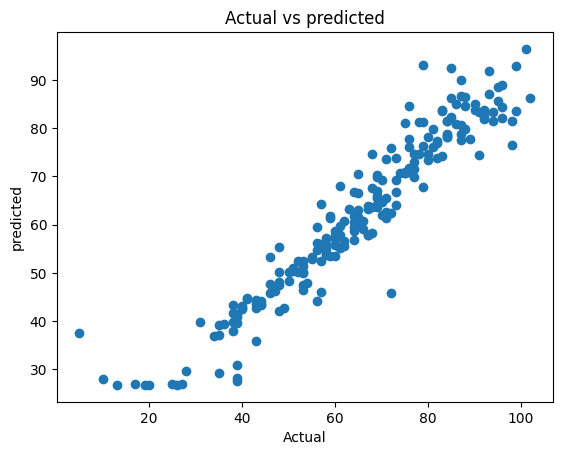

In [60]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
mae= mean_absolute_error(Y_test5, np.squeeze(model8.predict(X_test5)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test5, np.squeeze(model8.predict(X_test5)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [61]:
prediction9 =np.squeeze(model8.predict([[80,2,2,129,prediction8]]))
print("Prediction: {}".format(prediction9))

y_prd=np.squeeze(np.squeeze(model8.predict(X_test5)) )
predic_dif=pd.DataFrame({'Actual':Y_test5,'predict':y_prd,"differences":Y_test5  -y_prd})
predic_dif[0:15]

1/1 [==============================] - 1s 1s/step
Prediction: 55.35150146484375
7/7 [==============================] - 0s 6ms/step


,Actual,predict,differences
2061,92,81.850525,10.149475
2128,85,86.358154,-1.358154
1550,71,73.553131,-2.553131
309,27,27.070223,-0.070223
1436,69,69.908920,-0.908920
1914,87,80.564148,6.435852
37,59,53.420177,5.579823
2228,87,89.894806,-2.894806
2290,90,85.014145,4.985855
1985,86,84.945969,1.054031


## keras tuner with dense and keras tuner with RNN

In [62]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [63]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model9 = tuner.hypermodel.build(best_hps)

model9.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
37/37 [==============================] - 1s 13ms/step - loss: 14.4275 - mean_absolute_error: 14.4275 - val_loss: 6.5148 - val_mean_absolute_error: 6.5148
Epoch 2/2000
37/37 [==============================] - 0s 5ms/step - loss: 6.8353 - mean_absolute_error: 6.8353 - val_loss: 7.4761 - val_mean_absolute_error: 7.4761
Epoch 3/2000
37/37 [==============================] - 0s 5ms/step - loss: 6.7895 - mean_absolute_error: 6.7895 - val_loss: 5.7040 - val_mean_absolute_error: 5.7040
Epoch 4/2000
37/37 [==============================] - 0s 5ms/step - loss: 5.9148 - mean_absolute_error: 5.9148 - val_loss: 6.1070 - val_mean_absolute_error: 6.1070
Epoch 5/2000
37/37 [==============================] - 0s 4ms/step - loss: 6.1256 - mean_absolute_error: 6.1256 - val_loss: 7.1673 - val_mean_absolute_error: 7.1673

37/37 [==============================] - 0s 4ms/step - loss: 4.9932 - mean_absolute_error: 4.9932 - val_loss: 5.3130 - val_mean_absolute_error: 5.3130
Epoch 50/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.0092 - mean_absolute_error: 5.0092 - val_loss: 4.8719 - val_mean_absolute_error: 4.8719
Epoch 51/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.1965 - mean_absolute_error: 5.1965 - val_loss: 5.2138 - val_mean_absolute_error: 5.2138
Epoch 52/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.2242 - mean_absolute_error: 5.2242 - val_loss: 5.6012 - val_mean_absolute_error: 5.6012
Epoch 53/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.2542 - mean_absolute_error: 5.2542 - val_loss: 5.0095 - val_mean_absolute_error: 5.0095
Epoch 54/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.1339 - mean_absolute_error: 5.1339 - val_loss: 5.1279 - val_mean_absolute_error: 5.1279
Epoch 55/2000
37/37 [===

Epoch 99/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.0989 - mean_absolute_error: 5.0989 - val_loss: 5.1394 - val_mean_absolute_error: 5.1394
Epoch 100/2000
37/37 [==============================] - 0s 4ms/step - loss: 5.0330 - mean_absolute_error: 5.0330 - val_loss: 5.1544 - val_mean_absolute_error: 5.1544
Epoch 101/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8905 - mean_absolute_error: 4.8905 - val_loss: 5.0278 - val_mean_absolute_error: 5.0278
Epoch 102/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.9607 - mean_absolute_error: 4.9607 - val_loss: 5.1109 - val_mean_absolute_error: 5.1109
Epoch 103/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8366 - mean_absolute_error: 4.8366 - val_loss: 5.0078 - val_mean_absolute_error: 5.0078
Epoch 104/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7920 - mean_absolute_error: 4.7920 - val_loss: 5.6732 - val_mean_absolute_error: 5.6732
Epoch

37/37 [==============================] - 0s 4ms/step - loss: 4.9473 - mean_absolute_error: 4.9473 - val_loss: 4.7939 - val_mean_absolute_error: 4.7939
Epoch 149/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8218 - mean_absolute_error: 4.8218 - val_loss: 4.7128 - val_mean_absolute_error: 4.7128
Epoch 150/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7126 - mean_absolute_error: 4.7126 - val_loss: 4.7613 - val_mean_absolute_error: 4.7613
Epoch 151/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7539 - mean_absolute_error: 4.7539 - val_loss: 4.8515 - val_mean_absolute_error: 4.8515
Epoch 152/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8262 - mean_absolute_error: 4.8262 - val_loss: 4.8430 - val_mean_absolute_error: 4.8430
Epoch 153/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7985 - mean_absolute_error: 4.7985 - val_loss: 5.2705 - val_mean_absolute_error: 5.2705
Epoch 154/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 4.9991 - mean_absolute_error: 4.9991 - val_loss: 4.8419 - val_mean_absolute_error: 4.8419
Epoch 198/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8215 - mean_absolute_error: 4.8215 - val_loss: 4.7598 - val_mean_absolute_error: 4.7598
Epoch 199/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7300 - mean_absolute_error: 4.7300 - val_loss: 5.0553 - val_mean_absolute_error: 5.0553
Epoch 200/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8017 - mean_absolute_error: 4.8017 - val_loss: 5.2467 - val_mean_absolute_error: 5.2467
Epoch 201/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8082 - mean_absolute_error: 4.8082 - val_loss: 4.9655 - val_mean_absolute_error: 4.9655
Epoch 202/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8353 - mean_absolute_error: 4.8353 - val_loss: 5.0117 - val_mean_absolute_error: 5.0117
Epoch 203/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6420 - mean_absolute_error: 4.6420 - val_loss: 5.4741 - val_mean_absolute_error: 5.4741
Epoch 247/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8889 - mean_absolute_error: 4.8889 - val_loss: 5.0620 - val_mean_absolute_error: 5.0620
Epoch 248/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7021 - mean_absolute_error: 4.7021 - val_loss: 5.1704 - val_mean_absolute_error: 5.1704
Epoch 249/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.9591 - mean_absolute_error: 4.9591 - val_loss: 4.8295 - val_mean_absolute_error: 4.8295
Epoch 250/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7541 - mean_absolute_error: 4.7541 - val_loss: 4.9611 - val_mean_absolute_error: 4.9611
Epoch 251/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6914 - mean_absolute_error: 4.6914 - val_loss: 4.7839 - val_mean_absolute_error: 4.7839
Epoch 252/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.7458 - mean_absolute_error: 4.7458 - val_loss: 4.9039 - val_mean_absolute_error: 4.9039
Epoch 296/2000
37/37 [==============================] - 0s 3ms/step - loss: 4.8383 - mean_absolute_error: 4.8383 - val_loss: 5.0039 - val_mean_absolute_error: 5.0039
Epoch 297/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6829 - mean_absolute_error: 4.6829 - val_loss: 5.0658 - val_mean_absolute_error: 5.0658
Epoch 298/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5823 - mean_absolute_error: 4.5823 - val_loss: 4.8257 - val_mean_absolute_error: 4.8257
Epoch 299/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6551 - mean_absolute_error: 4.6551 - val_loss: 4.8119 - val_mean_absolute_error: 4.8119
Epoch 300/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5723 - mean_absolute_error: 4.5723 - val_loss: 5.0772 - val_mean_absolute_error: 5.0772
Epoch 301/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.7745 - mean_absolute_error: 4.7745 - val_loss: 4.7559 - val_mean_absolute_error: 4.7559
Epoch 345/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6950 - mean_absolute_error: 4.6950 - val_loss: 4.7448 - val_mean_absolute_error: 4.7448
Epoch 346/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6415 - mean_absolute_error: 4.6415 - val_loss: 4.8938 - val_mean_absolute_error: 4.8938
Epoch 347/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8719 - mean_absolute_error: 4.8719 - val_loss: 4.9739 - val_mean_absolute_error: 4.9739
Epoch 348/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.8167 - mean_absolute_error: 4.8167 - val_loss: 5.0885 - val_mean_absolute_error: 5.0885
Epoch 349/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6950 - mean_absolute_error: 4.6950 - val_loss: 4.6918 - val_mean_absolute_error: 4.6918
Epoch 350/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.7088 - mean_absolute_error: 4.7088 - val_loss: 4.9071 - val_mean_absolute_error: 4.9071
Epoch 394/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5935 - mean_absolute_error: 4.5935 - val_loss: 4.7359 - val_mean_absolute_error: 4.7359
Epoch 395/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6354 - mean_absolute_error: 4.6354 - val_loss: 5.0501 - val_mean_absolute_error: 5.0501
Epoch 396/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6911 - mean_absolute_error: 4.6911 - val_loss: 4.7099 - val_mean_absolute_error: 4.7099
Epoch 397/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5689 - mean_absolute_error: 4.5689 - val_loss: 4.7102 - val_mean_absolute_error: 4.7102
Epoch 398/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6292 - mean_absolute_error: 4.6292 - val_loss: 4.9530 - val_mean_absolute_error: 4.9530
Epoch 399/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6028 - mean_absolute_error: 4.6028 - val_loss: 4.7653 - val_mean_absolute_error: 4.7653
Epoch 443/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6463 - mean_absolute_error: 4.6463 - val_loss: 4.7333 - val_mean_absolute_error: 4.7333
Epoch 444/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6326 - mean_absolute_error: 4.6326 - val_loss: 4.7306 - val_mean_absolute_error: 4.7306
Epoch 445/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6859 - mean_absolute_error: 4.6859 - val_loss: 5.2690 - val_mean_absolute_error: 5.2690
Epoch 446/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6947 - mean_absolute_error: 4.6947 - val_loss: 4.8694 - val_mean_absolute_error: 4.8694
Epoch 447/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6452 - mean_absolute_error: 4.6452 - val_loss: 4.7182 - val_mean_absolute_error: 4.7182
Epoch 448/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.7198 - mean_absolute_error: 4.7198 - val_loss: 4.8307 - val_mean_absolute_error: 4.8307
Epoch 492/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7010 - mean_absolute_error: 4.7010 - val_loss: 5.6098 - val_mean_absolute_error: 5.6098
Epoch 493/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7090 - mean_absolute_error: 4.7090 - val_loss: 4.7675 - val_mean_absolute_error: 4.7675
Epoch 494/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5874 - mean_absolute_error: 4.5874 - val_loss: 4.8180 - val_mean_absolute_error: 4.8180
Epoch 495/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5797 - mean_absolute_error: 4.5797 - val_loss: 4.9322 - val_mean_absolute_error: 4.9322
Epoch 496/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.9753 - mean_absolute_error: 4.9753 - val_loss: 5.0464 - val_mean_absolute_error: 5.0464
Epoch 497/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6489 - mean_absolute_error: 4.6489 - val_loss: 4.8567 - val_mean_absolute_error: 4.8567
Epoch 541/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5820 - mean_absolute_error: 4.5820 - val_loss: 4.7938 - val_mean_absolute_error: 4.7938
Epoch 542/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5311 - mean_absolute_error: 4.5311 - val_loss: 4.8027 - val_mean_absolute_error: 4.8027
Epoch 543/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6457 - mean_absolute_error: 4.6457 - val_loss: 4.8996 - val_mean_absolute_error: 4.8996
Epoch 544/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6200 - mean_absolute_error: 4.6200 - val_loss: 4.9412 - val_mean_absolute_error: 4.9412
Epoch 545/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6544 - mean_absolute_error: 4.6544 - val_loss: 4.6814 - val_mean_absolute_error: 4.6814
Epoch 546/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.5701 - mean_absolute_error: 4.5701 - val_loss: 4.9290 - val_mean_absolute_error: 4.9290
Epoch 590/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5194 - mean_absolute_error: 4.5194 - val_loss: 4.7284 - val_mean_absolute_error: 4.7284
Epoch 591/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6217 - mean_absolute_error: 4.6217 - val_loss: 4.7741 - val_mean_absolute_error: 4.7741
Epoch 592/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6012 - mean_absolute_error: 4.6012 - val_loss: 5.0148 - val_mean_absolute_error: 5.0148
Epoch 593/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6751 - mean_absolute_error: 4.6751 - val_loss: 4.6977 - val_mean_absolute_error: 4.6977
Epoch 594/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6116 - mean_absolute_error: 4.6116 - val_loss: 4.6760 - val_mean_absolute_error: 4.6760
Epoch 595/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.5811 - mean_absolute_error: 4.5811 - val_loss: 4.9013 - val_mean_absolute_error: 4.9013
Epoch 639/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5637 - mean_absolute_error: 4.5637 - val_loss: 4.6939 - val_mean_absolute_error: 4.6939
Epoch 640/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5083 - mean_absolute_error: 4.5083 - val_loss: 4.8904 - val_mean_absolute_error: 4.8904
Epoch 641/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6615 - mean_absolute_error: 4.6615 - val_loss: 5.8198 - val_mean_absolute_error: 5.8198
Epoch 642/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7835 - mean_absolute_error: 4.7835 - val_loss: 4.9073 - val_mean_absolute_error: 4.9073
Epoch 643/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5736 - mean_absolute_error: 4.5736 - val_loss: 4.8077 - val_mean_absolute_error: 4.8077
Epoch 644/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6739 - mean_absolute_error: 4.6739 - val_loss: 4.9408 - val_mean_absolute_error: 4.9408
Epoch 688/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7547 - mean_absolute_error: 4.7547 - val_loss: 4.8564 - val_mean_absolute_error: 4.8564
Epoch 689/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7326 - mean_absolute_error: 4.7326 - val_loss: 4.9710 - val_mean_absolute_error: 4.9710
Epoch 690/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6799 - mean_absolute_error: 4.6799 - val_loss: 4.9142 - val_mean_absolute_error: 4.9142
Epoch 691/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5016 - mean_absolute_error: 4.5016 - val_loss: 4.7667 - val_mean_absolute_error: 4.7667
Epoch 692/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5224 - mean_absolute_error: 4.5224 - val_loss: 4.8745 - val_mean_absolute_error: 4.8745
Epoch 693/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.5829 - mean_absolute_error: 4.5829 - val_loss: 4.9716 - val_mean_absolute_error: 4.9716
Epoch 737/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6205 - mean_absolute_error: 4.6205 - val_loss: 4.6916 - val_mean_absolute_error: 4.6916
Epoch 738/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5364 - mean_absolute_error: 4.5364 - val_loss: 4.8770 - val_mean_absolute_error: 4.8770
Epoch 739/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6677 - mean_absolute_error: 4.6677 - val_loss: 4.7837 - val_mean_absolute_error: 4.7837
Epoch 740/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6633 - mean_absolute_error: 4.6633 - val_loss: 4.7469 - val_mean_absolute_error: 4.7469
Epoch 741/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5146 - mean_absolute_error: 4.5146 - val_loss: 4.7376 - val_mean_absolute_error: 4.7376
Epoch 742/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6200 - mean_absolute_error: 4.6200 - val_loss: 4.7528 - val_mean_absolute_error: 4.7528
Epoch 786/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5849 - mean_absolute_error: 4.5849 - val_loss: 4.8633 - val_mean_absolute_error: 4.8633
Epoch 787/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5446 - mean_absolute_error: 4.5446 - val_loss: 4.6783 - val_mean_absolute_error: 4.6783
Epoch 788/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5171 - mean_absolute_error: 4.5171 - val_loss: 4.8821 - val_mean_absolute_error: 4.8821
Epoch 789/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5854 - mean_absolute_error: 4.5854 - val_loss: 4.8314 - val_mean_absolute_error: 4.8314
Epoch 790/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6124 - mean_absolute_error: 4.6124 - val_loss: 4.9258 - val_mean_absolute_error: 4.9258
Epoch 791/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6278 - mean_absolute_error: 4.6278 - val_loss: 4.8148 - val_mean_absolute_error: 4.8148
Epoch 835/2000
37/37 [==============================] - 0s 3ms/step - loss: 4.6505 - mean_absolute_error: 4.6505 - val_loss: 4.7890 - val_mean_absolute_error: 4.7890
Epoch 836/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6854 - mean_absolute_error: 4.6854 - val_loss: 4.6868 - val_mean_absolute_error: 4.6868
Epoch 837/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6007 - mean_absolute_error: 4.6007 - val_loss: 4.8050 - val_mean_absolute_error: 4.8050
Epoch 838/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5372 - mean_absolute_error: 4.5372 - val_loss: 4.7167 - val_mean_absolute_error: 4.7167
Epoch 839/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5201 - mean_absolute_error: 4.5201 - val_loss: 4.7032 - val_mean_absolute_error: 4.7032
Epoch 840/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.4974 - mean_absolute_error: 4.4974 - val_loss: 4.7342 - val_mean_absolute_error: 4.7342
Epoch 884/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7532 - mean_absolute_error: 4.7532 - val_loss: 4.7634 - val_mean_absolute_error: 4.7634
Epoch 885/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6543 - mean_absolute_error: 4.6543 - val_loss: 4.7264 - val_mean_absolute_error: 4.7264
Epoch 886/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5256 - mean_absolute_error: 4.5256 - val_loss: 4.8769 - val_mean_absolute_error: 4.8769
Epoch 887/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5624 - mean_absolute_error: 4.5624 - val_loss: 4.6686 - val_mean_absolute_error: 4.6686
Epoch 888/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5210 - mean_absolute_error: 4.5210 - val_loss: 4.7305 - val_mean_absolute_error: 4.7305
Epoch 889/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.6592 - mean_absolute_error: 4.6592 - val_loss: 4.9789 - val_mean_absolute_error: 4.9789
Epoch 933/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6342 - mean_absolute_error: 4.6342 - val_loss: 4.8789 - val_mean_absolute_error: 4.8789
Epoch 934/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7053 - mean_absolute_error: 4.7053 - val_loss: 4.6914 - val_mean_absolute_error: 4.6914
Epoch 935/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5851 - mean_absolute_error: 4.5851 - val_loss: 5.1459 - val_mean_absolute_error: 5.1459
Epoch 936/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6936 - mean_absolute_error: 4.6936 - val_loss: 4.6985 - val_mean_absolute_error: 4.6985
Epoch 937/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5077 - mean_absolute_error: 4.5077 - val_loss: 4.7486 - val_mean_absolute_error: 4.7486
Epoch 938/2000
37/3

37/37 [==============================] - 0s 4ms/step - loss: 4.5474 - mean_absolute_error: 4.5474 - val_loss: 5.4028 - val_mean_absolute_error: 5.4028
Epoch 982/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5639 - mean_absolute_error: 4.5639 - val_loss: 4.6989 - val_mean_absolute_error: 4.6989
Epoch 983/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.4783 - mean_absolute_error: 4.4783 - val_loss: 4.7618 - val_mean_absolute_error: 4.7618
Epoch 984/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5311 - mean_absolute_error: 4.5311 - val_loss: 4.7750 - val_mean_absolute_error: 4.7750
Epoch 985/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.4838 - mean_absolute_error: 4.4838 - val_loss: 4.8851 - val_mean_absolute_error: 4.8851
Epoch 986/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5867 - mean_absolute_error: 4.5867 - val_loss: 4.6959 - val_mean_absolute_error: 4.6959
Epoch 987/2000
37/3

37/37 [==============================] - 0s 3ms/step - loss: 4.6682 - mean_absolute_error: 4.6682 - val_loss: 4.9429 - val_mean_absolute_error: 4.9429
Epoch 1031/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6500 - mean_absolute_error: 4.6500 - val_loss: 4.7411 - val_mean_absolute_error: 4.7411
Epoch 1032/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5033 - mean_absolute_error: 4.5033 - val_loss: 4.7623 - val_mean_absolute_error: 4.7623
Epoch 1033/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5952 - mean_absolute_error: 4.5952 - val_loss: 4.9931 - val_mean_absolute_error: 4.9931
Epoch 1034/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.4951 - mean_absolute_error: 4.4951 - val_loss: 4.7633 - val_mean_absolute_error: 4.7633
Epoch 1035/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5300 - mean_absolute_error: 4.5300 - val_loss: 4.7120 - val_mean_absolute_error: 4.7120
Epoch 1036/200

37/37 [==============================] - 0s 4ms/step - loss: 4.6278 - mean_absolute_error: 4.6278 - val_loss: 4.9140 - val_mean_absolute_error: 4.9140
Epoch 1080/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5763 - mean_absolute_error: 4.5763 - val_loss: 4.7204 - val_mean_absolute_error: 4.7204
Epoch 1081/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5497 - mean_absolute_error: 4.5497 - val_loss: 4.7932 - val_mean_absolute_error: 4.7932
Epoch 1082/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6409 - mean_absolute_error: 4.6409 - val_loss: 4.7188 - val_mean_absolute_error: 4.7188
Epoch 1083/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6131 - mean_absolute_error: 4.6131 - val_loss: 4.6672 - val_mean_absolute_error: 4.6672
Epoch 1084/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6632 - mean_absolute_error: 4.6632 - val_loss: 5.1832 - val_mean_absolute_error: 5.1832
Epoch 1085/200

37/37 [==============================] - 0s 4ms/step - loss: 4.5686 - mean_absolute_error: 4.5686 - val_loss: 4.6826 - val_mean_absolute_error: 4.6826
Epoch 1129/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5978 - mean_absolute_error: 4.5978 - val_loss: 4.7105 - val_mean_absolute_error: 4.7105
Epoch 1130/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.7000 - mean_absolute_error: 4.7000 - val_loss: 5.0800 - val_mean_absolute_error: 5.0800
Epoch 1131/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5623 - mean_absolute_error: 4.5623 - val_loss: 4.6713 - val_mean_absolute_error: 4.6713
Epoch 1132/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.6790 - mean_absolute_error: 4.6790 - val_loss: 4.6494 - val_mean_absolute_error: 4.6494
Epoch 1133/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5258 - mean_absolute_error: 4.5258 - val_loss: 4.7227 - val_mean_absolute_error: 4.7227
Epoch 1134/200

37/37 [==============================] - 0s 6ms/step - loss: 4.5130 - mean_absolute_error: 4.5130 - val_loss: 5.0073 - val_mean_absolute_error: 5.0073
Epoch 1178/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6031 - mean_absolute_error: 4.6031 - val_loss: 4.6955 - val_mean_absolute_error: 4.6955
Epoch 1179/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5090 - mean_absolute_error: 4.5090 - val_loss: 4.8201 - val_mean_absolute_error: 4.8201
Epoch 1180/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5509 - mean_absolute_error: 4.5509 - val_loss: 4.7818 - val_mean_absolute_error: 4.7818
Epoch 1181/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5593 - mean_absolute_error: 4.5593 - val_loss: 4.7490 - val_mean_absolute_error: 4.7490
Epoch 1182/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.7541 - mean_absolute_error: 4.7541 - val_loss: 5.0694 - val_mean_absolute_error: 5.0694
Epoch 1183/200

37/37 [==============================] - 0s 5ms/step - loss: 4.5327 - mean_absolute_error: 4.5327 - val_loss: 4.6707 - val_mean_absolute_error: 4.6707
Epoch 1227/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5396 - mean_absolute_error: 4.5396 - val_loss: 4.6849 - val_mean_absolute_error: 4.6849
Epoch 1228/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5193 - mean_absolute_error: 4.5193 - val_loss: 4.7810 - val_mean_absolute_error: 4.7810
Epoch 1229/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5441 - mean_absolute_error: 4.5441 - val_loss: 4.7566 - val_mean_absolute_error: 4.7566
Epoch 1230/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5808 - mean_absolute_error: 4.5808 - val_loss: 4.7097 - val_mean_absolute_error: 4.7097
Epoch 1231/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4951 - mean_absolute_error: 4.4951 - val_loss: 4.9135 - val_mean_absolute_error: 4.9135
Epoch 1232/200

37/37 [==============================] - 0s 6ms/step - loss: 4.5005 - mean_absolute_error: 4.5005 - val_loss: 4.6485 - val_mean_absolute_error: 4.6485
Epoch 1276/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4796 - mean_absolute_error: 4.4796 - val_loss: 4.6448 - val_mean_absolute_error: 4.6448
Epoch 1277/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5184 - mean_absolute_error: 4.5184 - val_loss: 4.8503 - val_mean_absolute_error: 4.8503
Epoch 1278/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5235 - mean_absolute_error: 4.5235 - val_loss: 4.6935 - val_mean_absolute_error: 4.6935
Epoch 1279/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5507 - mean_absolute_error: 4.5507 - val_loss: 4.7030 - val_mean_absolute_error: 4.7030
Epoch 1280/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5135 - mean_absolute_error: 4.5135 - val_loss: 4.7895 - val_mean_absolute_error: 4.7895
Epoch 1281/200

37/37 [==============================] - 0s 6ms/step - loss: 4.4688 - mean_absolute_error: 4.4688 - val_loss: 4.7835 - val_mean_absolute_error: 4.7835
Epoch 1325/2000
37/37 [==============================] - 0s 7ms/step - loss: 4.4853 - mean_absolute_error: 4.4853 - val_loss: 4.8475 - val_mean_absolute_error: 4.8475
Epoch 1326/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5196 - mean_absolute_error: 4.5196 - val_loss: 4.6949 - val_mean_absolute_error: 4.6949
Epoch 1327/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4869 - mean_absolute_error: 4.4869 - val_loss: 4.6741 - val_mean_absolute_error: 4.6741
Epoch 1328/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5253 - mean_absolute_error: 4.5253 - val_loss: 4.7464 - val_mean_absolute_error: 4.7464
Epoch 1329/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4870 - mean_absolute_error: 4.4870 - val_loss: 4.6723 - val_mean_absolute_error: 4.6723
Epoch 1330/200

37/37 [==============================] - 0s 5ms/step - loss: 4.5555 - mean_absolute_error: 4.5555 - val_loss: 4.8704 - val_mean_absolute_error: 4.8704
Epoch 1374/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.7027 - mean_absolute_error: 4.7027 - val_loss: 4.6669 - val_mean_absolute_error: 4.6669
Epoch 1375/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5507 - mean_absolute_error: 4.5507 - val_loss: 4.6493 - val_mean_absolute_error: 4.6493
Epoch 1376/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6145 - mean_absolute_error: 4.6145 - val_loss: 4.7986 - val_mean_absolute_error: 4.7986
Epoch 1377/2000
37/37 [==============================] - 0s 7ms/step - loss: 4.6469 - mean_absolute_error: 4.6469 - val_loss: 4.8491 - val_mean_absolute_error: 4.8491
Epoch 1378/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6620 - mean_absolute_error: 4.6620 - val_loss: 4.7321 - val_mean_absolute_error: 4.7321
Epoch 1379/200

37/37 [==============================] - 0s 6ms/step - loss: 4.4799 - mean_absolute_error: 4.4799 - val_loss: 4.6696 - val_mean_absolute_error: 4.6696
Epoch 1423/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5142 - mean_absolute_error: 4.5142 - val_loss: 4.6779 - val_mean_absolute_error: 4.6779
Epoch 1424/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5202 - mean_absolute_error: 4.5202 - val_loss: 4.7342 - val_mean_absolute_error: 4.7342
Epoch 1425/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5015 - mean_absolute_error: 4.5015 - val_loss: 4.6754 - val_mean_absolute_error: 4.6754
Epoch 1426/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4722 - mean_absolute_error: 4.4722 - val_loss: 4.8556 - val_mean_absolute_error: 4.8556
Epoch 1427/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5930 - mean_absolute_error: 4.5930 - val_loss: 5.3297 - val_mean_absolute_error: 5.3297
Epoch 1428/200

37/37 [==============================] - 0s 5ms/step - loss: 4.5200 - mean_absolute_error: 4.5200 - val_loss: 4.6650 - val_mean_absolute_error: 4.6650
Epoch 1472/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4625 - mean_absolute_error: 4.4625 - val_loss: 4.7288 - val_mean_absolute_error: 4.7288
Epoch 1473/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4720 - mean_absolute_error: 4.4720 - val_loss: 4.7879 - val_mean_absolute_error: 4.7879
Epoch 1474/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5714 - mean_absolute_error: 4.5714 - val_loss: 4.8514 - val_mean_absolute_error: 4.8514
Epoch 1475/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5376 - mean_absolute_error: 4.5376 - val_loss: 4.6706 - val_mean_absolute_error: 4.6706
Epoch 1476/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5503 - mean_absolute_error: 4.5503 - val_loss: 4.8531 - val_mean_absolute_error: 4.8531
Epoch 1477/200

37/37 [==============================] - 0s 7ms/step - loss: 4.6182 - mean_absolute_error: 4.6182 - val_loss: 4.6851 - val_mean_absolute_error: 4.6851
Epoch 1521/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5268 - mean_absolute_error: 4.5268 - val_loss: 4.8424 - val_mean_absolute_error: 4.8424
Epoch 1522/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5479 - mean_absolute_error: 4.5479 - val_loss: 4.6896 - val_mean_absolute_error: 4.6896
Epoch 1523/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5611 - mean_absolute_error: 4.5611 - val_loss: 4.9182 - val_mean_absolute_error: 4.9182
Epoch 1524/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5344 - mean_absolute_error: 4.5344 - val_loss: 4.7975 - val_mean_absolute_error: 4.7975
Epoch 1525/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5465 - mean_absolute_error: 4.5465 - val_loss: 4.7179 - val_mean_absolute_error: 4.7179
Epoch 1526/200

37/37 [==============================] - 0s 5ms/step - loss: 4.4852 - mean_absolute_error: 4.4852 - val_loss: 4.6998 - val_mean_absolute_error: 4.6998
Epoch 1570/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5750 - mean_absolute_error: 4.5750 - val_loss: 4.9362 - val_mean_absolute_error: 4.9362
Epoch 1571/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5662 - mean_absolute_error: 4.5662 - val_loss: 4.6305 - val_mean_absolute_error: 4.6305
Epoch 1572/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5662 - mean_absolute_error: 4.5662 - val_loss: 4.8137 - val_mean_absolute_error: 4.8137
Epoch 1573/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5924 - mean_absolute_error: 4.5924 - val_loss: 4.8281 - val_mean_absolute_error: 4.8281
Epoch 1574/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.7046 - mean_absolute_error: 4.7046 - val_loss: 4.6588 - val_mean_absolute_error: 4.6588
Epoch 1575/200

37/37 [==============================] - 0s 6ms/step - loss: 4.5949 - mean_absolute_error: 4.5949 - val_loss: 4.6427 - val_mean_absolute_error: 4.6427
Epoch 1619/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5478 - mean_absolute_error: 4.5478 - val_loss: 4.6909 - val_mean_absolute_error: 4.6909
Epoch 1620/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4367 - mean_absolute_error: 4.4367 - val_loss: 4.6609 - val_mean_absolute_error: 4.6609
Epoch 1621/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.6464 - mean_absolute_error: 4.6464 - val_loss: 4.8243 - val_mean_absolute_error: 4.8243
Epoch 1622/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5540 - mean_absolute_error: 4.5540 - val_loss: 4.7477 - val_mean_absolute_error: 4.7477
Epoch 1623/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4486 - mean_absolute_error: 4.4486 - val_loss: 4.7801 - val_mean_absolute_error: 4.7801
Epoch 1624/200

37/37 [==============================] - 0s 5ms/step - loss: 4.4926 - mean_absolute_error: 4.4926 - val_loss: 5.1528 - val_mean_absolute_error: 5.1528
Epoch 1668/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5254 - mean_absolute_error: 4.5254 - val_loss: 4.9348 - val_mean_absolute_error: 4.9348
Epoch 1669/2000
37/37 [==============================] - 0s 9ms/step - loss: 4.5715 - mean_absolute_error: 4.5715 - val_loss: 4.6749 - val_mean_absolute_error: 4.6749
Epoch 1670/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.4472 - mean_absolute_error: 4.4472 - val_loss: 4.7413 - val_mean_absolute_error: 4.7413
Epoch 1671/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5169 - mean_absolute_error: 4.5169 - val_loss: 4.7525 - val_mean_absolute_error: 4.7525
Epoch 1672/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6058 - mean_absolute_error: 4.6058 - val_loss: 4.7954 - val_mean_absolute_error: 4.7954
Epoch 1673/200

37/37 [==============================] - 0s 6ms/step - loss: 4.5157 - mean_absolute_error: 4.5157 - val_loss: 4.6745 - val_mean_absolute_error: 4.6745
Epoch 1717/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5931 - mean_absolute_error: 4.5931 - val_loss: 4.6807 - val_mean_absolute_error: 4.6807
Epoch 1718/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4371 - mean_absolute_error: 4.4371 - val_loss: 4.8053 - val_mean_absolute_error: 4.8053
Epoch 1719/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5644 - mean_absolute_error: 4.5644 - val_loss: 4.6812 - val_mean_absolute_error: 4.6812
Epoch 1720/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4759 - mean_absolute_error: 4.4759 - val_loss: 4.7902 - val_mean_absolute_error: 4.7902
Epoch 1721/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.8788 - mean_absolute_error: 4.8788 - val_loss: 4.8894 - val_mean_absolute_error: 4.8894
Epoch 1722/200

37/37 [==============================] - 0s 5ms/step - loss: 4.4967 - mean_absolute_error: 4.4967 - val_loss: 4.6304 - val_mean_absolute_error: 4.6304
Epoch 1766/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5058 - mean_absolute_error: 4.5058 - val_loss: 4.6541 - val_mean_absolute_error: 4.6541
Epoch 1767/2000
37/37 [==============================] - 0s 8ms/step - loss: 4.4750 - mean_absolute_error: 4.4750 - val_loss: 4.6907 - val_mean_absolute_error: 4.6907
Epoch 1768/2000
37/37 [==============================] - 0s 7ms/step - loss: 4.4747 - mean_absolute_error: 4.4747 - val_loss: 4.6569 - val_mean_absolute_error: 4.6569
Epoch 1769/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5402 - mean_absolute_error: 4.5402 - val_loss: 4.9252 - val_mean_absolute_error: 4.9252
Epoch 1770/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.7016 - mean_absolute_error: 4.7016 - val_loss: 5.0954 - val_mean_absolute_error: 5.0954
Epoch 1771/200

37/37 [==============================] - 0s 7ms/step - loss: 4.6583 - mean_absolute_error: 4.6583 - val_loss: 4.6800 - val_mean_absolute_error: 4.6800
Epoch 1815/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4703 - mean_absolute_error: 4.4703 - val_loss: 4.6644 - val_mean_absolute_error: 4.6644
Epoch 1816/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4927 - mean_absolute_error: 4.4927 - val_loss: 4.9076 - val_mean_absolute_error: 4.9076
Epoch 1817/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6225 - mean_absolute_error: 4.6225 - val_loss: 4.9280 - val_mean_absolute_error: 4.9280
Epoch 1818/2000
37/37 [==============================] - 0s 4ms/step - loss: 4.5231 - mean_absolute_error: 4.5231 - val_loss: 4.6704 - val_mean_absolute_error: 4.6704
Epoch 1819/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5420 - mean_absolute_error: 4.5420 - val_loss: 4.7828 - val_mean_absolute_error: 4.7828
Epoch 1820/200

37/37 [==============================] - 0s 5ms/step - loss: 4.5885 - mean_absolute_error: 4.5885 - val_loss: 4.7283 - val_mean_absolute_error: 4.7283
Epoch 1864/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5275 - mean_absolute_error: 4.5275 - val_loss: 4.7039 - val_mean_absolute_error: 4.7039
Epoch 1865/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4906 - mean_absolute_error: 4.4906 - val_loss: 4.6370 - val_mean_absolute_error: 4.6370
Epoch 1866/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6017 - mean_absolute_error: 4.6017 - val_loss: 4.7611 - val_mean_absolute_error: 4.7611
Epoch 1867/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5576 - mean_absolute_error: 4.5576 - val_loss: 4.6867 - val_mean_absolute_error: 4.6867
Epoch 1868/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.5409 - mean_absolute_error: 4.5409 - val_loss: 4.6205 - val_mean_absolute_error: 4.6205
Epoch 1869/200

37/37 [==============================] - 0s 6ms/step - loss: 4.4870 - mean_absolute_error: 4.4870 - val_loss: 4.6363 - val_mean_absolute_error: 4.6363
Epoch 1913/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5164 - mean_absolute_error: 4.5164 - val_loss: 4.8765 - val_mean_absolute_error: 4.8765
Epoch 1914/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5632 - mean_absolute_error: 4.5632 - val_loss: 4.6467 - val_mean_absolute_error: 4.6467
Epoch 1915/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5224 - mean_absolute_error: 4.5224 - val_loss: 4.7607 - val_mean_absolute_error: 4.7607
Epoch 1916/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5199 - mean_absolute_error: 4.5199 - val_loss: 4.6439 - val_mean_absolute_error: 4.6439
Epoch 1917/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4678 - mean_absolute_error: 4.4678 - val_loss: 5.1742 - val_mean_absolute_error: 5.1742
Epoch 1918/200

37/37 [==============================] - 0s 5ms/step - loss: 4.4564 - mean_absolute_error: 4.4564 - val_loss: 4.7396 - val_mean_absolute_error: 4.7396
Epoch 1962/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.6090 - mean_absolute_error: 4.6090 - val_loss: 5.0245 - val_mean_absolute_error: 5.0245
Epoch 1963/2000
37/37 [==============================] - 0s 6ms/step - loss: 4.6015 - mean_absolute_error: 4.6015 - val_loss: 4.7687 - val_mean_absolute_error: 4.7687
Epoch 1964/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.6439 - mean_absolute_error: 4.6439 - val_loss: 4.6499 - val_mean_absolute_error: 4.6499
Epoch 1965/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.4352 - mean_absolute_error: 4.4352 - val_loss: 4.6757 - val_mean_absolute_error: 4.6757
Epoch 1966/2000
37/37 [==============================] - 0s 5ms/step - loss: 4.5807 - mean_absolute_error: 4.5807 - val_loss: 4.6763 - val_mean_absolute_error: 4.6763
Epoch 1967/200

In [64]:
prediction10 = np.squeeze(model9.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction10))

1/1 [==============================] - 0s 171ms/step
Prediction: 59.39470672607422


In [65]:
y_prd=np.squeeze(np.squeeze(model9.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
A=predic_dif
print(A)

23/23 [==============================] - 0s 2ms/step
      Actual    predict  differences
898       57  57.721230    -0.721230
182       25  26.992702    -1.992702
565       44  44.678932    -0.678932
457       39  46.974442    -7.974442
1852      83  87.822922    -4.822922
...      ...        ...          ...
1812      83  82.564575     0.435425
913       71  58.873047    12.126953
1036      65  62.361343     2.638657
629       42  43.586998    -1.586998
61        41  56.399689   -15.399689

[714 rows x 3 columns]


In [66]:
import numpy as np
import pandas as pd
mean1= pd.DataFrame.mean (A['differences'])
data_std=pd.DataFrame.std(A['differences'])
cut_off = data_std * 3
lower, upper = mean1 - cut_off, mean1 + cut_off
for x in A['differences']:
     if x <lower or x > upper:
            print(x)
print('lower bound:',lower)
print('upper bound:',upper)

-22.522247314453125
26.107810974121094
26.479949951171875
30.403213500976562
50.008514404296875
-36.395111083984375
28.357162475585938
27.68555450439453
38.989288330078125
27.706451416015625
lower bound: -21.79736744471186
upper bound: 24.156485000730846


In [67]:
A.drop(A[(A['differences'] >24)].index, inplace=True)
A.drop(A[(A['differences'] <-21)].index, inplace=True)
del A['differences']


B= pd.concat([dataset, A], axis=1, join='inner')

del B['LightingCostAveragePerDwelling']

print(B)

from sklearn.model_selection import train_test_split
X6=B.drop('Actual',axis=1)
Y6=B['Actual']
X_train6, X_test6, Y_train6, Y_test6 =train_test_split(X6,Y6, test_size=0.3, random_state = 0)

      AverageFloorArea  Quarter  Property Type  EnergyUseAveragePerDwelling  \
1                    0        1              4                          154   
6                    1        1              4                          213   
9                    1        4              4                          114   
10                   2        1              4                          153   
11                   2        2              4                          151   
...                ...      ...            ...                          ...   
2363               198        2              3                           96   
2367               198        4              1                          111   
2368               198        4              3                           88   
2372               199        4              3                           87   
2376               200        4              3                           99   

      Actual    predict  
1         70  58.308876  

In [68]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train6.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [69]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

tuner.search(X_train6,Y_train6 ,epochs=100,validation_data=(X_test6,Y_test6))

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

model10 = tuner.hypermodel.build(best_hps)

model10.fit(X_train6, Y_train6, epochs=2000,batch_size=32, validation_split=0.3)

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/2000
11/11 [==============================] - 8s 167ms/step - loss: 73.2205 - mean_absolute_error: 73.2205 - val_loss: 26.4707 - val_mean_absolute_error: 26.4707
Epoch 2/2000
11/11 [==============================] - 0s 45ms/step - loss: 15.1986 - mean_absolute_error: 15.1986 - val_loss: 9.5662 - val_mean_absolute_error: 9.5662
Epoch 3/2000
11/11 [==============================] - 0s 41ms/step - loss: 7.6567 - mean_absolute_error: 7.6567 - val_loss: 6.7617 - val_mean_absolute_error: 6.7617
Epoch 4/2000
11/11 [==============================] - 0s 41ms/step - loss: 6.4825 - mean_absolute_error: 6.4825 - val_loss: 7.3979 - val_mean_absolute_error: 7.3979
Epoch 5/2000
11/11 [==============================] - 0s 38ms/step - loss: 6.4765 - mean_absolute_error: 6.4765 - val_loss: 9.2474 - val_mean_absolute_erro

11/11 [==============================] - 0s 38ms/step - loss: 5.4347 - mean_absolute_error: 5.4347 - val_loss: 5.4852 - val_mean_absolute_error: 5.4852
Epoch 50/2000
11/11 [==============================] - 0s 46ms/step - loss: 4.8224 - mean_absolute_error: 4.8224 - val_loss: 5.4103 - val_mean_absolute_error: 5.4103
Epoch 51/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.6122 - mean_absolute_error: 4.6122 - val_loss: 5.2455 - val_mean_absolute_error: 5.2455
Epoch 52/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.4940 - mean_absolute_error: 4.4940 - val_loss: 5.7073 - val_mean_absolute_error: 5.7073
Epoch 53/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.5668 - mean_absolute_error: 4.5668 - val_loss: 5.1323 - val_mean_absolute_error: 5.1323
Epoch 54/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.9641 - mean_absolute_error: 4.9641 - val_loss: 5.1671 - val_mean_absolute_error: 5.1671
Epoch 55/2000
11/1

11/11 [==============================] - 0s 40ms/step - loss: 4.4266 - mean_absolute_error: 4.4266 - val_loss: 5.3152 - val_mean_absolute_error: 5.3152
Epoch 99/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.9862 - mean_absolute_error: 4.9862 - val_loss: 4.8618 - val_mean_absolute_error: 4.8618
Epoch 100/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.6381 - mean_absolute_error: 4.6381 - val_loss: 4.9871 - val_mean_absolute_error: 4.9871
Epoch 101/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.5181 - mean_absolute_error: 4.5181 - val_loss: 4.9590 - val_mean_absolute_error: 4.9590
Epoch 102/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.4602 - mean_absolute_error: 4.4602 - val_loss: 5.9385 - val_mean_absolute_error: 5.9385
Epoch 103/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.4335 - mean_absolute_error: 4.4335 - val_loss: 4.9579 - val_mean_absolute_error: 4.9579
Epoch 104/2000

11/11 [==============================] - 0s 44ms/step - loss: 4.3821 - mean_absolute_error: 4.3821 - val_loss: 5.1833 - val_mean_absolute_error: 5.1833
Epoch 148/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.6403 - mean_absolute_error: 4.6403 - val_loss: 5.2608 - val_mean_absolute_error: 5.2608
Epoch 149/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.6808 - mean_absolute_error: 4.6808 - val_loss: 5.3071 - val_mean_absolute_error: 5.3071
Epoch 150/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.6323 - mean_absolute_error: 4.6323 - val_loss: 5.1478 - val_mean_absolute_error: 5.1478
Epoch 151/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.2902 - mean_absolute_error: 4.2902 - val_loss: 4.9856 - val_mean_absolute_error: 4.9856
Epoch 152/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.3490 - mean_absolute_error: 4.3490 - val_loss: 5.3785 - val_mean_absolute_error: 5.3785
Epoch 153/200

11/11 [==============================] - 0s 37ms/step - loss: 4.4843 - mean_absolute_error: 4.4843 - val_loss: 4.9992 - val_mean_absolute_error: 4.9992
Epoch 197/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.2240 - mean_absolute_error: 4.2240 - val_loss: 4.9848 - val_mean_absolute_error: 4.9848
Epoch 198/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.3116 - mean_absolute_error: 4.3116 - val_loss: 5.6491 - val_mean_absolute_error: 5.6491
Epoch 199/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.5653 - mean_absolute_error: 4.5653 - val_loss: 4.8748 - val_mean_absolute_error: 4.8748
Epoch 200/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.3996 - mean_absolute_error: 4.3996 - val_loss: 5.1400 - val_mean_absolute_error: 5.1400
Epoch 201/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1775 - mean_absolute_error: 4.1775 - val_loss: 5.3474 - val_mean_absolute_error: 5.3474
Epoch 202/200

11/11 [==============================] - 0s 39ms/step - loss: 4.1470 - mean_absolute_error: 4.1470 - val_loss: 5.1575 - val_mean_absolute_error: 5.1575
Epoch 246/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.7037 - mean_absolute_error: 4.7037 - val_loss: 4.9299 - val_mean_absolute_error: 4.9299
Epoch 247/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.2243 - mean_absolute_error: 4.2243 - val_loss: 4.9613 - val_mean_absolute_error: 4.9613
Epoch 248/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.2552 - mean_absolute_error: 4.2552 - val_loss: 4.9693 - val_mean_absolute_error: 4.9693
Epoch 249/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.3715 - mean_absolute_error: 4.3715 - val_loss: 5.4664 - val_mean_absolute_error: 5.4664
Epoch 250/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.5411 - mean_absolute_error: 4.5411 - val_loss: 5.0993 - val_mean_absolute_error: 5.0993
Epoch 251/200

11/11 [==============================] - 0s 44ms/step - loss: 4.7193 - mean_absolute_error: 4.7193 - val_loss: 5.4096 - val_mean_absolute_error: 5.4096
Epoch 295/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.5542 - mean_absolute_error: 4.5542 - val_loss: 6.7919 - val_mean_absolute_error: 6.7919
Epoch 296/2000
11/11 [==============================] - 0s 41ms/step - loss: 5.2495 - mean_absolute_error: 5.2495 - val_loss: 5.0903 - val_mean_absolute_error: 5.0903
Epoch 297/2000
11/11 [==============================] - 0s 39ms/step - loss: 5.2108 - mean_absolute_error: 5.2108 - val_loss: 6.1733 - val_mean_absolute_error: 6.1733
Epoch 298/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.7506 - mean_absolute_error: 4.7506 - val_loss: 4.9741 - val_mean_absolute_error: 4.9741
Epoch 299/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.2603 - mean_absolute_error: 4.2603 - val_loss: 4.9248 - val_mean_absolute_error: 4.9248
Epoch 300/200

11/11 [==============================] - 0s 37ms/step - loss: 4.2484 - mean_absolute_error: 4.2484 - val_loss: 4.9222 - val_mean_absolute_error: 4.9222
Epoch 344/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.1776 - mean_absolute_error: 4.1776 - val_loss: 5.0891 - val_mean_absolute_error: 5.0891
Epoch 345/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.3791 - mean_absolute_error: 4.3791 - val_loss: 4.9354 - val_mean_absolute_error: 4.9354
Epoch 346/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.4167 - mean_absolute_error: 4.4167 - val_loss: 6.5472 - val_mean_absolute_error: 6.5472
Epoch 347/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.8840 - mean_absolute_error: 4.8840 - val_loss: 5.3382 - val_mean_absolute_error: 5.3382
Epoch 348/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.4469 - mean_absolute_error: 4.4469 - val_loss: 4.9416 - val_mean_absolute_error: 4.9416
Epoch 349/200

11/11 [==============================] - 0s 39ms/step - loss: 4.6190 - mean_absolute_error: 4.6190 - val_loss: 5.0677 - val_mean_absolute_error: 5.0677
Epoch 393/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.4265 - mean_absolute_error: 4.4265 - val_loss: 4.9396 - val_mean_absolute_error: 4.9396
Epoch 394/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2131 - mean_absolute_error: 4.2131 - val_loss: 5.2441 - val_mean_absolute_error: 5.2441
Epoch 395/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.3256 - mean_absolute_error: 4.3256 - val_loss: 5.0360 - val_mean_absolute_error: 5.0360
Epoch 396/2000
11/11 [==============================] - 0s 47ms/step - loss: 4.4170 - mean_absolute_error: 4.4170 - val_loss: 5.3376 - val_mean_absolute_error: 5.3376
Epoch 397/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.2193 - mean_absolute_error: 4.2193 - val_loss: 5.0096 - val_mean_absolute_error: 5.0096
Epoch 398/200

11/11 [==============================] - 0s 37ms/step - loss: 4.3137 - mean_absolute_error: 4.3137 - val_loss: 4.9899 - val_mean_absolute_error: 4.9899
Epoch 442/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.2385 - mean_absolute_error: 4.2385 - val_loss: 5.0473 - val_mean_absolute_error: 5.0473
Epoch 443/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1033 - mean_absolute_error: 4.1033 - val_loss: 5.1544 - val_mean_absolute_error: 5.1544
Epoch 444/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.1651 - mean_absolute_error: 4.1651 - val_loss: 5.0933 - val_mean_absolute_error: 5.0933
Epoch 445/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2312 - mean_absolute_error: 4.2312 - val_loss: 4.9547 - val_mean_absolute_error: 4.9547
Epoch 446/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.2389 - mean_absolute_error: 4.2389 - val_loss: 5.3010 - val_mean_absolute_error: 5.3010
Epoch 447/200

11/11 [==============================] - 0s 37ms/step - loss: 4.0904 - mean_absolute_error: 4.0904 - val_loss: 5.2958 - val_mean_absolute_error: 5.2958
Epoch 491/2000
11/11 [==============================] - 0s 39ms/step - loss: 3.9872 - mean_absolute_error: 3.9872 - val_loss: 5.3152 - val_mean_absolute_error: 5.3152
Epoch 492/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1301 - mean_absolute_error: 4.1301 - val_loss: 4.9138 - val_mean_absolute_error: 4.9138
Epoch 493/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1008 - mean_absolute_error: 4.1008 - val_loss: 5.5259 - val_mean_absolute_error: 5.5259
Epoch 494/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1976 - mean_absolute_error: 4.1976 - val_loss: 4.8559 - val_mean_absolute_error: 4.8559
Epoch 495/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.1127 - mean_absolute_error: 4.1127 - val_loss: 4.8587 - val_mean_absolute_error: 4.8587
Epoch 496/200

11/11 [==============================] - 0s 36ms/step - loss: 4.1705 - mean_absolute_error: 4.1705 - val_loss: 5.0200 - val_mean_absolute_error: 5.0200
Epoch 540/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2689 - mean_absolute_error: 4.2689 - val_loss: 4.9808 - val_mean_absolute_error: 4.9808
Epoch 541/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.4175 - mean_absolute_error: 4.4175 - val_loss: 4.9669 - val_mean_absolute_error: 4.9669
Epoch 542/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.4998 - mean_absolute_error: 4.4998 - val_loss: 4.9889 - val_mean_absolute_error: 4.9889
Epoch 543/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.2145 - mean_absolute_error: 4.2145 - val_loss: 4.9664 - val_mean_absolute_error: 4.9664
Epoch 544/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.1710 - mean_absolute_error: 4.1710 - val_loss: 4.9656 - val_mean_absolute_error: 4.9656
Epoch 545/200

11/11 [==============================] - 0s 36ms/step - loss: 4.4609 - mean_absolute_error: 4.4609 - val_loss: 5.4459 - val_mean_absolute_error: 5.4459
Epoch 589/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1861 - mean_absolute_error: 4.1861 - val_loss: 5.0311 - val_mean_absolute_error: 5.0311
Epoch 590/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1756 - mean_absolute_error: 4.1756 - val_loss: 5.2930 - val_mean_absolute_error: 5.2930
Epoch 591/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1316 - mean_absolute_error: 4.1316 - val_loss: 5.0153 - val_mean_absolute_error: 5.0153
Epoch 592/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.0704 - mean_absolute_error: 4.0704 - val_loss: 5.1730 - val_mean_absolute_error: 5.1730
Epoch 593/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.3937 - mean_absolute_error: 4.3937 - val_loss: 5.2040 - val_mean_absolute_error: 5.2040
Epoch 594/200

11/11 [==============================] - 1s 57ms/step - loss: 4.4583 - mean_absolute_error: 4.4583 - val_loss: 5.6390 - val_mean_absolute_error: 5.6390
Epoch 638/2000
11/11 [==============================] - 1s 53ms/step - loss: 4.6171 - mean_absolute_error: 4.6171 - val_loss: 5.5079 - val_mean_absolute_error: 5.5079
Epoch 639/2000
11/11 [==============================] - 1s 50ms/step - loss: 4.1537 - mean_absolute_error: 4.1537 - val_loss: 5.0837 - val_mean_absolute_error: 5.0837
Epoch 640/2000
11/11 [==============================] - 1s 48ms/step - loss: 4.1614 - mean_absolute_error: 4.1614 - val_loss: 5.0802 - val_mean_absolute_error: 5.0802
Epoch 641/2000
11/11 [==============================] - 1s 47ms/step - loss: 4.0895 - mean_absolute_error: 4.0895 - val_loss: 5.0829 - val_mean_absolute_error: 5.0829
Epoch 642/2000
11/11 [==============================] - 1s 48ms/step - loss: 4.0057 - mean_absolute_error: 4.0057 - val_loss: 5.1455 - val_mean_absolute_error: 5.1455
Epoch 643/200

11/11 [==============================] - 0s 38ms/step - loss: 4.2650 - mean_absolute_error: 4.2650 - val_loss: 4.9918 - val_mean_absolute_error: 4.9918
Epoch 687/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1549 - mean_absolute_error: 4.1549 - val_loss: 5.0056 - val_mean_absolute_error: 5.0056
Epoch 688/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.3333 - mean_absolute_error: 4.3333 - val_loss: 5.1605 - val_mean_absolute_error: 5.1605
Epoch 689/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.5507 - mean_absolute_error: 4.5507 - val_loss: 4.9853 - val_mean_absolute_error: 4.9853
Epoch 690/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.2798 - mean_absolute_error: 4.2798 - val_loss: 4.9275 - val_mean_absolute_error: 4.9275
Epoch 691/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.4087 - mean_absolute_error: 4.4087 - val_loss: 5.0248 - val_mean_absolute_error: 5.0248
Epoch 692/200

11/11 [==============================] - 0s 40ms/step - loss: 4.4327 - mean_absolute_error: 4.4327 - val_loss: 5.2841 - val_mean_absolute_error: 5.2841
Epoch 736/2000
11/11 [==============================] - 0s 43ms/step - loss: 4.4307 - mean_absolute_error: 4.4307 - val_loss: 5.1985 - val_mean_absolute_error: 5.1985
Epoch 737/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.3370 - mean_absolute_error: 4.3370 - val_loss: 4.9960 - val_mean_absolute_error: 4.9960
Epoch 738/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1270 - mean_absolute_error: 4.1270 - val_loss: 4.9925 - val_mean_absolute_error: 4.9925
Epoch 739/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1847 - mean_absolute_error: 4.1847 - val_loss: 5.7828 - val_mean_absolute_error: 5.7828
Epoch 740/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.5216 - mean_absolute_error: 4.5216 - val_loss: 5.4698 - val_mean_absolute_error: 5.4698
Epoch 741/200

11/11 [==============================] - 0s 40ms/step - loss: 5.1207 - mean_absolute_error: 5.1207 - val_loss: 6.0350 - val_mean_absolute_error: 6.0350
Epoch 785/2000
11/11 [==============================] - 0s 41ms/step - loss: 5.3125 - mean_absolute_error: 5.3125 - val_loss: 6.7170 - val_mean_absolute_error: 6.7170
Epoch 786/2000
11/11 [==============================] - 0s 37ms/step - loss: 5.4643 - mean_absolute_error: 5.4643 - val_loss: 5.7914 - val_mean_absolute_error: 5.7914
Epoch 787/2000
11/11 [==============================] - 0s 40ms/step - loss: 5.6880 - mean_absolute_error: 5.6880 - val_loss: 5.5532 - val_mean_absolute_error: 5.5532
Epoch 788/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.8520 - mean_absolute_error: 4.8520 - val_loss: 5.3519 - val_mean_absolute_error: 5.3519
Epoch 789/2000
11/11 [==============================] - 0s 39ms/step - loss: 5.1256 - mean_absolute_error: 5.1256 - val_loss: 5.6088 - val_mean_absolute_error: 5.6088
Epoch 790/200

11/11 [==============================] - 0s 39ms/step - loss: 4.3131 - mean_absolute_error: 4.3131 - val_loss: 5.3174 - val_mean_absolute_error: 5.3174
Epoch 834/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.4271 - mean_absolute_error: 4.4271 - val_loss: 5.1785 - val_mean_absolute_error: 5.1785
Epoch 835/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2419 - mean_absolute_error: 4.2419 - val_loss: 5.2815 - val_mean_absolute_error: 5.2815
Epoch 836/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.2923 - mean_absolute_error: 4.2923 - val_loss: 5.2097 - val_mean_absolute_error: 5.2097
Epoch 837/2000
11/11 [==============================] - 0s 44ms/step - loss: 4.3693 - mean_absolute_error: 4.3693 - val_loss: 5.1083 - val_mean_absolute_error: 5.1083
Epoch 838/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.2300 - mean_absolute_error: 4.2300 - val_loss: 5.2506 - val_mean_absolute_error: 5.2506
Epoch 839/200

11/11 [==============================] - 0s 39ms/step - loss: 4.3096 - mean_absolute_error: 4.3096 - val_loss: 5.1840 - val_mean_absolute_error: 5.1840
Epoch 883/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1778 - mean_absolute_error: 4.1778 - val_loss: 5.3276 - val_mean_absolute_error: 5.3276
Epoch 884/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.2785 - mean_absolute_error: 4.2785 - val_loss: 5.8044 - val_mean_absolute_error: 5.8044
Epoch 885/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.6513 - mean_absolute_error: 4.6513 - val_loss: 5.6715 - val_mean_absolute_error: 5.6715
Epoch 886/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1164 - mean_absolute_error: 4.1164 - val_loss: 5.0647 - val_mean_absolute_error: 5.0647
Epoch 887/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.1717 - mean_absolute_error: 4.1717 - val_loss: 5.0910 - val_mean_absolute_error: 5.0910
Epoch 888/200

11/11 [==============================] - 0s 42ms/step - loss: 4.1851 - mean_absolute_error: 4.1851 - val_loss: 5.1492 - val_mean_absolute_error: 5.1492
Epoch 932/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.4645 - mean_absolute_error: 4.4645 - val_loss: 4.8955 - val_mean_absolute_error: 4.8955
Epoch 933/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.6932 - mean_absolute_error: 4.6932 - val_loss: 5.6041 - val_mean_absolute_error: 5.6041
Epoch 934/2000
11/11 [==============================] - 0s 39ms/step - loss: 5.0802 - mean_absolute_error: 5.0802 - val_loss: 5.8600 - val_mean_absolute_error: 5.8600
Epoch 935/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.9344 - mean_absolute_error: 4.9344 - val_loss: 6.1928 - val_mean_absolute_error: 6.1928
Epoch 936/2000
11/11 [==============================] - 0s 39ms/step - loss: 5.2450 - mean_absolute_error: 5.2450 - val_loss: 6.7885 - val_mean_absolute_error: 6.7885
Epoch 937/200

11/11 [==============================] - 0s 29ms/step - loss: 4.1500 - mean_absolute_error: 4.1500 - val_loss: 5.0881 - val_mean_absolute_error: 5.0881
Epoch 981/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1544 - mean_absolute_error: 4.1544 - val_loss: 4.9821 - val_mean_absolute_error: 4.9821
Epoch 982/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1042 - mean_absolute_error: 4.1042 - val_loss: 5.2558 - val_mean_absolute_error: 5.2558
Epoch 983/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1581 - mean_absolute_error: 4.1581 - val_loss: 5.0319 - val_mean_absolute_error: 5.0319
Epoch 984/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.3433 - mean_absolute_error: 4.3433 - val_loss: 5.0597 - val_mean_absolute_error: 5.0597
Epoch 985/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.2113 - mean_absolute_error: 4.2113 - val_loss: 4.9532 - val_mean_absolute_error: 4.9532
Epoch 986/200

Epoch 1029/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.3797 - mean_absolute_error: 4.3797 - val_loss: 5.7212 - val_mean_absolute_error: 5.7212
Epoch 1030/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.4542 - mean_absolute_error: 4.4542 - val_loss: 5.6203 - val_mean_absolute_error: 5.6203
Epoch 1031/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0279 - mean_absolute_error: 4.0279 - val_loss: 4.9939 - val_mean_absolute_error: 4.9939
Epoch 1032/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1299 - mean_absolute_error: 4.1299 - val_loss: 5.4325 - val_mean_absolute_error: 5.4325
Epoch 1033/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.1468 - mean_absolute_error: 4.1468 - val_loss: 5.0744 - val_mean_absolute_error: 5.0744
Epoch 1034/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.1525 - mean_absolute_error: 4.1525 - val_loss: 5.1802 - val_mean_absolute_error:

Epoch 1078/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0441 - mean_absolute_error: 4.0441 - val_loss: 5.2080 - val_mean_absolute_error: 5.2080
Epoch 1079/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0661 - mean_absolute_error: 4.0661 - val_loss: 5.0618 - val_mean_absolute_error: 5.0618
Epoch 1080/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.0755 - mean_absolute_error: 4.0755 - val_loss: 4.9558 - val_mean_absolute_error: 4.9558
Epoch 1081/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.0782 - mean_absolute_error: 4.0782 - val_loss: 4.9769 - val_mean_absolute_error: 4.9769
Epoch 1082/2000
11/11 [==============================] - 0s 29ms/step - loss: 3.9663 - mean_absolute_error: 3.9663 - val_loss: 5.2098 - val_mean_absolute_error: 5.2098
Epoch 1083/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.0109 - mean_absolute_error: 4.0109 - val_loss: 5.2700 - val_mean_absolute_error:

Epoch 1127/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.2952 - mean_absolute_error: 4.2952 - val_loss: 5.0240 - val_mean_absolute_error: 5.0240
Epoch 1128/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.3638 - mean_absolute_error: 4.3638 - val_loss: 5.2115 - val_mean_absolute_error: 5.2115
Epoch 1129/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.2421 - mean_absolute_error: 4.2421 - val_loss: 4.9437 - val_mean_absolute_error: 4.9437
Epoch 1130/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.1511 - mean_absolute_error: 4.1511 - val_loss: 4.9639 - val_mean_absolute_error: 4.9639
Epoch 1131/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.2530 - mean_absolute_error: 4.2530 - val_loss: 5.2666 - val_mean_absolute_error: 5.2666
Epoch 1132/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.5587 - mean_absolute_error: 4.5587 - val_loss: 5.0262 - val_mean_absolute_error:

Epoch 1176/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.1095 - mean_absolute_error: 4.1095 - val_loss: 5.2294 - val_mean_absolute_error: 5.2294
Epoch 1177/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.1230 - mean_absolute_error: 4.1230 - val_loss: 5.7625 - val_mean_absolute_error: 5.7625
Epoch 1178/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.5244 - mean_absolute_error: 4.5244 - val_loss: 5.1058 - val_mean_absolute_error: 5.1058
Epoch 1179/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.5929 - mean_absolute_error: 4.5929 - val_loss: 5.3117 - val_mean_absolute_error: 5.3117
Epoch 1180/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.4504 - mean_absolute_error: 4.4504 - val_loss: 5.2770 - val_mean_absolute_error: 5.2770
Epoch 1181/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.3130 - mean_absolute_error: 4.3130 - val_loss: 5.4497 - val_mean_absolute_error:

Epoch 1225/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.1361 - mean_absolute_error: 4.1361 - val_loss: 5.0319 - val_mean_absolute_error: 5.0319
Epoch 1226/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.0584 - mean_absolute_error: 4.0584 - val_loss: 5.4407 - val_mean_absolute_error: 5.4407
Epoch 1227/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.2011 - mean_absolute_error: 4.2011 - val_loss: 5.2344 - val_mean_absolute_error: 5.2344
Epoch 1228/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.1815 - mean_absolute_error: 4.1815 - val_loss: 5.2610 - val_mean_absolute_error: 5.2610
Epoch 1229/2000
11/11 [==============================] - 0s 28ms/step - loss: 4.0558 - mean_absolute_error: 4.0558 - val_loss: 4.9055 - val_mean_absolute_error: 4.9055
Epoch 1230/2000
11/11 [==============================] - 0s 27ms/step - loss: 4.0676 - mean_absolute_error: 4.0676 - val_loss: 5.1055 - val_mean_absolute_error:

Epoch 1274/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0034 - mean_absolute_error: 4.0034 - val_loss: 5.0770 - val_mean_absolute_error: 5.0770
Epoch 1275/2000
11/11 [==============================] - 0s 29ms/step - loss: 3.9929 - mean_absolute_error: 3.9929 - val_loss: 5.0607 - val_mean_absolute_error: 5.0607
Epoch 1276/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0705 - mean_absolute_error: 4.0705 - val_loss: 5.0780 - val_mean_absolute_error: 5.0780
Epoch 1277/2000
11/11 [==============================] - 0s 30ms/step - loss: 4.0719 - mean_absolute_error: 4.0719 - val_loss: 5.1353 - val_mean_absolute_error: 5.1353
Epoch 1278/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.0984 - mean_absolute_error: 4.0984 - val_loss: 4.9961 - val_mean_absolute_error: 4.9961
Epoch 1279/2000
11/11 [==============================] - 0s 29ms/step - loss: 4.2353 - mean_absolute_error: 4.2353 - val_loss: 5.1099 - val_mean_absolute_error:

Epoch 1323/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1688 - mean_absolute_error: 4.1688 - val_loss: 5.0706 - val_mean_absolute_error: 5.0706
Epoch 1324/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.3306 - mean_absolute_error: 4.3306 - val_loss: 5.1117 - val_mean_absolute_error: 5.1117
Epoch 1325/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.7416 - mean_absolute_error: 4.7416 - val_loss: 5.8303 - val_mean_absolute_error: 5.8303
Epoch 1326/2000
11/11 [==============================] - 0s 36ms/step - loss: 4.8471 - mean_absolute_error: 4.8471 - val_loss: 5.3863 - val_mean_absolute_error: 5.3863
Epoch 1327/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.2567 - mean_absolute_error: 4.2567 - val_loss: 5.0978 - val_mean_absolute_error: 5.0978
Epoch 1328/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.2887 - mean_absolute_error: 4.2887 - val_loss: 5.0885 - val_mean_absolute_error:

Epoch 1372/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.0895 - mean_absolute_error: 4.0895 - val_loss: 5.0059 - val_mean_absolute_error: 5.0059
Epoch 1373/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.1828 - mean_absolute_error: 4.1828 - val_loss: 5.0893 - val_mean_absolute_error: 5.0893
Epoch 1374/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.0924 - mean_absolute_error: 4.0924 - val_loss: 5.1538 - val_mean_absolute_error: 5.1538
Epoch 1375/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1074 - mean_absolute_error: 4.1074 - val_loss: 4.9919 - val_mean_absolute_error: 4.9919
Epoch 1376/2000
11/11 [==============================] - 0s 40ms/step - loss: 4.1772 - mean_absolute_error: 4.1772 - val_loss: 5.0069 - val_mean_absolute_error: 5.0069
Epoch 1377/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.0690 - mean_absolute_error: 4.0690 - val_loss: 5.1213 - val_mean_absolute_error:

Epoch 1421/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.1485 - mean_absolute_error: 4.1485 - val_loss: 5.0259 - val_mean_absolute_error: 5.0259
Epoch 1422/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.1680 - mean_absolute_error: 4.1680 - val_loss: 5.0415 - val_mean_absolute_error: 5.0415
Epoch 1423/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.1059 - mean_absolute_error: 4.1059 - val_loss: 5.0759 - val_mean_absolute_error: 5.0759
Epoch 1424/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.2255 - mean_absolute_error: 4.2255 - val_loss: 5.2497 - val_mean_absolute_error: 5.2497
Epoch 1425/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2524 - mean_absolute_error: 4.2524 - val_loss: 5.3813 - val_mean_absolute_error: 5.3813
Epoch 1426/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.3100 - mean_absolute_error: 4.3100 - val_loss: 5.0811 - val_mean_absolute_error:

Epoch 1470/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.1671 - mean_absolute_error: 4.1671 - val_loss: 5.7175 - val_mean_absolute_error: 5.7175
Epoch 1471/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.1531 - mean_absolute_error: 4.1531 - val_loss: 5.3332 - val_mean_absolute_error: 5.3332
Epoch 1472/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.2530 - mean_absolute_error: 4.2530 - val_loss: 5.1274 - val_mean_absolute_error: 5.1274
Epoch 1473/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1142 - mean_absolute_error: 4.1142 - val_loss: 5.5210 - val_mean_absolute_error: 5.5210
Epoch 1474/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.1530 - mean_absolute_error: 4.1530 - val_loss: 5.2430 - val_mean_absolute_error: 5.2430
Epoch 1475/2000
11/11 [==============================] - 0s 42ms/step - loss: 4.0287 - mean_absolute_error: 4.0287 - val_loss: 5.2010 - val_mean_absolute_error:

Epoch 1519/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.9409 - mean_absolute_error: 3.9409 - val_loss: 5.3420 - val_mean_absolute_error: 5.3420
Epoch 1520/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.9516 - mean_absolute_error: 3.9516 - val_loss: 5.2918 - val_mean_absolute_error: 5.2918
Epoch 1521/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0301 - mean_absolute_error: 4.0301 - val_loss: 5.3161 - val_mean_absolute_error: 5.3161
Epoch 1522/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.9690 - mean_absolute_error: 3.9690 - val_loss: 5.4419 - val_mean_absolute_error: 5.4419
Epoch 1523/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0797 - mean_absolute_error: 4.0797 - val_loss: 5.6463 - val_mean_absolute_error: 5.6463
Epoch 1524/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.9498 - mean_absolute_error: 3.9498 - val_loss: 5.3326 - val_mean_absolute_error:

Epoch 1568/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.1927 - mean_absolute_error: 4.1927 - val_loss: 5.0520 - val_mean_absolute_error: 5.0520
Epoch 1569/2000
11/11 [==============================] - 0s 41ms/step - loss: 4.2474 - mean_absolute_error: 4.2474 - val_loss: 4.9914 - val_mean_absolute_error: 4.9914
Epoch 1570/2000
11/11 [==============================] - 0s 39ms/step - loss: 4.1375 - mean_absolute_error: 4.1375 - val_loss: 4.9938 - val_mean_absolute_error: 4.9938
Epoch 1571/2000
11/11 [==============================] - 0s 38ms/step - loss: 4.0731 - mean_absolute_error: 4.0731 - val_loss: 5.0620 - val_mean_absolute_error: 5.0620
Epoch 1572/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.0390 - mean_absolute_error: 4.0390 - val_loss: 5.0447 - val_mean_absolute_error: 5.0447
Epoch 1573/2000
11/11 [==============================] - 0s 37ms/step - loss: 4.2330 - mean_absolute_error: 4.2330 - val_loss: 5.0594 - val_mean_absolute_error:

Epoch 1617/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.9857 - mean_absolute_error: 3.9857 - val_loss: 5.1310 - val_mean_absolute_error: 5.1310
Epoch 1618/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.9715 - mean_absolute_error: 3.9715 - val_loss: 5.0164 - val_mean_absolute_error: 5.0164
Epoch 1619/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.9836 - mean_absolute_error: 3.9836 - val_loss: 5.0214 - val_mean_absolute_error: 5.0214
Epoch 1620/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1494 - mean_absolute_error: 4.1494 - val_loss: 5.0342 - val_mean_absolute_error: 5.0342
Epoch 1621/2000
11/11 [==============================] - 0s 32ms/step - loss: 3.9804 - mean_absolute_error: 3.9804 - val_loss: 5.1600 - val_mean_absolute_error: 5.1600
Epoch 1622/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0093 - mean_absolute_error: 4.0093 - val_loss: 5.0658 - val_mean_absolute_error:

Epoch 1666/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0700 - mean_absolute_error: 4.0700 - val_loss: 4.9819 - val_mean_absolute_error: 4.9819
Epoch 1667/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0241 - mean_absolute_error: 4.0241 - val_loss: 4.9974 - val_mean_absolute_error: 4.9974
Epoch 1668/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0133 - mean_absolute_error: 4.0133 - val_loss: 5.0464 - val_mean_absolute_error: 5.0464
Epoch 1669/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0146 - mean_absolute_error: 4.0146 - val_loss: 4.9999 - val_mean_absolute_error: 4.9999
Epoch 1670/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0077 - mean_absolute_error: 4.0077 - val_loss: 4.9764 - val_mean_absolute_error: 4.9764
Epoch 1671/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0088 - mean_absolute_error: 4.0088 - val_loss: 5.2968 - val_mean_absolute_error:

Epoch 1715/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.2086 - mean_absolute_error: 4.2086 - val_loss: 5.2746 - val_mean_absolute_error: 5.2746
Epoch 1716/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1806 - mean_absolute_error: 4.1806 - val_loss: 5.0117 - val_mean_absolute_error: 5.0117
Epoch 1717/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1941 - mean_absolute_error: 4.1941 - val_loss: 5.0711 - val_mean_absolute_error: 5.0711
Epoch 1718/2000
11/11 [==============================] - 0s 31ms/step - loss: 4.1043 - mean_absolute_error: 4.1043 - val_loss: 5.3858 - val_mean_absolute_error: 5.3858
Epoch 1719/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2000 - mean_absolute_error: 4.2000 - val_loss: 5.0614 - val_mean_absolute_error: 5.0614
Epoch 1720/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1246 - mean_absolute_error: 4.1246 - val_loss: 5.1233 - val_mean_absolute_error:

Epoch 1764/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.9518 - mean_absolute_error: 3.9518 - val_loss: 5.4793 - val_mean_absolute_error: 5.4793
Epoch 1765/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0915 - mean_absolute_error: 4.0915 - val_loss: 5.1007 - val_mean_absolute_error: 5.1007
Epoch 1766/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.9873 - mean_absolute_error: 3.9873 - val_loss: 5.1331 - val_mean_absolute_error: 5.1331
Epoch 1767/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0042 - mean_absolute_error: 4.0042 - val_loss: 5.1004 - val_mean_absolute_error: 5.1004
Epoch 1768/2000
11/11 [==============================] - 0s 34ms/step - loss: 3.9778 - mean_absolute_error: 3.9778 - val_loss: 5.0315 - val_mean_absolute_error: 5.0315
Epoch 1769/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0667 - mean_absolute_error: 4.0667 - val_loss: 5.1816 - val_mean_absolute_error:

Epoch 1813/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0595 - mean_absolute_error: 4.0595 - val_loss: 5.0933 - val_mean_absolute_error: 5.0933
Epoch 1814/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.1022 - mean_absolute_error: 4.1022 - val_loss: 5.1963 - val_mean_absolute_error: 5.1963
Epoch 1815/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2400 - mean_absolute_error: 4.2400 - val_loss: 5.0781 - val_mean_absolute_error: 5.0781
Epoch 1816/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.1896 - mean_absolute_error: 4.1896 - val_loss: 5.1614 - val_mean_absolute_error: 5.1614
Epoch 1817/2000
11/11 [==============================] - 0s 32ms/step - loss: 4.0701 - mean_absolute_error: 4.0701 - val_loss: 5.1094 - val_mean_absolute_error: 5.1094
Epoch 1818/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0819 - mean_absolute_error: 4.0819 - val_loss: 5.0225 - val_mean_absolute_error:

Epoch 1862/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0599 - mean_absolute_error: 4.0599 - val_loss: 5.2426 - val_mean_absolute_error: 5.2426
Epoch 1863/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2279 - mean_absolute_error: 4.2279 - val_loss: 5.0263 - val_mean_absolute_error: 5.0263
Epoch 1864/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.2026 - mean_absolute_error: 4.2026 - val_loss: 4.9949 - val_mean_absolute_error: 4.9949
Epoch 1865/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.0451 - mean_absolute_error: 4.0451 - val_loss: 4.9435 - val_mean_absolute_error: 4.9435
Epoch 1866/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.1070 - mean_absolute_error: 4.1070 - val_loss: 4.9731 - val_mean_absolute_error: 4.9731
Epoch 1867/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0661 - mean_absolute_error: 4.0661 - val_loss: 4.9763 - val_mean_absolute_error:

Epoch 1911/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0076 - mean_absolute_error: 4.0076 - val_loss: 5.2684 - val_mean_absolute_error: 5.2684
Epoch 1912/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0308 - mean_absolute_error: 4.0308 - val_loss: 5.0928 - val_mean_absolute_error: 5.0928
Epoch 1913/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0421 - mean_absolute_error: 4.0421 - val_loss: 5.0779 - val_mean_absolute_error: 5.0779
Epoch 1914/2000
11/11 [==============================] - 0s 34ms/step - loss: 4.0156 - mean_absolute_error: 4.0156 - val_loss: 5.0695 - val_mean_absolute_error: 5.0695
Epoch 1915/2000
11/11 [==============================] - 0s 35ms/step - loss: 4.0221 - mean_absolute_error: 4.0221 - val_loss: 5.0994 - val_mean_absolute_error: 5.0994
Epoch 1916/2000
11/11 [==============================] - 0s 33ms/step - loss: 3.9807 - mean_absolute_error: 3.9807 - val_loss: 5.2483 - val_mean_absolute_error:

Epoch 1960/2000
11/11 [==============================] - 0s 36ms/step - loss: 3.9636 - mean_absolute_error: 3.9636 - val_loss: 5.1205 - val_mean_absolute_error: 5.1205
Epoch 1961/2000
11/11 [==============================] - 0s 37ms/step - loss: 3.9386 - mean_absolute_error: 3.9386 - val_loss: 5.1382 - val_mean_absolute_error: 5.1382
Epoch 1962/2000
11/11 [==============================] - 0s 35ms/step - loss: 3.9342 - mean_absolute_error: 3.9342 - val_loss: 5.1742 - val_mean_absolute_error: 5.1742
Epoch 1963/2000
11/11 [==============================] - 0s 33ms/step - loss: 4.0778 - mean_absolute_error: 4.0778 - val_loss: 5.0675 - val_mean_absolute_error: 5.0675
Epoch 1964/2000
11/11 [==============================] - 0s 34ms/step - loss: 6.3767 - mean_absolute_error: 6.3767 - val_loss: 177.2204 - val_mean_absolute_error: 177.2204
Epoch 1965/2000
11/11 [==============================] - 0s 34ms/step - loss: 38.0080 - mean_absolute_error: 38.0080 - val_loss: 22.4073 - val_mean_absolute

7/7 [==============================] - 0s 11ms/step
r2_score: 0.9061885382844641
7/7 [==============================] - 0s 12ms/step
mean squired error: 36.91373660316396
mean absolute error: 4.180840532926586
7/7 [==============================] - 0s 13ms/step


Text(0.5, 1.0, 'Actual vs predicted')

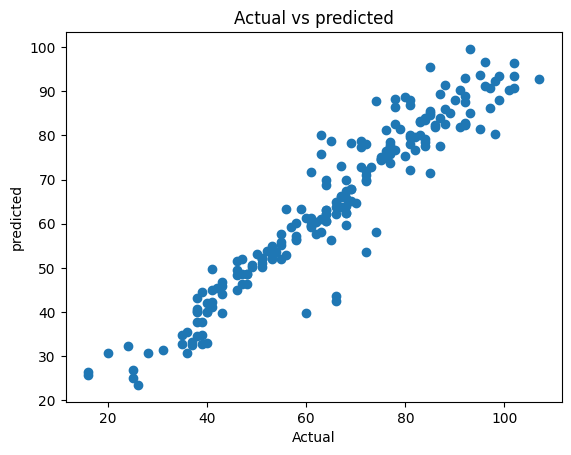

In [70]:
import numpy as np
from sklearn.metrics import r2_score
r2_score=r2_score(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('r2_score:', r2_score)

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
mae= mean_absolute_error(Y_test6, np.squeeze(model10.predict(X_test6)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

import matplotlib.pyplot as plt
plt.scatter(Y_test6, np.squeeze(model10.predict(X_test6)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [71]:
prediction11 =np.squeeze(model10.predict([[80,2,2,129,prediction10]]))
print("Prediction: {}".format(prediction11))

y_prd=np.squeeze(np.squeeze(model10.predict(X_test6)) )
predic_dif=pd.DataFrame({'Actual':Y_test6,'predict':y_prd,"differences":Y_test6-y_prd})
predic_dif[0:15]

1/1 [==============================] - 0s 490ms/step
Prediction: 59.134159088134766
7/7 [==============================] - 0s 11ms/step


,Actual,predict,differences
1840,81,88.074028,-7.074028
1632,84,78.483192,5.516808
1861,87,77.587341,9.412659
1947,107,92.772453,14.227547
1765,84,77.636940,6.363060
33,53,52.411602,0.588398
107,40,32.939220,7.060780
1257,69,67.868271,1.131729
1068,56,63.275349,-7.275349
1712,89,85.143509,3.856491
